# Create a web service that uses machine learning to make predictions based on a data set 'powerproduction'
### From the 'powerproduction' data set, produce a model that accurately predicts wind turbine power output from wind speed values. Then, develop a web service that will respond with predicted power values based on speed values sent as HTTP requests

In [1]:
# Imports
# Neural networks.
import tensorflow as tf

import tensorflow.keras as kr

# Numerical arrays
import numpy as np

# Data frames.
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

# Plot style.
plt.style.use("ggplot")

# Plot size.
plt.rcParams['figure.figsize'] = [14, 8]

In [2]:
# Load the powerproduction data
np.set_printoptions(precision=2, suppress=True)

data = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")
data

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


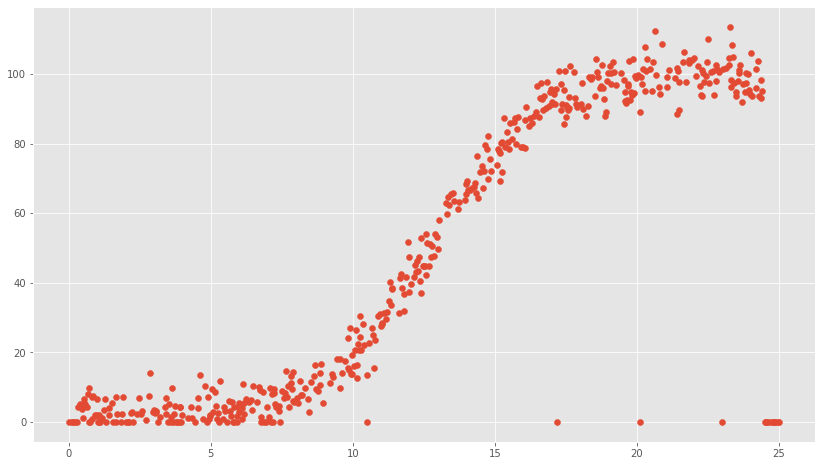

In [3]:
# remove last 10 variables containing 0 (outliers)

plt.scatter(data.speed, data.power)

In [4]:
# Train a different model
model = kr.models.Sequential()
model.add(tf.keras.layers.Dense(64, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mse')

model.add(kr.layers.Dense(50, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile(kr.optimizers.Adam(lr=0.001), loss='mean_squared_error')

In [5]:
# Train the model via running multiple times
model.fit(data['speed'], data['power'], epochs=28500, batch_size=500)

Epoch 1/30000
1/1 [==============================] - 0s 356ms/step - loss: 4134.1836
Epoch 2/30000
1/1 [==============================] - 0s 2ms/step - loss: 4125.4946
Epoch 3/30000
1/1 [==============================] - 0s 2ms/step - loss: 4116.8262
Epoch 4/30000
1/1 [==============================] - 0s 3ms/step - loss: 4108.1787
Epoch 5/30000
1/1 [==============================] - 0s 4ms/step - loss: 4099.5532
Epoch 6/30000
1/1 [==============================] - 0s 2ms/step - loss: 4090.9504
Epoch 7/30000
1/1 [==============================] - 0s 2ms/step - loss: 4082.3716
Epoch 8/30000
1/1 [==============================] - 0s 3ms/step - loss: 4073.8171
Epoch 9/30000
1/1 [==============================] - 0s 3ms/step - loss: 4065.2876
Epoch 10/30000
1/1 [==============================] - 0s 2ms/step - loss: 4056.7839
Epoch 11/30000
1/1 [==============================] - 0s 2ms/step - loss: 4048.3086
Epoch 12/30000
1/1 [==============================] - 0s 2ms/step - loss: 4039.8616

1/1 [==============================] - 0s 1ms/step - loss: 3510.7163
Epoch 99/30000
1/1 [==============================] - 0s 1ms/step - loss: 3507.0955
Epoch 100/30000
1/1 [==============================] - 0s 2ms/step - loss: 3503.5093
Epoch 101/30000
1/1 [==============================] - 0s 2ms/step - loss: 3499.9556
Epoch 102/30000
1/1 [==============================] - 0s 2ms/step - loss: 3496.4346
Epoch 103/30000
1/1 [==============================] - 0s 5ms/step - loss: 3492.9441
Epoch 104/30000
1/1 [==============================] - 0s 2ms/step - loss: 3489.4832
Epoch 105/30000
1/1 [==============================] - 0s 2ms/step - loss: 3486.0513
Epoch 106/30000
1/1 [==============================] - 0s 2ms/step - loss: 3482.6467
Epoch 107/30000
1/1 [==============================] - 0s 3ms/step - loss: 3479.2686
Epoch 108/30000
1/1 [==============================] - 0s 3ms/step - loss: 3475.9163
Epoch 109/30000
1/1 [==============================] - 0s 2ms/step - loss: 3472.58

1/1 [==============================] - 0s 2ms/step - loss: 3221.0088
Epoch 195/30000
1/1 [==============================] - 0s 2ms/step - loss: 3218.2849
Epoch 196/30000
1/1 [==============================] - 0s 2ms/step - loss: 3215.5710
Epoch 197/30000
1/1 [==============================] - 0s 2ms/step - loss: 3212.8655
Epoch 198/30000
1/1 [==============================] - 0s 3ms/step - loss: 3210.1682
Epoch 199/30000
1/1 [==============================] - 0s 1ms/step - loss: 3207.4790
Epoch 200/30000
1/1 [==============================] - 0s 2ms/step - loss: 3204.7971
Epoch 201/30000
1/1 [==============================] - 0s 4ms/step - loss: 3202.1221
Epoch 202/30000
1/1 [==============================] - 0s 2ms/step - loss: 3199.4534
Epoch 203/30000
1/1 [==============================] - 0s 3ms/step - loss: 3196.7903
Epoch 204/30000
1/1 [==============================] - 0s 4ms/step - loss: 3194.1323
Epoch 205/30000
1/1 [==============================] - 0s 2ms/step - loss: 3191.4

1/1 [==============================] - 0s 2ms/step - loss: 2980.2961
Epoch 291/30000
1/1 [==============================] - 0s 3ms/step - loss: 2977.9565
Epoch 292/30000
1/1 [==============================] - 0s 2ms/step - loss: 2975.6145
Epoch 293/30000
1/1 [==============================] - 0s 2ms/step - loss: 2973.2700
Epoch 294/30000
1/1 [==============================] - 0s 2ms/step - loss: 2970.9236
Epoch 295/30000
1/1 [==============================] - 0s 2ms/step - loss: 2968.5750
Epoch 296/30000
1/1 [==============================] - 0s 2ms/step - loss: 2966.2256
Epoch 297/30000
1/1 [==============================] - 0s 3ms/step - loss: 2963.8745
Epoch 298/30000
1/1 [==============================] - 0s 4ms/step - loss: 2961.5227
Epoch 299/30000
1/1 [==============================] - 0s 4ms/step - loss: 2959.1714
Epoch 300/30000
1/1 [==============================] - 0s 2ms/step - loss: 2956.8210
Epoch 301/30000
1/1 [==============================] - 0s 2ms/step - loss: 2954.4

1/1 [==============================] - 0s 2ms/step - loss: 2771.3738
Epoch 387/30000
1/1 [==============================] - 0s 2ms/step - loss: 2769.4033
Epoch 388/30000
1/1 [==============================] - 0s 2ms/step - loss: 2767.4365
Epoch 389/30000
1/1 [==============================] - 0s 3ms/step - loss: 2765.4736
Epoch 390/30000
1/1 [==============================] - 0s 2ms/step - loss: 2763.5144
Epoch 391/30000
1/1 [==============================] - 0s 2ms/step - loss: 2761.5588
Epoch 392/30000
1/1 [==============================] - 0s 2ms/step - loss: 2759.6067
Epoch 393/30000
1/1 [==============================] - 0s 3ms/step - loss: 2757.6584
Epoch 394/30000
1/1 [==============================] - 0s 2ms/step - loss: 2755.7134
Epoch 395/30000
1/1 [==============================] - 0s 2ms/step - loss: 2753.7722
Epoch 396/30000
1/1 [==============================] - 0s 3ms/step - loss: 2751.8345
Epoch 397/30000
1/1 [==============================] - 0s 3ms/step - loss: 2749.9

1/1 [==============================] - 0s 999us/step - loss: 2597.2886
Epoch 483/30000
1/1 [==============================] - 0s 2ms/step - loss: 2595.6208
Epoch 484/30000
1/1 [==============================] - 0s 3ms/step - loss: 2593.9556
Epoch 485/30000
1/1 [==============================] - 0s 2ms/step - loss: 2592.2935
Epoch 486/30000
1/1 [==============================] - 0s 2ms/step - loss: 2590.6340
Epoch 487/30000
1/1 [==============================] - 0s 3ms/step - loss: 2588.9768
Epoch 488/30000
1/1 [==============================] - 0s 3ms/step - loss: 2587.3228
Epoch 489/30000
1/1 [==============================] - 0s 2ms/step - loss: 2585.6714
Epoch 490/30000
1/1 [==============================] - 0s 2ms/step - loss: 2584.0227
Epoch 491/30000
1/1 [==============================] - 0s 3ms/step - loss: 2582.3770
Epoch 492/30000
1/1 [==============================] - 0s 2ms/step - loss: 2580.7336
Epoch 493/30000
1/1 [==============================] - 0s 2ms/step - loss: 2579

1/1 [==============================] - 0s 2ms/step - loss: 2448.9788
Epoch 579/30000
1/1 [==============================] - 0s 2ms/step - loss: 2447.5520
Epoch 580/30000
1/1 [==============================] - 0s 2ms/step - loss: 2446.1277
Epoch 581/30000
1/1 [==============================] - 0s 2ms/step - loss: 2444.7053
Epoch 582/30000
1/1 [==============================] - 0s 3ms/step - loss: 2443.2854
Epoch 583/30000
1/1 [==============================] - 0s 3ms/step - loss: 2441.8677
Epoch 584/30000
1/1 [==============================] - 0s 4ms/step - loss: 2440.4524
Epoch 585/30000
1/1 [==============================] - 0s 2ms/step - loss: 2439.0396
Epoch 586/30000
1/1 [==============================] - 0s 3ms/step - loss: 2437.6287
Epoch 587/30000
1/1 [==============================] - 0s 3ms/step - loss: 2436.2202
Epoch 588/30000
1/1 [==============================] - 0s 2ms/step - loss: 2434.8137
Epoch 589/30000
1/1 [==============================] - 0s 3ms/step - loss: 2433.4

1/1 [==============================] - 0s 2ms/step - loss: 2321.9429
Epoch 675/30000
1/1 [==============================] - 0s 2ms/step - loss: 2320.7197
Epoch 676/30000
1/1 [==============================] - 0s 3ms/step - loss: 2319.4985
Epoch 677/30000
1/1 [==============================] - 0s 3ms/step - loss: 2318.2791
Epoch 678/30000
1/1 [==============================] - 0s 2ms/step - loss: 2317.0615
Epoch 679/30000
1/1 [==============================] - 0s 3ms/step - loss: 2315.8459
Epoch 680/30000
1/1 [==============================] - 0s 2ms/step - loss: 2314.6323
Epoch 681/30000
1/1 [==============================] - 0s 2ms/step - loss: 2313.4204
Epoch 682/30000
1/1 [==============================] - 0s 3ms/step - loss: 2312.2107
Epoch 683/30000
1/1 [==============================] - 0s 2ms/step - loss: 2311.0029
Epoch 684/30000
1/1 [==============================] - 0s 2ms/step - loss: 2309.7966
Epoch 685/30000
1/1 [==============================] - 0s 3ms/step - loss: 2308.5

1/1 [==============================] - 0s 2ms/step - loss: 2212.6826
Epoch 771/30000
1/1 [==============================] - 0s 1ms/step - loss: 2211.6226
Epoch 772/30000
1/1 [==============================] - 0s 3ms/step - loss: 2210.5632
Epoch 773/30000
1/1 [==============================] - 0s 2ms/step - loss: 2209.5056
Epoch 774/30000
1/1 [==============================] - 0s 3ms/step - loss: 2208.4492
Epoch 775/30000
1/1 [==============================] - 0s 3ms/step - loss: 2207.3938
Epoch 776/30000
1/1 [==============================] - 0s 1ms/step - loss: 2206.3401
Epoch 777/30000
1/1 [==============================] - 0s 2ms/step - loss: 2205.2878
Epoch 778/30000
1/1 [==============================] - 0s 3ms/step - loss: 2204.2361
Epoch 779/30000
1/1 [==============================] - 0s 2ms/step - loss: 2203.1863
Epoch 780/30000
1/1 [==============================] - 0s 2ms/step - loss: 2202.1375
Epoch 781/30000
1/1 [==============================] - 0s 4ms/step - loss: 2201.0

1/1 [==============================] - 0s 2ms/step - loss: 2113.4958
Epoch 867/30000
1/1 [==============================] - 0s 2ms/step - loss: 2112.4172
Epoch 868/30000
1/1 [==============================] - 0s 2ms/step - loss: 2111.3352
Epoch 869/30000
1/1 [==============================] - 0s 1ms/step - loss: 2110.2493
Epoch 870/30000
1/1 [==============================] - 0s 2ms/step - loss: 2109.1594
Epoch 871/30000
1/1 [==============================] - 0s 3ms/step - loss: 2108.0654
Epoch 872/30000
1/1 [==============================] - 0s 2ms/step - loss: 2106.9673
Epoch 873/30000
1/1 [==============================] - 0s 3ms/step - loss: 2105.8645
Epoch 874/30000
1/1 [==============================] - 0s 2ms/step - loss: 2104.7573
Epoch 875/30000
1/1 [==============================] - 0s 4ms/step - loss: 2103.6453
Epoch 876/30000
1/1 [==============================] - 0s 1ms/step - loss: 2102.5283
Epoch 877/30000
1/1 [==============================] - 0s 3ms/step - loss: 2101.4

1/1 [==============================] - 0s 2ms/step - loss: 1946.2645
Epoch 963/30000
1/1 [==============================] - 0s 3ms/step - loss: 1943.6288
Epoch 964/30000
1/1 [==============================] - 0s 3ms/step - loss: 1940.9839
Epoch 965/30000
1/1 [==============================] - 0s 2ms/step - loss: 1938.3306
Epoch 966/30000
1/1 [==============================] - 0s 2ms/step - loss: 1935.6702
Epoch 967/30000
1/1 [==============================] - 0s 1ms/step - loss: 1933.0037
Epoch 968/30000
1/1 [==============================] - 0s 2ms/step - loss: 1930.3318
Epoch 969/30000
1/1 [==============================] - 0s 2ms/step - loss: 1927.6561
Epoch 970/30000
1/1 [==============================] - 0s 2ms/step - loss: 1924.9775
Epoch 971/30000
1/1 [==============================] - 0s 4ms/step - loss: 1922.2971
Epoch 972/30000
1/1 [==============================] - 0s 2ms/step - loss: 1919.6157
Epoch 973/30000
1/1 [==============================] - 0s 2ms/step - loss: 1916.9

1/1 [==============================] - 0s 2ms/step - loss: 1716.8876
Epoch 1058/30000
1/1 [==============================] - 0s 2ms/step - loss: 1714.8300
Epoch 1059/30000
1/1 [==============================] - 0s 3ms/step - loss: 1712.7802
Epoch 1060/30000
1/1 [==============================] - 0s 2ms/step - loss: 1710.7380
Epoch 1061/30000
1/1 [==============================] - 0s 3ms/step - loss: 1708.7035
Epoch 1062/30000
1/1 [==============================] - 0s 2ms/step - loss: 1706.6764
Epoch 1063/30000
1/1 [==============================] - 0s 1ms/step - loss: 1704.6567
Epoch 1064/30000
1/1 [==============================] - 0s 3ms/step - loss: 1702.6445
Epoch 1065/30000
1/1 [==============================] - 0s 3ms/step - loss: 1700.6394
Epoch 1066/30000
1/1 [==============================] - 0s 3ms/step - loss: 1698.6414
Epoch 1067/30000
1/1 [==============================] - 0s 3ms/step - loss: 1696.6509
Epoch 1068/30000
1/1 [==============================] - 0s 1ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 1546.3008
Epoch 1153/30000
1/1 [==============================] - 0s 4ms/step - loss: 1544.7039
Epoch 1154/30000
1/1 [==============================] - 0s 2ms/step - loss: 1543.1101
Epoch 1155/30000
1/1 [==============================] - 0s 2ms/step - loss: 1541.5193
Epoch 1156/30000
1/1 [==============================] - 0s 2ms/step - loss: 1539.9320
Epoch 1157/30000
1/1 [==============================] - 0s 2ms/step - loss: 1538.3475
Epoch 1158/30000
1/1 [==============================] - 0s 2ms/step - loss: 1536.7661
Epoch 1159/30000
1/1 [==============================] - 0s 2ms/step - loss: 1535.1879
Epoch 1160/30000
1/1 [==============================] - 0s 2ms/step - loss: 1533.6124
Epoch 1161/30000
1/1 [==============================] - 0s 2ms/step - loss: 1532.0400
Epoch 1162/30000
1/1 [==============================] - 0s 3ms/step - loss: 1530.4705
Epoch 1163/30000
1/1 [==============================] - 0s 5ms/step - l

1/1 [==============================] - 0s 1ms/step - loss: 1405.8645
Epoch 1248/30000
1/1 [==============================] - 0s 3ms/step - loss: 1404.4875
Epoch 1249/30000
1/1 [==============================] - 0s 3ms/step - loss: 1403.1118
Epoch 1250/30000
1/1 [==============================] - 0s 4ms/step - loss: 1401.7385
Epoch 1251/30000
1/1 [==============================] - 0s 2ms/step - loss: 1400.3668
Epoch 1252/30000
1/1 [==============================] - 0s 3ms/step - loss: 1398.9967
Epoch 1253/30000
1/1 [==============================] - 0s 1ms/step - loss: 1397.6287
Epoch 1254/30000
1/1 [==============================] - 0s 2ms/step - loss: 1396.2622
Epoch 1255/30000
1/1 [==============================] - 0s 2ms/step - loss: 1394.8977
Epoch 1256/30000
1/1 [==============================] - 0s 2ms/step - loss: 1393.5350
Epoch 1257/30000
1/1 [==============================] - 0s 3ms/step - loss: 1392.1740
Epoch 1258/30000
1/1 [==============================] - 0s 3ms/step - l

1/1 [==============================] - 0s 4ms/step - loss: 1282.4474
Epoch 1343/30000
1/1 [==============================] - 0s 2ms/step - loss: 1281.2214
Epoch 1344/30000
1/1 [==============================] - 0s 2ms/step - loss: 1279.9966
Epoch 1345/30000
1/1 [==============================] - 0s 1ms/step - loss: 1278.7731
Epoch 1346/30000
1/1 [==============================] - 0s 1ms/step - loss: 1277.5513
Epoch 1347/30000
1/1 [==============================] - 0s 2ms/step - loss: 1276.3306
Epoch 1348/30000
1/1 [==============================] - 0s 1ms/step - loss: 1275.1113
Epoch 1349/30000
1/1 [==============================] - 0s 1ms/step - loss: 1273.8934
Epoch 1350/30000
1/1 [==============================] - 0s 2ms/step - loss: 1272.6769
Epoch 1351/30000
1/1 [==============================] - 0s 2ms/step - loss: 1271.4617
Epoch 1352/30000
1/1 [==============================] - 0s 5ms/step - loss: 1270.2480
Epoch 1353/30000
1/1 [==============================] - 0s 3ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 1164.4642
Epoch 1438/30000
1/1 [==============================] - 0s 2ms/step - loss: 1163.1855
Epoch 1439/30000
1/1 [==============================] - 0s 3ms/step - loss: 1161.9099
Epoch 1440/30000
1/1 [==============================] - 0s 2ms/step - loss: 1160.6382
Epoch 1441/30000
1/1 [==============================] - 0s 3ms/step - loss: 1159.3694
Epoch 1442/30000
1/1 [==============================] - 0s 2ms/step - loss: 1158.1039
Epoch 1443/30000
1/1 [==============================] - 0s 2ms/step - loss: 1156.8418
Epoch 1444/30000
1/1 [==============================] - 0s 3ms/step - loss: 1155.5831
Epoch 1445/30000
1/1 [==============================] - 0s 3ms/step - loss: 1154.3273
Epoch 1446/30000
1/1 [==============================] - 0s 2ms/step - loss: 1153.0747
Epoch 1447/30000
1/1 [==============================] - 0s 3ms/step - loss: 1151.8254
Epoch 1448/30000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 1054.2864
Epoch 1533/30000
1/1 [==============================] - 0s 2ms/step - loss: 1053.2197
Epoch 1534/30000
1/1 [==============================] - 0s 2ms/step - loss: 1052.1547
Epoch 1535/30000
1/1 [==============================] - 0s 2ms/step - loss: 1051.0911
Epoch 1536/30000
1/1 [==============================] - 0s 3ms/step - loss: 1050.0294
Epoch 1537/30000
1/1 [==============================] - 0s 2ms/step - loss: 1048.9689
Epoch 1538/30000
1/1 [==============================] - 0s 2ms/step - loss: 1047.9100
Epoch 1539/30000
1/1 [==============================] - 0s 1ms/step - loss: 1046.8529
Epoch 1540/30000
1/1 [==============================] - 0s 2ms/step - loss: 1045.7970
Epoch 1541/30000
1/1 [==============================] - 0s 2ms/step - loss: 1044.7429
Epoch 1542/30000
1/1 [==============================] - 0s 2ms/step - loss: 1043.6902
Epoch 1543/30000
1/1 [==============================] - 0s 3ms/step - l

Epoch 1628/30000
1/1 [==============================] - 0s 2ms/step - loss: 958.3896
Epoch 1629/30000
1/1 [==============================] - 0s 2ms/step - loss: 957.4538
Epoch 1630/30000
1/1 [==============================] - 0s 2ms/step - loss: 956.5192
Epoch 1631/30000
1/1 [==============================] - 0s 3ms/step - loss: 955.5859
Epoch 1632/30000
1/1 [==============================] - 0s 2ms/step - loss: 954.6537
Epoch 1633/30000
1/1 [==============================] - 0s 2ms/step - loss: 953.7227
Epoch 1634/30000
1/1 [==============================] - 0s 2ms/step - loss: 952.7929
Epoch 1635/30000
1/1 [==============================] - 0s 3ms/step - loss: 951.8644
Epoch 1636/30000
1/1 [==============================] - 0s 1ms/step - loss: 950.9369
Epoch 1637/30000
1/1 [==============================] - 0s 2ms/step - loss: 950.0107
Epoch 1638/30000
1/1 [==============================] - 0s 2ms/step - loss: 949.0856
Epoch 1639/30000
1/1 [==============================] - 0s 3ms/st

1/1 [==============================] - 0s 2ms/step - loss: 873.7228
Epoch 1725/30000
1/1 [==============================] - 0s 2ms/step - loss: 872.8928
Epoch 1726/30000
1/1 [==============================] - 0s 2ms/step - loss: 872.0640
Epoch 1727/30000
1/1 [==============================] - 0s 3ms/step - loss: 871.2359
Epoch 1728/30000
1/1 [==============================] - 0s 2ms/step - loss: 870.4089
Epoch 1729/30000
1/1 [==============================] - 0s 2ms/step - loss: 869.5830
Epoch 1730/30000
1/1 [==============================] - 0s 2ms/step - loss: 868.7581
Epoch 1731/30000
1/1 [==============================] - 0s 3ms/step - loss: 867.9341
Epoch 1732/30000
1/1 [==============================] - 0s 2ms/step - loss: 867.1111
Epoch 1733/30000
1/1 [==============================] - 0s 2ms/step - loss: 866.2894
Epoch 1734/30000
1/1 [==============================] - 0s 2ms/step - loss: 865.4684
Epoch 1735/30000
1/1 [==============================] - 0s 2ms/step - loss: 864.64

1/1 [==============================] - 0s 3ms/step - loss: 798.4645
Epoch 1821/30000
1/1 [==============================] - 0s 3ms/step - loss: 797.7255
Epoch 1822/30000
1/1 [==============================] - 0s 3ms/step - loss: 796.9872
Epoch 1823/30000
1/1 [==============================] - 0s 6ms/step - loss: 796.2501
Epoch 1824/30000
1/1 [==============================] - 0s 3ms/step - loss: 795.5139
Epoch 1825/30000
1/1 [==============================] - 0s 5ms/step - loss: 794.7783
Epoch 1826/30000
1/1 [==============================] - 0s 2ms/step - loss: 794.0437
Epoch 1827/30000
1/1 [==============================] - 0s 6ms/step - loss: 793.3101
Epoch 1828/30000
1/1 [==============================] - 0s 4ms/step - loss: 792.5771
Epoch 1829/30000
1/1 [==============================] - 0s 5ms/step - loss: 791.8452
Epoch 1830/30000
1/1 [==============================] - 0s 2ms/step - loss: 791.1141
Epoch 1831/30000
1/1 [==============================] - 0s 1ms/step - loss: 790.38

1/1 [==============================] - 0s 2ms/step - loss: 731.3992
Epoch 1917/30000
1/1 [==============================] - 0s 2ms/step - loss: 730.7402
Epoch 1918/30000
1/1 [==============================] - 0s 2ms/step - loss: 730.0820
Epoch 1919/30000
1/1 [==============================] - 0s 1ms/step - loss: 729.4246
Epoch 1920/30000
1/1 [==============================] - 0s 1ms/step - loss: 728.7679
Epoch 1921/30000
1/1 [==============================] - 0s 1ms/step - loss: 728.1121
Epoch 1922/30000
1/1 [==============================] - 0s 6ms/step - loss: 727.4570
Epoch 1923/30000
1/1 [==============================] - 0s 3ms/step - loss: 726.8027
Epoch 1924/30000
1/1 [==============================] - 0s 1ms/step - loss: 726.1491
Epoch 1925/30000
1/1 [==============================] - 0s 2ms/step - loss: 725.4965
Epoch 1926/30000
1/1 [==============================] - 0s 2ms/step - loss: 724.8444
Epoch 1927/30000
1/1 [==============================] - 0s 3ms/step - loss: 724.19

Epoch 2012/30000
1/1 [==============================] - 0s 5ms/step - loss: 671.5763
Epoch 2013/30000
1/1 [==============================] - 0s 4ms/step - loss: 670.9885
Epoch 2014/30000
1/1 [==============================] - 0s 2ms/step - loss: 670.4011
Epoch 2015/30000
1/1 [==============================] - 0s 2ms/step - loss: 669.8146
Epoch 2016/30000
1/1 [==============================] - 0s 2ms/step - loss: 669.2287
Epoch 2017/30000
1/1 [==============================] - 0s 2ms/step - loss: 668.6436
Epoch 2018/30000
1/1 [==============================] - 0s 2ms/step - loss: 668.0591
Epoch 2019/30000
1/1 [==============================] - 0s 2ms/step - loss: 667.4754
Epoch 2020/30000
1/1 [==============================] - 0s 3ms/step - loss: 666.8923
Epoch 2021/30000
1/1 [==============================] - 0s 4ms/step - loss: 666.3098
Epoch 2022/30000
1/1 [==============================] - 0s 4ms/step - loss: 665.7281
Epoch 2023/30000
1/1 [==============================] - 0s 2ms/st

1/1 [==============================] - 0s 5ms/step - loss: 618.1987
Epoch 2109/30000
1/1 [==============================] - 0s 3ms/step - loss: 617.6741
Epoch 2110/30000
1/1 [==============================] - 0s 3ms/step - loss: 617.1501
Epoch 2111/30000
1/1 [==============================] - 0s 5ms/step - loss: 616.6266
Epoch 2112/30000
1/1 [==============================] - 0s 4ms/step - loss: 616.1039
Epoch 2113/30000
1/1 [==============================] - 0s 4ms/step - loss: 615.5818
Epoch 2114/30000
1/1 [==============================] - 0s 3ms/step - loss: 615.0604
Epoch 2115/30000
1/1 [==============================] - 0s 3ms/step - loss: 614.5394
Epoch 2116/30000
1/1 [==============================] - 0s 3ms/step - loss: 614.0192
Epoch 2117/30000
1/1 [==============================] - 0s 2ms/step - loss: 613.4995
Epoch 2118/30000
1/1 [==============================] - 0s 4ms/step - loss: 612.9805
Epoch 2119/30000
1/1 [==============================] - 0s 3ms/step - loss: 612.46

1/1 [==============================] - 0s 3ms/step - loss: 570.5668
Epoch 2205/30000
1/1 [==============================] - 0s 2ms/step - loss: 570.0983
Epoch 2206/30000
1/1 [==============================] - 0s 4ms/step - loss: 569.6304
Epoch 2207/30000
1/1 [==============================] - 0s 4ms/step - loss: 569.1633
Epoch 2208/30000
1/1 [==============================] - 0s 4ms/step - loss: 568.6964
Epoch 2209/30000
1/1 [==============================] - 0s 2ms/step - loss: 568.2302
Epoch 2210/30000
1/1 [==============================] - 0s 4ms/step - loss: 567.7645
Epoch 2211/30000
1/1 [==============================] - 0s 2ms/step - loss: 567.2994
Epoch 2212/30000
1/1 [==============================] - 0s 3ms/step - loss: 566.8348
Epoch 2213/30000
1/1 [==============================] - 0s 3ms/step - loss: 566.3707
Epoch 2214/30000
1/1 [==============================] - 0s 3ms/step - loss: 565.9071
Epoch 2215/30000
1/1 [==============================] - 0s 4ms/step - loss: 565.44

1/1 [==============================] - 0s 4ms/step - loss: 527.8696
Epoch 2301/30000
1/1 [==============================] - 0s 2ms/step - loss: 527.4489
Epoch 2302/30000
1/1 [==============================] - 0s 3ms/step - loss: 527.0287
Epoch 2303/30000
1/1 [==============================] - 0s 3ms/step - loss: 526.6093
Epoch 2304/30000
1/1 [==============================] - 0s 2ms/step - loss: 526.1902
Epoch 2305/30000
1/1 [==============================] - 0s 4ms/step - loss: 525.7718
Epoch 2306/30000
1/1 [==============================] - 0s 2ms/step - loss: 525.3539
Epoch 2307/30000
1/1 [==============================] - 0s 5ms/step - loss: 524.9368
Epoch 2308/30000
1/1 [==============================] - 0s 5ms/step - loss: 524.5201
Epoch 2309/30000
1/1 [==============================] - 0s 3ms/step - loss: 524.1041
Epoch 2310/30000
1/1 [==============================] - 0s 2ms/step - loss: 523.6887
Epoch 2311/30000
1/1 [==============================] - 0s 2ms/step - loss: 523.27

1/1 [==============================] - 0s 2ms/step - loss: 489.9073
Epoch 2397/30000
1/1 [==============================] - 0s 5ms/step - loss: 489.5356
Epoch 2398/30000
1/1 [==============================] - 0s 3ms/step - loss: 489.1644
Epoch 2399/30000
1/1 [==============================] - 0s 4ms/step - loss: 488.7937
Epoch 2400/30000
1/1 [==============================] - 0s 2ms/step - loss: 488.4233
Epoch 2401/30000
1/1 [==============================] - 0s 3ms/step - loss: 488.0536
Epoch 2402/30000
1/1 [==============================] - 0s 2ms/step - loss: 487.6843
Epoch 2403/30000
1/1 [==============================] - 0s 4ms/step - loss: 487.3153
Epoch 2404/30000
1/1 [==============================] - 0s 3ms/step - loss: 486.9469
Epoch 2405/30000
1/1 [==============================] - 0s 5ms/step - loss: 486.5791
Epoch 2406/30000
1/1 [==============================] - 0s 4ms/step - loss: 486.2115
Epoch 2407/30000
1/1 [==============================] - 0s 2ms/step - loss: 485.84

1/1 [==============================] - 0s 2ms/step - loss: 456.2787
Epoch 2493/30000
1/1 [==============================] - 0s 4ms/step - loss: 455.9492
Epoch 2494/30000
1/1 [==============================] - 0s 2ms/step - loss: 455.6201
Epoch 2495/30000
1/1 [==============================] - 0s 4ms/step - loss: 455.2913
Epoch 2496/30000
1/1 [==============================] - 0s 2ms/step - loss: 454.9631
Epoch 2497/30000
1/1 [==============================] - 0s 2ms/step - loss: 454.6351
Epoch 2498/30000
1/1 [==============================] - 0s 4ms/step - loss: 454.3076
Epoch 2499/30000
1/1 [==============================] - 0s 5ms/step - loss: 453.9804
Epoch 2500/30000
1/1 [==============================] - 0s 2ms/step - loss: 453.6536
Epoch 2501/30000
1/1 [==============================] - 0s 3ms/step - loss: 453.3272
Epoch 2502/30000
1/1 [==============================] - 0s 2ms/step - loss: 453.0011
Epoch 2503/30000
1/1 [==============================] - 0s 1ms/step - loss: 452.67

1/1 [==============================] - 0s 3ms/step - loss: 423.0945
Epoch 2589/30000
1/1 [==============================] - 0s 2ms/step - loss: 422.7416
Epoch 2590/30000
1/1 [==============================] - 0s 3ms/step - loss: 422.3899
Epoch 2591/30000
1/1 [==============================] - 0s 3ms/step - loss: 422.0393
Epoch 2592/30000
1/1 [==============================] - 0s 4ms/step - loss: 421.6897
Epoch 2593/30000
1/1 [==============================] - 0s 3ms/step - loss: 421.3412
Epoch 2594/30000
1/1 [==============================] - 0s 2ms/step - loss: 420.9938
Epoch 2595/30000
1/1 [==============================] - 0s 2ms/step - loss: 420.6473
Epoch 2596/30000
1/1 [==============================] - 0s 2ms/step - loss: 420.3020
Epoch 2597/30000
1/1 [==============================] - 0s 3ms/step - loss: 419.9578
Epoch 2598/30000
1/1 [==============================] - 0s 2ms/step - loss: 419.6144
Epoch 2599/30000
1/1 [==============================] - 0s 1ms/step - loss: 419.27

1/1 [==============================] - 0s 3ms/step - loss: 393.1596
Epoch 2685/30000
1/1 [==============================] - 0s 4ms/step - loss: 392.8813
Epoch 2686/30000
1/1 [==============================] - 0s 2ms/step - loss: 392.6035
Epoch 2687/30000
1/1 [==============================] - 0s 3ms/step - loss: 392.3264
Epoch 2688/30000
1/1 [==============================] - 0s 2ms/step - loss: 392.0498
Epoch 2689/30000
1/1 [==============================] - 0s 4ms/step - loss: 391.7737
Epoch 2690/30000
1/1 [==============================] - 0s 2ms/step - loss: 391.4982
Epoch 2691/30000
1/1 [==============================] - 0s 2ms/step - loss: 391.2234
Epoch 2692/30000
1/1 [==============================] - 0s 4ms/step - loss: 390.9489
Epoch 2693/30000
1/1 [==============================] - 0s 3ms/step - loss: 390.6751
Epoch 2694/30000
1/1 [==============================] - 0s 4ms/step - loss: 390.4019
Epoch 2695/30000
1/1 [==============================] - 0s 2ms/step - loss: 390.12

1/1 [==============================] - 0s 5ms/step - loss: 368.7854
Epoch 2781/30000
1/1 [==============================] - 0s 5ms/step - loss: 368.5541
Epoch 2782/30000
1/1 [==============================] - 0s 2ms/step - loss: 368.3232
Epoch 2783/30000
1/1 [==============================] - 0s 4ms/step - loss: 368.0927
Epoch 2784/30000
1/1 [==============================] - 0s 2ms/step - loss: 367.8627
Epoch 2785/30000
1/1 [==============================] - 0s 3ms/step - loss: 367.6331
Epoch 2786/30000
1/1 [==============================] - 0s 2ms/step - loss: 367.4039
Epoch 2787/30000
1/1 [==============================] - 0s 3ms/step - loss: 367.1751
Epoch 2788/30000
1/1 [==============================] - 0s 3ms/step - loss: 366.9467
Epoch 2789/30000
1/1 [==============================] - 0s 4ms/step - loss: 366.7188
Epoch 2790/30000
1/1 [==============================] - 0s 3ms/step - loss: 366.4912
Epoch 2791/30000
1/1 [==============================] - 0s 3ms/step - loss: 366.26

1/1 [==============================] - 0s 2ms/step - loss: 348.3860
Epoch 2877/30000
1/1 [==============================] - 0s 4ms/step - loss: 348.1914
Epoch 2878/30000
1/1 [==============================] - 0s 2ms/step - loss: 347.9972
Epoch 2879/30000
1/1 [==============================] - 0s 3ms/step - loss: 347.8033
Epoch 2880/30000
1/1 [==============================] - 0s 1ms/step - loss: 347.6098
Epoch 2881/30000
1/1 [==============================] - 0s 1ms/step - loss: 347.4167
Epoch 2882/30000
1/1 [==============================] - 0s 3ms/step - loss: 347.2237
Epoch 2883/30000
1/1 [==============================] - 0s 3ms/step - loss: 347.0313
Epoch 2884/30000
1/1 [==============================] - 0s 2ms/step - loss: 346.8391
Epoch 2885/30000
1/1 [==============================] - 0s 3ms/step - loss: 346.6472
Epoch 2886/30000
1/1 [==============================] - 0s 3ms/step - loss: 346.4558
Epoch 2887/30000
1/1 [==============================] - 0s 2ms/step - loss: 346.26

1/1 [==============================] - 0s 2ms/step - loss: 331.1927
Epoch 2973/30000
1/1 [==============================] - 0s 2ms/step - loss: 331.0284
Epoch 2974/30000
1/1 [==============================] - 0s 3ms/step - loss: 330.8645
Epoch 2975/30000
1/1 [==============================] - 0s 3ms/step - loss: 330.7008
Epoch 2976/30000
1/1 [==============================] - 0s 4ms/step - loss: 330.5374
Epoch 2977/30000
1/1 [==============================] - 0s 2ms/step - loss: 330.3743
Epoch 2978/30000
1/1 [==============================] - 0s 2ms/step - loss: 330.2115
Epoch 2979/30000
1/1 [==============================] - 0s 2ms/step - loss: 330.0490
Epoch 2980/30000
1/1 [==============================] - 0s 3ms/step - loss: 329.8867
Epoch 2981/30000
1/1 [==============================] - 0s 2ms/step - loss: 329.7248
Epoch 2982/30000
1/1 [==============================] - 0s 1ms/step - loss: 329.5632
Epoch 2983/30000
1/1 [==============================] - 0s 3ms/step - loss: 329.40

1/1 [==============================] - 0s 2ms/step - loss: 316.6691
Epoch 3069/30000
1/1 [==============================] - 0s 2ms/step - loss: 316.5304
Epoch 3070/30000
1/1 [==============================] - 0s 1ms/step - loss: 316.3919
Epoch 3071/30000
1/1 [==============================] - 0s 2ms/step - loss: 316.2536
Epoch 3072/30000
1/1 [==============================] - 0s 3ms/step - loss: 316.1157
Epoch 3073/30000
1/1 [==============================] - 0s 3ms/step - loss: 315.9780
Epoch 3074/30000
1/1 [==============================] - 0s 4ms/step - loss: 315.8405
Epoch 3075/30000
1/1 [==============================] - 0s 2ms/step - loss: 315.7032
Epoch 3076/30000
1/1 [==============================] - 0s 2ms/step - loss: 315.5663
Epoch 3077/30000
1/1 [==============================] - 0s 2ms/step - loss: 315.4295
Epoch 3078/30000
1/1 [==============================] - 0s 3ms/step - loss: 315.2930
Epoch 3079/30000
1/1 [==============================] - 0s 2ms/step - loss: 315.15

1/1 [==============================] - 0s 3ms/step - loss: 304.4219
Epoch 3165/30000
1/1 [==============================] - 0s 2ms/step - loss: 304.3051
Epoch 3166/30000
1/1 [==============================] - 0s 2ms/step - loss: 304.1886
Epoch 3167/30000
1/1 [==============================] - 0s 3ms/step - loss: 304.0722
Epoch 3168/30000
1/1 [==============================] - 0s 2ms/step - loss: 303.9560
Epoch 3169/30000
1/1 [==============================] - 0s 3ms/step - loss: 303.8401
Epoch 3170/30000
1/1 [==============================] - 0s 3ms/step - loss: 303.7243
Epoch 3171/30000
1/1 [==============================] - 0s 4ms/step - loss: 303.6089
Epoch 3172/30000
1/1 [==============================] - 0s 4ms/step - loss: 303.4935
Epoch 3173/30000
1/1 [==============================] - 0s 3ms/step - loss: 303.3784
Epoch 3174/30000
1/1 [==============================] - 0s 3ms/step - loss: 303.2635
Epoch 3175/30000
1/1 [==============================] - 0s 2ms/step - loss: 303.14

1/1 [==============================] - 0s 2ms/step - loss: 294.1212
Epoch 3261/30000
1/1 [==============================] - 0s 3ms/step - loss: 294.0231
Epoch 3262/30000
1/1 [==============================] - 0s 2ms/step - loss: 293.9251
Epoch 3263/30000
1/1 [==============================] - 0s 2ms/step - loss: 293.8274
Epoch 3264/30000
1/1 [==============================] - 0s 3ms/step - loss: 293.7298
Epoch 3265/30000
1/1 [==============================] - 0s 3ms/step - loss: 293.6324
Epoch 3266/30000
1/1 [==============================] - 0s 2ms/step - loss: 293.5352
Epoch 3267/30000
1/1 [==============================] - 0s 1ms/step - loss: 293.4382
Epoch 3268/30000
1/1 [==============================] - 0s 3ms/step - loss: 293.3413
Epoch 3269/30000
1/1 [==============================] - 0s 2ms/step - loss: 293.2447
Epoch 3270/30000
1/1 [==============================] - 0s 2ms/step - loss: 293.1481
Epoch 3271/30000
1/1 [==============================] - 0s 2ms/step - loss: 293.05

1/1 [==============================] - 0s 4ms/step - loss: 285.4815
Epoch 3357/30000
1/1 [==============================] - 0s 1ms/step - loss: 285.3994
Epoch 3358/30000
1/1 [==============================] - 0s 2ms/step - loss: 285.3174
Epoch 3359/30000
1/1 [==============================] - 0s 2ms/step - loss: 285.2356
Epoch 3360/30000
1/1 [==============================] - 0s 2ms/step - loss: 285.1539
Epoch 3361/30000
1/1 [==============================] - 0s 3ms/step - loss: 285.0724
Epoch 3362/30000
1/1 [==============================] - 0s 2ms/step - loss: 284.9910
Epoch 3363/30000
1/1 [==============================] - 0s 2ms/step - loss: 284.9099
Epoch 3364/30000
1/1 [==============================] - 0s 3ms/step - loss: 284.8288
Epoch 3365/30000
1/1 [==============================] - 0s 2ms/step - loss: 284.7478
Epoch 3366/30000
1/1 [==============================] - 0s 2ms/step - loss: 284.6671
Epoch 3367/30000
1/1 [==============================] - 0s 2ms/step - loss: 284.58

1/1 [==============================] - 0s 1ms/step - loss: 278.2632
Epoch 3453/30000
1/1 [==============================] - 0s 2ms/step - loss: 278.1948
Epoch 3454/30000
1/1 [==============================] - 0s 1ms/step - loss: 278.1265
Epoch 3455/30000
1/1 [==============================] - 0s 2ms/step - loss: 278.0583
Epoch 3456/30000
1/1 [==============================] - 0s 4ms/step - loss: 277.9901
Epoch 3457/30000
1/1 [==============================] - 0s 3ms/step - loss: 277.9222
Epoch 3458/30000
1/1 [==============================] - 0s 4ms/step - loss: 277.8544
Epoch 3459/30000
1/1 [==============================] - 0s 2ms/step - loss: 277.7867
Epoch 3460/30000
1/1 [==============================] - 0s 3ms/step - loss: 277.7192
Epoch 3461/30000
1/1 [==============================] - 0s 2ms/step - loss: 277.6518
Epoch 3462/30000
1/1 [==============================] - 0s 2ms/step - loss: 277.5845
Epoch 3463/30000
1/1 [==============================] - 0s 2ms/step - loss: 277.51

1/1 [==============================] - 0s 2ms/step - loss: 272.2593
Epoch 3549/30000
1/1 [==============================] - 0s 3ms/step - loss: 272.2025
Epoch 3550/30000
1/1 [==============================] - 0s 2ms/step - loss: 272.1458
Epoch 3551/30000
1/1 [==============================] - 0s 3ms/step - loss: 272.0893
Epoch 3552/30000
1/1 [==============================] - 0s 1ms/step - loss: 272.0327
Epoch 3553/30000
1/1 [==============================] - 0s 2ms/step - loss: 271.9763
Epoch 3554/30000
1/1 [==============================] - 0s 3ms/step - loss: 271.9200
Epoch 3555/30000
1/1 [==============================] - 0s 2ms/step - loss: 271.8638
Epoch 3556/30000
1/1 [==============================] - 0s 4ms/step - loss: 271.8078
Epoch 3557/30000
1/1 [==============================] - 0s 4ms/step - loss: 271.7519
Epoch 3558/30000
1/1 [==============================] - 0s 3ms/step - loss: 271.6960
Epoch 3559/30000
1/1 [==============================] - 0s 2ms/step - loss: 271.64

1/1 [==============================] - 0s 3ms/step - loss: 267.2589
Epoch 3645/30000
1/1 [==============================] - 0s 2ms/step - loss: 267.2101
Epoch 3646/30000
1/1 [==============================] - 0s 2ms/step - loss: 267.1614
Epoch 3647/30000
1/1 [==============================] - 0s 2ms/step - loss: 267.1127
Epoch 3648/30000
1/1 [==============================] - 0s 3ms/step - loss: 267.0639
Epoch 3649/30000
1/1 [==============================] - 0s 4ms/step - loss: 267.0151
Epoch 3650/30000
1/1 [==============================] - 0s 3ms/step - loss: 266.9662
Epoch 3651/30000
1/1 [==============================] - 0s 3ms/step - loss: 266.9172
Epoch 3652/30000
1/1 [==============================] - 0s 3ms/step - loss: 266.8682
Epoch 3653/30000
1/1 [==============================] - 0s 1ms/step - loss: 266.8190
Epoch 3654/30000
1/1 [==============================] - 0s 3ms/step - loss: 266.7697
Epoch 3655/30000
1/1 [==============================] - 0s 2ms/step - loss: 266.72

1/1 [==============================] - 0s 2ms/step - loss: 262.8764
Epoch 3741/30000
1/1 [==============================] - 0s 3ms/step - loss: 262.8376
Epoch 3742/30000
1/1 [==============================] - 0s 1ms/step - loss: 262.7988
Epoch 3743/30000
1/1 [==============================] - 0s 2ms/step - loss: 262.7602
Epoch 3744/30000
1/1 [==============================] - 0s 5ms/step - loss: 262.7216
Epoch 3745/30000
1/1 [==============================] - 0s 2ms/step - loss: 262.6831
Epoch 3746/30000
1/1 [==============================] - 0s 2ms/step - loss: 262.6447
Epoch 3747/30000
1/1 [==============================] - 0s 2ms/step - loss: 262.6064
Epoch 3748/30000
1/1 [==============================] - 0s 2ms/step - loss: 262.5682
Epoch 3749/30000
1/1 [==============================] - 0s 3ms/step - loss: 262.5300
Epoch 3750/30000
1/1 [==============================] - 0s 3ms/step - loss: 262.4920
Epoch 3751/30000
1/1 [==============================] - 0s 4ms/step - loss: 262.45

1/1 [==============================] - 0s 2ms/step - loss: 259.5200
Epoch 3837/30000
1/1 [==============================] - 0s 2ms/step - loss: 259.4887
Epoch 3838/30000
1/1 [==============================] - 0s 2ms/step - loss: 259.4575
Epoch 3839/30000
1/1 [==============================] - 0s 2ms/step - loss: 259.4264
Epoch 3840/30000
1/1 [==============================] - 0s 2ms/step - loss: 259.3954
Epoch 3841/30000
1/1 [==============================] - 0s 2ms/step - loss: 259.3643
Epoch 3842/30000
1/1 [==============================] - 0s 2ms/step - loss: 259.3334
Epoch 3843/30000
1/1 [==============================] - 0s 3ms/step - loss: 259.3025
Epoch 3844/30000
1/1 [==============================] - 0s 3ms/step - loss: 259.2718
Epoch 3845/30000
1/1 [==============================] - 0s 3ms/step - loss: 259.2411
Epoch 3846/30000
1/1 [==============================] - 0s 2ms/step - loss: 259.2104
Epoch 3847/30000
1/1 [==============================] - 0s 2ms/step - loss: 259.17

1/1 [==============================] - 0s 2ms/step - loss: 256.8228
Epoch 3933/30000
1/1 [==============================] - 0s 2ms/step - loss: 256.7977
Epoch 3934/30000
1/1 [==============================] - 0s 2ms/step - loss: 256.7727
Epoch 3935/30000
1/1 [==============================] - 0s 2ms/step - loss: 256.7478
Epoch 3936/30000
1/1 [==============================] - 0s 2ms/step - loss: 256.7229
Epoch 3937/30000
1/1 [==============================] - 0s 4ms/step - loss: 256.6981
Epoch 3938/30000
1/1 [==============================] - 0s 3ms/step - loss: 256.6733
Epoch 3939/30000
1/1 [==============================] - 0s 2ms/step - loss: 256.6487
Epoch 3940/30000
1/1 [==============================] - 0s 2ms/step - loss: 256.6240
Epoch 3941/30000
1/1 [==============================] - 0s 2ms/step - loss: 256.5994
Epoch 3942/30000
1/1 [==============================] - 0s 2ms/step - loss: 256.5750
Epoch 3943/30000
1/1 [==============================] - 0s 3ms/step - loss: 256.55

1/1 [==============================] - 0s 2ms/step - loss: 254.6720
Epoch 4029/30000
1/1 [==============================] - 0s 3ms/step - loss: 254.6521
Epoch 4030/30000
1/1 [==============================] - 0s 2ms/step - loss: 254.6322
Epoch 4031/30000
1/1 [==============================] - 0s 4ms/step - loss: 254.6125
Epoch 4032/30000
1/1 [==============================] - 0s 1ms/step - loss: 254.5928
Epoch 4033/30000
1/1 [==============================] - 0s 2ms/step - loss: 254.5731
Epoch 4034/30000
1/1 [==============================] - 0s 1ms/step - loss: 254.5535
Epoch 4035/30000
1/1 [==============================] - 0s 2ms/step - loss: 254.5339
Epoch 4036/30000
1/1 [==============================] - 0s 2ms/step - loss: 254.5144
Epoch 4037/30000
1/1 [==============================] - 0s 1ms/step - loss: 254.4949
Epoch 4038/30000
1/1 [==============================] - 0s 2ms/step - loss: 254.4754
Epoch 4039/30000
1/1 [==============================] - 0s 3ms/step - loss: 254.45

1/1 [==============================] - 0s 3ms/step - loss: 252.9742
Epoch 4125/30000
1/1 [==============================] - 0s 2ms/step - loss: 252.9586
Epoch 4126/30000
1/1 [==============================] - 0s 3ms/step - loss: 252.9431
Epoch 4127/30000
1/1 [==============================] - 0s 4ms/step - loss: 252.9276
Epoch 4128/30000
1/1 [==============================] - 0s 3ms/step - loss: 252.9121
Epoch 4129/30000
1/1 [==============================] - 0s 1ms/step - loss: 252.8967
Epoch 4130/30000
1/1 [==============================] - 0s 2ms/step - loss: 252.8813
Epoch 4131/30000
1/1 [==============================] - 0s 3ms/step - loss: 252.8659
Epoch 4132/30000
1/1 [==============================] - 0s 2ms/step - loss: 252.8506
Epoch 4133/30000
1/1 [==============================] - 0s 2ms/step - loss: 252.8353
Epoch 4134/30000
1/1 [==============================] - 0s 2ms/step - loss: 252.8201
Epoch 4135/30000
1/1 [==============================] - 0s 2ms/step - loss: 252.80

1/1 [==============================] - 0s 3ms/step - loss: 251.6488
Epoch 4221/30000
1/1 [==============================] - 0s 2ms/step - loss: 251.6367
Epoch 4222/30000
1/1 [==============================] - 0s 1ms/step - loss: 251.6246
Epoch 4223/30000
1/1 [==============================] - 0s 2ms/step - loss: 251.6125
Epoch 4224/30000
1/1 [==============================] - 0s 2ms/step - loss: 251.6005
Epoch 4225/30000
1/1 [==============================] - 0s 2ms/step - loss: 251.5886
Epoch 4226/30000
1/1 [==============================] - 0s 2ms/step - loss: 251.5766
Epoch 4227/30000
1/1 [==============================] - 0s 2ms/step - loss: 251.5647
Epoch 4228/30000
1/1 [==============================] - 0s 3ms/step - loss: 251.5528
Epoch 4229/30000
1/1 [==============================] - 0s 3ms/step - loss: 251.5410
Epoch 4230/30000
1/1 [==============================] - 0s 3ms/step - loss: 251.5292
Epoch 4231/30000
1/1 [==============================] - 0s 3ms/step - loss: 251.51

1/1 [==============================] - 0s 2ms/step - loss: 250.6257
Epoch 4317/30000
1/1 [==============================] - 0s 2ms/step - loss: 250.6164
Epoch 4318/30000
1/1 [==============================] - 0s 3ms/step - loss: 250.6072
Epoch 4319/30000
1/1 [==============================] - 0s 2ms/step - loss: 250.5979
Epoch 4320/30000
1/1 [==============================] - 0s 1ms/step - loss: 250.5887
Epoch 4321/30000
1/1 [==============================] - 0s 2ms/step - loss: 250.5796
Epoch 4322/30000
1/1 [==============================] - 0s 1ms/step - loss: 250.5704
Epoch 4323/30000
1/1 [==============================] - 0s 3ms/step - loss: 250.5613
Epoch 4324/30000
1/1 [==============================] - 0s 2ms/step - loss: 250.5522
Epoch 4325/30000
1/1 [==============================] - 0s 3ms/step - loss: 250.5431
Epoch 4326/30000
1/1 [==============================] - 0s 2ms/step - loss: 250.5341
Epoch 4327/30000
1/1 [==============================] - 0s 2ms/step - loss: 250.52

1/1 [==============================] - 0s 2ms/step - loss: 249.8457
Epoch 4413/30000
1/1 [==============================] - 0s 2ms/step - loss: 249.8386
Epoch 4414/30000
1/1 [==============================] - 0s 2ms/step - loss: 249.8316
Epoch 4415/30000
1/1 [==============================] - 0s 1ms/step - loss: 249.8246
Epoch 4416/30000
1/1 [==============================] - 0s 2ms/step - loss: 249.8177
Epoch 4417/30000
1/1 [==============================] - 0s 3ms/step - loss: 249.8107
Epoch 4418/30000
1/1 [==============================] - 0s 4ms/step - loss: 249.8038
Epoch 4419/30000
1/1 [==============================] - 0s 3ms/step - loss: 249.7969
Epoch 4420/30000
1/1 [==============================] - 0s 2ms/step - loss: 249.7900
Epoch 4421/30000
1/1 [==============================] - 0s 2ms/step - loss: 249.7831
Epoch 4422/30000
1/1 [==============================] - 0s 3ms/step - loss: 249.7763
Epoch 4423/30000
1/1 [==============================] - 0s 2ms/step - loss: 249.76

1/1 [==============================] - 0s 3ms/step - loss: 249.2583
Epoch 4509/30000
1/1 [==============================] - 0s 2ms/step - loss: 249.2531
Epoch 4510/30000
1/1 [==============================] - 0s 2ms/step - loss: 249.2478
Epoch 4511/30000
1/1 [==============================] - 0s 2ms/step - loss: 249.2426
Epoch 4512/30000
1/1 [==============================] - 0s 5ms/step - loss: 249.2374
Epoch 4513/30000
1/1 [==============================] - 0s 2ms/step - loss: 249.2322
Epoch 4514/30000
1/1 [==============================] - 0s 2ms/step - loss: 249.2270
Epoch 4515/30000
1/1 [==============================] - 0s 3ms/step - loss: 249.2218
Epoch 4516/30000
1/1 [==============================] - 0s 2ms/step - loss: 249.2167
Epoch 4517/30000
1/1 [==============================] - 0s 2ms/step - loss: 249.2115
Epoch 4518/30000
1/1 [==============================] - 0s 2ms/step - loss: 249.2064
Epoch 4519/30000
1/1 [==============================] - 0s 1ms/step - loss: 249.20

1/1 [==============================] - 0s 2ms/step - loss: 248.8216
Epoch 4605/30000
1/1 [==============================] - 0s 2ms/step - loss: 248.8177
Epoch 4606/30000
1/1 [==============================] - 0s 3ms/step - loss: 248.8138
Epoch 4607/30000
1/1 [==============================] - 0s 3ms/step - loss: 248.8100
Epoch 4608/30000
1/1 [==============================] - 0s 3ms/step - loss: 248.8061
Epoch 4609/30000
1/1 [==============================] - 0s 3ms/step - loss: 248.8023
Epoch 4610/30000
1/1 [==============================] - 0s 2ms/step - loss: 248.7984
Epoch 4611/30000
1/1 [==============================] - 0s 3ms/step - loss: 248.7947
Epoch 4612/30000
1/1 [==============================] - 0s 2ms/step - loss: 248.7909
Epoch 4613/30000
1/1 [==============================] - 0s 2ms/step - loss: 248.7871
Epoch 4614/30000
1/1 [==============================] - 0s 2ms/step - loss: 248.7833
Epoch 4615/30000
1/1 [==============================] - 0s 2ms/step - loss: 248.77

1/1 [==============================] - 0s 2ms/step - loss: 248.5010
Epoch 4701/30000
1/1 [==============================] - 0s 2ms/step - loss: 248.4981
Epoch 4702/30000
1/1 [==============================] - 0s 3ms/step - loss: 248.4953
Epoch 4703/30000
1/1 [==============================] - 0s 1ms/step - loss: 248.4925
Epoch 4704/30000
1/1 [==============================] - 0s 2ms/step - loss: 248.4897
Epoch 4705/30000
1/1 [==============================] - 0s 3ms/step - loss: 248.4869
Epoch 4706/30000
1/1 [==============================] - 0s 2ms/step - loss: 248.4841
Epoch 4707/30000
1/1 [==============================] - 0s 2ms/step - loss: 248.4813
Epoch 4708/30000
1/1 [==============================] - 0s 2ms/step - loss: 248.4785
Epoch 4709/30000
1/1 [==============================] - 0s 2ms/step - loss: 248.4758
Epoch 4710/30000
1/1 [==============================] - 0s 2ms/step - loss: 248.4730
Epoch 4711/30000
1/1 [==============================] - 0s 2ms/step - loss: 248.47

1/1 [==============================] - 0s 2ms/step - loss: 248.2682
Epoch 4797/30000
1/1 [==============================] - 0s 3ms/step - loss: 248.2662
Epoch 4798/30000
1/1 [==============================] - 0s 1ms/step - loss: 248.2642
Epoch 4799/30000
1/1 [==============================] - 0s 3ms/step - loss: 248.2621
Epoch 4800/30000
1/1 [==============================] - 0s 4ms/step - loss: 248.2601
Epoch 4801/30000
1/1 [==============================] - 0s 2ms/step - loss: 248.2581
Epoch 4802/30000
1/1 [==============================] - 0s 2ms/step - loss: 248.2561
Epoch 4803/30000
1/1 [==============================] - 0s 2ms/step - loss: 248.2540
Epoch 4804/30000
1/1 [==============================] - 0s 2ms/step - loss: 248.2520
Epoch 4805/30000
1/1 [==============================] - 0s 1ms/step - loss: 248.2501
Epoch 4806/30000
1/1 [==============================] - 0s 2ms/step - loss: 248.2481
Epoch 4807/30000
1/1 [==============================] - 0s 4ms/step - loss: 248.24

1/1 [==============================] - 0s 2ms/step - loss: 248.1039
Epoch 4893/30000
1/1 [==============================] - 0s 4ms/step - loss: 248.1029
Epoch 4894/30000
1/1 [==============================] - 0s 2ms/step - loss: 248.1010
Epoch 4895/30000
1/1 [==============================] - 0s 2ms/step - loss: 248.0983
Epoch 4896/30000
1/1 [==============================] - 0s 2ms/step - loss: 248.0954
Epoch 4897/30000
1/1 [==============================] - 0s 2ms/step - loss: 248.0934
Epoch 4898/30000
1/1 [==============================] - 0s 2ms/step - loss: 248.0924
Epoch 4899/30000
1/1 [==============================] - 0s 2ms/step - loss: 248.0918
Epoch 4900/30000
1/1 [==============================] - 0s 2ms/step - loss: 248.0907
Epoch 4901/30000
1/1 [==============================] - 0s 1ms/step - loss: 248.0887
Epoch 4902/30000
1/1 [==============================] - 0s 2ms/step - loss: 248.0865
Epoch 4903/30000
1/1 [==============================] - 0s 2ms/step - loss: 248.08

1/1 [==============================] - 0s 2ms/step - loss: 247.9809
Epoch 4989/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.9798
Epoch 4990/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.9788
Epoch 4991/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.9777
Epoch 4992/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.9767
Epoch 4993/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.9757
Epoch 4994/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.9747
Epoch 4995/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.9737
Epoch 4996/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.9727
Epoch 4997/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.9716
Epoch 4998/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.9706
Epoch 4999/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.96

1/1 [==============================] - 0s 4ms/step - loss: 247.8963
Epoch 5085/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.8956
Epoch 5086/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.8949
Epoch 5087/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.8941
Epoch 5088/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.8934
Epoch 5089/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.8927
Epoch 5090/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.8920
Epoch 5091/30000
1/1 [==============================] - 0s 5ms/step - loss: 247.8913
Epoch 5092/30000
1/1 [==============================] - 0s 5ms/step - loss: 247.8906
Epoch 5093/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.8899
Epoch 5094/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.8891
Epoch 5095/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.88

1/1 [==============================] - 0s 2ms/step - loss: 247.8392
Epoch 5181/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.8392
Epoch 5182/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.8392
Epoch 5183/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.8388
Epoch 5184/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.8379
Epoch 5185/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.8365
Epoch 5186/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.8351
Epoch 5187/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.8340
Epoch 5188/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.8337
Epoch 5189/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.8338
Epoch 5190/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.8336
Epoch 5191/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.83

1/1 [==============================] - 0s 1ms/step - loss: 247.7968
Epoch 5277/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7965
Epoch 5278/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.7962
Epoch 5279/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7958
Epoch 5280/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.7955
Epoch 5281/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7952
Epoch 5282/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.7948
Epoch 5283/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7944
Epoch 5284/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.7941
Epoch 5285/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.7938
Epoch 5286/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.7934
Epoch 5287/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.79

1/1 [==============================] - 0s 3ms/step - loss: 247.7684
Epoch 5373/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.7682
Epoch 5374/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.7680
Epoch 5375/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7677
Epoch 5376/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.7674
Epoch 5377/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.7672
Epoch 5378/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.7670
Epoch 5379/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7667
Epoch 5380/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7665
Epoch 5381/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7663
Epoch 5382/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7660
Epoch 5383/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.76

1/1 [==============================] - 0s 3ms/step - loss: 247.7481
Epoch 5469/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7479
Epoch 5470/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7478
Epoch 5471/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.7476
Epoch 5472/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.7474
Epoch 5473/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.7473
Epoch 5474/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.7471
Epoch 5475/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.7469
Epoch 5476/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.7467
Epoch 5477/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7465
Epoch 5478/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7463
Epoch 5479/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.74

1/1 [==============================] - 0s 1ms/step - loss: 247.7330
Epoch 5565/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.7329
Epoch 5566/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7328
Epoch 5567/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.7326
Epoch 5568/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.7325
Epoch 5569/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7324
Epoch 5570/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.7322
Epoch 5571/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7320
Epoch 5572/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.7320
Epoch 5573/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7318
Epoch 5574/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7317
Epoch 5575/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.73

1/1 [==============================] - 0s 2ms/step - loss: 247.7238
Epoch 5661/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.7234
Epoch 5662/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7227
Epoch 5663/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7218
Epoch 5664/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7211
Epoch 5665/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7207
Epoch 5666/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.7208
Epoch 5667/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.7210
Epoch 5668/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.7213
Epoch 5669/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.7212
Epoch 5670/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.7208
Epoch 5671/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.72

1/1 [==============================] - 0s 2ms/step - loss: 247.7116
Epoch 5757/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7115
Epoch 5758/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.7114
Epoch 5759/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7112
Epoch 5760/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.7112
Epoch 5761/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7111
Epoch 5762/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.7110
Epoch 5763/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7109
Epoch 5764/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7108
Epoch 5765/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7107
Epoch 5766/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7106
Epoch 5767/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.71

1/1 [==============================] - 0s 3ms/step - loss: 247.7031
Epoch 5853/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.7030
Epoch 5854/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7029
Epoch 5855/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7029
Epoch 5856/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.7028
Epoch 5857/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7027
Epoch 5858/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7026
Epoch 5859/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7025
Epoch 5860/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7024
Epoch 5861/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.7023
Epoch 5862/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7023
Epoch 5863/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.70

1/1 [==============================] - 0s 2ms/step - loss: 247.6954
Epoch 5949/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.6953
Epoch 5950/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6953
Epoch 5951/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6952
Epoch 5952/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.6951
Epoch 5953/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6951
Epoch 5954/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6950
Epoch 5955/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.6949
Epoch 5956/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6948
Epoch 5957/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6947
Epoch 5958/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6946
Epoch 5959/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.69

1/1 [==============================] - 0s 2ms/step - loss: 247.6882
Epoch 6045/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.6882
Epoch 6046/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6880
Epoch 6047/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6880
Epoch 6048/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6879
Epoch 6049/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.6878
Epoch 6050/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6878
Epoch 6051/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.6877
Epoch 6052/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.6876
Epoch 6053/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.6876
Epoch 6054/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.6875
Epoch 6055/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.68

1/1 [==============================] - 0s 2ms/step - loss: 247.6816
Epoch 6141/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.6818
Epoch 6142/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6818
Epoch 6143/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6815
Epoch 6144/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6812
Epoch 6145/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.6810
Epoch 6146/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6809
Epoch 6147/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.6811
Epoch 6148/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.6811
Epoch 6149/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.6810
Epoch 6150/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6808
Epoch 6151/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.68

1/1 [==============================] - 0s 2ms/step - loss: 247.6747
Epoch 6237/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.6746
Epoch 6238/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6745
Epoch 6239/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6745
Epoch 6240/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6744
Epoch 6241/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.6743
Epoch 6242/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.6743
Epoch 6243/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6742
Epoch 6244/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6741
Epoch 6245/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6741
Epoch 6246/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.6740
Epoch 6247/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.67

1/1 [==============================] - 0s 1ms/step - loss: 247.6682
Epoch 6333/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.6681
Epoch 6334/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6681
Epoch 6335/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.6680
Epoch 6336/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6679
Epoch 6337/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.6679
Epoch 6338/30000
1/1 [==============================] - 0s 5ms/step - loss: 247.6678
Epoch 6339/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.6678
Epoch 6340/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.6677
Epoch 6341/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.6676
Epoch 6342/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6675
Epoch 6343/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.66

1/1 [==============================] - 0s 1ms/step - loss: 247.6620
Epoch 6429/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6619
Epoch 6430/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6618
Epoch 6431/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6617
Epoch 6432/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.6617
Epoch 6433/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6616
Epoch 6434/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.6616
Epoch 6435/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6615
Epoch 6436/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6614
Epoch 6437/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.6614
Epoch 6438/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6613
Epoch 6439/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.66

1/1 [==============================] - 0s 2ms/step - loss: 247.6559
Epoch 6525/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.6558
Epoch 6526/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6557
Epoch 6527/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.6556
Epoch 6528/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6556
Epoch 6529/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.6555
Epoch 6530/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.6555
Epoch 6531/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.6554
Epoch 6532/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6554
Epoch 6533/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6553
Epoch 6534/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6552
Epoch 6535/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.65

1/1 [==============================] - 0s 2ms/step - loss: 247.6500
Epoch 6621/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.6499
Epoch 6622/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.6499
Epoch 6623/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6499
Epoch 6624/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6499
Epoch 6625/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6500
Epoch 6626/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6502
Epoch 6627/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6504
Epoch 6628/30000
1/1 [==============================] - 0s 5ms/step - loss: 247.6508
Epoch 6629/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6513
Epoch 6630/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.6519
Epoch 6631/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.65

1/1 [==============================] - 0s 1ms/step - loss: 247.6441
Epoch 6717/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.6440
Epoch 6718/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6440
Epoch 6719/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6439
Epoch 6720/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.6439
Epoch 6721/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.6439
Epoch 6722/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6438
Epoch 6723/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.6437
Epoch 6724/30000
1/1 [==============================] - 0s 5ms/step - loss: 247.6437
Epoch 6725/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.6436
Epoch 6726/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6435
Epoch 6727/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.64

1/1 [==============================] - 0s 3ms/step - loss: 247.6386
Epoch 6813/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6385
Epoch 6814/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.6384
Epoch 6815/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6384
Epoch 6816/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.6383
Epoch 6817/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6383
Epoch 6818/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6382
Epoch 6819/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.6381
Epoch 6820/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6380
Epoch 6821/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.6380
Epoch 6822/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6380
Epoch 6823/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.63

1/1 [==============================] - 0s 1ms/step - loss: 247.6331
Epoch 6909/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.6331
Epoch 6910/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.6330
Epoch 6911/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6329
Epoch 6912/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.6329
Epoch 6913/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6328
Epoch 6914/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.6328
Epoch 6915/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.6327
Epoch 6916/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6327
Epoch 6917/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6326
Epoch 6918/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6326
Epoch 6919/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.63

1/1 [==============================] - 0s 4ms/step - loss: 247.6278
Epoch 7005/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.6277
Epoch 7006/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6277
Epoch 7007/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.6277
Epoch 7008/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.6276
Epoch 7009/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6276
Epoch 7010/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6275
Epoch 7011/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.6274
Epoch 7012/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.6274
Epoch 7013/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.6273
Epoch 7014/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.6273
Epoch 7015/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.62

1/1 [==============================] - 0s 1ms/step - loss: 247.6239
Epoch 7101/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6228
Epoch 7102/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6226
Epoch 7103/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.6231
Epoch 7104/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6238
Epoch 7105/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.6240
Epoch 7106/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.6235
Epoch 7107/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.6227
Epoch 7108/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.6222
Epoch 7109/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6223
Epoch 7110/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6226
Epoch 7111/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.62

1/1 [==============================] - 0s 2ms/step - loss: 247.6176
Epoch 7197/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6175
Epoch 7198/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6174
Epoch 7199/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6174
Epoch 7200/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.6174
Epoch 7201/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.6173
Epoch 7202/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.6172
Epoch 7203/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.6172
Epoch 7204/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6172
Epoch 7205/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6171
Epoch 7206/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6171
Epoch 7207/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.61

1/1 [==============================] - 0s 4ms/step - loss: 247.6126
Epoch 7293/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6125
Epoch 7294/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.6125
Epoch 7295/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6124
Epoch 7296/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6124
Epoch 7297/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.6123
Epoch 7298/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.6122
Epoch 7299/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.6122
Epoch 7300/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.6121
Epoch 7301/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6121
Epoch 7302/30000
1/1 [==============================] - 0s 5ms/step - loss: 247.6120
Epoch 7303/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.61

1/1 [==============================] - 0s 2ms/step - loss: 247.6074
Epoch 7389/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6075
Epoch 7390/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.6075
Epoch 7391/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6074
Epoch 7392/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.6072
Epoch 7393/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.6071
Epoch 7394/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6070
Epoch 7395/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.6070
Epoch 7396/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.6070
Epoch 7397/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.6070
Epoch 7398/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.6069
Epoch 7399/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.60

1/1 [==============================] - 0s 2ms/step - loss: 247.6017
Epoch 7485/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.6016
Epoch 7486/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.6015
Epoch 7487/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6015
Epoch 7488/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.6014
Epoch 7489/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6014
Epoch 7490/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.6013
Epoch 7491/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6013
Epoch 7492/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.6012
Epoch 7493/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6011
Epoch 7494/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6010
Epoch 7495/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.60

1/1 [==============================] - 0s 3ms/step - loss: 247.5949
Epoch 7581/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5948
Epoch 7582/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.5947
Epoch 7583/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5947
Epoch 7584/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5946
Epoch 7585/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5945
Epoch 7586/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.5945
Epoch 7587/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.5944
Epoch 7588/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5943
Epoch 7589/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.5943
Epoch 7590/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5942
Epoch 7591/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.59

1/1 [==============================] - 0s 2ms/step - loss: 247.5880
Epoch 7677/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.5880
Epoch 7678/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5879
Epoch 7679/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.5878
Epoch 7680/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5878
Epoch 7681/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5877
Epoch 7682/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.5876
Epoch 7683/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.5876
Epoch 7684/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5875
Epoch 7685/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5874
Epoch 7686/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5873
Epoch 7687/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.58

1/1 [==============================] - 0s 2ms/step - loss: 247.5813
Epoch 7773/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.5812
Epoch 7774/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.5811
Epoch 7775/30000
1/1 [==============================] - 0s 6ms/step - loss: 247.5810
Epoch 7776/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5810
Epoch 7777/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.5809
Epoch 7778/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5809
Epoch 7779/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.5808
Epoch 7780/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.5807
Epoch 7781/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.5807
Epoch 7782/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5806
Epoch 7783/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.58

1/1 [==============================] - 0s 2ms/step - loss: 247.5746
Epoch 7869/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.5743
Epoch 7870/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5745
Epoch 7871/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5748
Epoch 7872/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.5750
Epoch 7873/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5749
Epoch 7874/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.5746
Epoch 7875/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5742
Epoch 7876/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5739
Epoch 7877/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5738
Epoch 7878/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5739
Epoch 7879/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.57

1/1 [==============================] - 0s 2ms/step - loss: 247.5674
Epoch 7965/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.5673
Epoch 7966/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.5673
Epoch 7967/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5672
Epoch 7968/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5671
Epoch 7969/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5670
Epoch 7970/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.5669
Epoch 7971/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5669
Epoch 7972/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.5668
Epoch 7973/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.5667
Epoch 7974/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.5666
Epoch 7975/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.56

1/1 [==============================] - 0s 2ms/step - loss: 247.5601
Epoch 8061/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.5600
Epoch 8062/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.5599
Epoch 8063/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5598
Epoch 8064/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5598
Epoch 8065/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5597
Epoch 8066/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5596
Epoch 8067/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5595
Epoch 8068/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.5594
Epoch 8069/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5594
Epoch 8070/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.5593
Epoch 8071/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.55

1/1 [==============================] - 0s 5ms/step - loss: 247.5525
Epoch 8157/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.5524
Epoch 8158/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5523
Epoch 8159/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5522
Epoch 8160/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.5521
Epoch 8161/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5520
Epoch 8162/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5519
Epoch 8163/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.5519
Epoch 8164/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.5518
Epoch 8165/30000
1/1 [==============================] - 0s 5ms/step - loss: 247.5517
Epoch 8166/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5516
Epoch 8167/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.55

1/1 [==============================] - 0s 2ms/step - loss: 247.5442
Epoch 8253/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.5442
Epoch 8254/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5441
Epoch 8255/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.5440
Epoch 8256/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5439
Epoch 8257/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5438
Epoch 8258/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5437
Epoch 8259/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.5436
Epoch 8260/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5435
Epoch 8261/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.5434
Epoch 8262/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5434
Epoch 8263/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.54

1/1 [==============================] - 0s 2ms/step - loss: 247.5361
Epoch 8349/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5360
Epoch 8350/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.5358
Epoch 8351/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5356
Epoch 8352/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.5354
Epoch 8353/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.5354
Epoch 8354/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.5353
Epoch 8355/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5353
Epoch 8356/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.5352
Epoch 8357/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5351
Epoch 8358/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5350
Epoch 8359/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.53

1/1 [==============================] - 0s 2ms/step - loss: 247.5274
Epoch 8445/30000
1/1 [==============================] - 0s 6ms/step - loss: 247.5273
Epoch 8446/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5272
Epoch 8447/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5271
Epoch 8448/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5270
Epoch 8449/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5269
Epoch 8450/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.5268
Epoch 8451/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5267
Epoch 8452/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5267
Epoch 8453/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.5266
Epoch 8454/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.5265
Epoch 8455/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.52

1/1 [==============================] - 0s 2ms/step - loss: 247.5187
Epoch 8541/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5186
Epoch 8542/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.5185
Epoch 8543/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5184
Epoch 8544/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.5183
Epoch 8545/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.5183
Epoch 8546/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.5182
Epoch 8547/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5181
Epoch 8548/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5181
Epoch 8549/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.5180
Epoch 8550/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5179
Epoch 8551/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.51

1/1 [==============================] - 0s 2ms/step - loss: 247.5099
Epoch 8637/30000
1/1 [==============================] - 0s 5ms/step - loss: 247.5098
Epoch 8638/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5097
Epoch 8639/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.5096
Epoch 8640/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5095
Epoch 8641/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5094
Epoch 8642/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.5093
Epoch 8643/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5092
Epoch 8644/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5091
Epoch 8645/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5090
Epoch 8646/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5089
Epoch 8647/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.50

1/1 [==============================] - 0s 3ms/step - loss: 247.5007
Epoch 8733/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5005
Epoch 8734/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.5005
Epoch 8735/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5004
Epoch 8736/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5002
Epoch 8737/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.5002
Epoch 8738/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.5001
Epoch 8739/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.5000
Epoch 8740/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.4999
Epoch 8741/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.4998
Epoch 8742/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.4996
Epoch 8743/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.49

1/1 [==============================] - 0s 2ms/step - loss: 247.4908
Epoch 8829/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.4907
Epoch 8830/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.4905
Epoch 8831/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.4903
Epoch 8832/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.4902
Epoch 8833/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.4900
Epoch 8834/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.4900
Epoch 8835/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.4899
Epoch 8836/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.4898
Epoch 8837/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.4896
Epoch 8838/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.4895
Epoch 8839/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.48

1/1 [==============================] - 0s 1ms/step - loss: 247.4794
Epoch 8925/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.4793
Epoch 8926/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.4792
Epoch 8927/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.4791
Epoch 8928/30000
1/1 [==============================] - 0s 6ms/step - loss: 247.4789
Epoch 8929/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.4788
Epoch 8930/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.4787
Epoch 8931/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.4786
Epoch 8932/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.4784
Epoch 8933/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.4783
Epoch 8934/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.4782
Epoch 8935/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.47

1/1 [==============================] - 0s 2ms/step - loss: 247.4676
Epoch 9021/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.4675
Epoch 9022/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.4674
Epoch 9023/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.4672
Epoch 9024/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.4671
Epoch 9025/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.4670
Epoch 9026/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.4669
Epoch 9027/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.4667
Epoch 9028/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.4666
Epoch 9029/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.4666
Epoch 9030/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.4664
Epoch 9031/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.46

1/1 [==============================] - 0s 2ms/step - loss: 247.4555
Epoch 9117/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.4554
Epoch 9118/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.4552
Epoch 9119/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.4551
Epoch 9120/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.4550
Epoch 9121/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.4549
Epoch 9122/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.4548
Epoch 9123/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.4546
Epoch 9124/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.4545
Epoch 9125/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.4544
Epoch 9126/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.4543
Epoch 9127/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.45

1/1 [==============================] - 0s 2ms/step - loss: 247.4431
Epoch 9213/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.4430
Epoch 9214/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.4429
Epoch 9215/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.4427
Epoch 9216/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.4426
Epoch 9217/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.4425
Epoch 9218/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.4423
Epoch 9219/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.4422
Epoch 9220/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.4421
Epoch 9221/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.4419
Epoch 9222/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.4418
Epoch 9223/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.44

1/1 [==============================] - 0s 2ms/step - loss: 247.4305
Epoch 9309/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.4304
Epoch 9310/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.4304
Epoch 9311/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.4304
Epoch 9312/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.4303
Epoch 9313/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.4299
Epoch 9314/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.4297
Epoch 9315/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.4296
Epoch 9316/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.4296
Epoch 9317/30000
1/1 [==============================] - 0s 5ms/step - loss: 247.4295
Epoch 9318/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.4293
Epoch 9319/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.42

1/1 [==============================] - 0s 2ms/step - loss: 247.4179
Epoch 9405/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.4178
Epoch 9406/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.4177
Epoch 9407/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.4175
Epoch 9408/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.4174
Epoch 9409/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.4172
Epoch 9410/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.4171
Epoch 9411/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.4170
Epoch 9412/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.4168
Epoch 9413/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.4167
Epoch 9414/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.4166
Epoch 9415/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.41

1/1 [==============================] - 0s 2ms/step - loss: 247.4051
Epoch 9501/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.4050
Epoch 9502/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.4048
Epoch 9503/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.4047
Epoch 9504/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.4046
Epoch 9505/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.4044
Epoch 9506/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.4043
Epoch 9507/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.4042
Epoch 9508/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.4041
Epoch 9509/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.4039
Epoch 9510/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.4037
Epoch 9511/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.40

1/1 [==============================] - 0s 4ms/step - loss: 247.3916
Epoch 9597/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.3914
Epoch 9598/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.3913
Epoch 9599/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.3911
Epoch 9600/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.3909
Epoch 9601/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.3907
Epoch 9602/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.3906
Epoch 9603/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.3905
Epoch 9604/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.3904
Epoch 9605/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.3901
Epoch 9606/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.3900
Epoch 9607/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.38

1/1 [==============================] - 0s 4ms/step - loss: 247.3753
Epoch 9693/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.3751
Epoch 9694/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.3749
Epoch 9695/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.3748
Epoch 9696/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.3746
Epoch 9697/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.3744
Epoch 9698/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.3742
Epoch 9699/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.3740
Epoch 9700/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.3738
Epoch 9701/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.3736
Epoch 9702/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.3735
Epoch 9703/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.37

1/1 [==============================] - 0s 3ms/step - loss: 247.3576
Epoch 9789/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.3575
Epoch 9790/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.3573
Epoch 9791/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.3571
Epoch 9792/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.3570
Epoch 9793/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.3568
Epoch 9794/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.3566
Epoch 9795/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.3564
Epoch 9796/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.3562
Epoch 9797/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.3561
Epoch 9798/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.3559
Epoch 9799/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.35

1/1 [==============================] - 0s 3ms/step - loss: 247.3417
Epoch 9885/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.3416
Epoch 9886/30000
1/1 [==============================] - 0s 6ms/step - loss: 247.3414
Epoch 9887/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.3412
Epoch 9888/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.3411
Epoch 9889/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.3409
Epoch 9890/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.3408
Epoch 9891/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.3406
Epoch 9892/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.3405
Epoch 9893/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.3403
Epoch 9894/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.3401
Epoch 9895/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.34

1/1 [==============================] - 0s 2ms/step - loss: 247.3272
Epoch 9981/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.3270
Epoch 9982/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.3269
Epoch 9983/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.3268
Epoch 9984/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.3266
Epoch 9985/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.3265
Epoch 9986/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.3263
Epoch 9987/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.3262
Epoch 9988/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.3260
Epoch 9989/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.3259
Epoch 9990/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.3257
Epoch 9991/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.32

1/1 [==============================] - 0s 2ms/step - loss: 247.3140
Epoch 10076/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.3136
Epoch 10077/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.3134
Epoch 10078/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.3133
Epoch 10079/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.3133
Epoch 10080/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.3132
Epoch 10081/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.3131
Epoch 10082/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.3129
Epoch 10083/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.3126
Epoch 10084/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.3124
Epoch 10085/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.3123
Epoch 10086/30000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 247.3007
Epoch 10171/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.3005
Epoch 10172/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.3004
Epoch 10173/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.3002
Epoch 10174/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.3001
Epoch 10175/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.3000
Epoch 10176/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.2999
Epoch 10177/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.2997
Epoch 10178/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.2996
Epoch 10179/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.2995
Epoch 10180/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2993
Epoch 10181/30000
1/1 [==============================] - 0s 3ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 247.2878
Epoch 10266/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.2876
Epoch 10267/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2875
Epoch 10268/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2873
Epoch 10269/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.2872
Epoch 10270/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2870
Epoch 10271/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2869
Epoch 10272/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2868
Epoch 10273/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2867
Epoch 10274/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.2865
Epoch 10275/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.2864
Epoch 10276/30000
1/1 [==============================] - 0s 3ms/step - l

1/1 [==============================] - 0s 3ms/step - loss: 247.2749
Epoch 10361/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2747
Epoch 10362/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.2746
Epoch 10363/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2744
Epoch 10364/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.2743
Epoch 10365/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2742
Epoch 10366/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.2740
Epoch 10367/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2739
Epoch 10368/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2738
Epoch 10369/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.2736
Epoch 10370/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2735
Epoch 10371/30000
1/1 [==============================] - 0s 3ms/step - l

1/1 [==============================] - 0s 3ms/step - loss: 247.2618
Epoch 10456/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.2616
Epoch 10457/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2615
Epoch 10458/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2614
Epoch 10459/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2612
Epoch 10460/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2611
Epoch 10461/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.2610
Epoch 10462/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.2608
Epoch 10463/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.2607
Epoch 10464/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.2605
Epoch 10465/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.2604
Epoch 10466/30000
1/1 [==============================] - 0s 3ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 247.2488
Epoch 10551/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2486
Epoch 10552/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.2485
Epoch 10553/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2484
Epoch 10554/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2482
Epoch 10555/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.2481
Epoch 10556/30000
1/1 [==============================] - 0s 5ms/step - loss: 247.2480
Epoch 10557/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.2479
Epoch 10558/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2477
Epoch 10559/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.2475
Epoch 10560/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2474
Epoch 10561/30000
1/1 [==============================] - 0s 1ms/step - l

1/1 [==============================] - 0s 3ms/step - loss: 247.2358
Epoch 10646/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.2357
Epoch 10647/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2355
Epoch 10648/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.2354
Epoch 10649/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.2352
Epoch 10650/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2351
Epoch 10651/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2350
Epoch 10652/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2349
Epoch 10653/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.2347
Epoch 10654/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.2346
Epoch 10655/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2344
Epoch 10656/30000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 247.2229
Epoch 10741/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.2229
Epoch 10742/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2230
Epoch 10743/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.2227
Epoch 10744/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2224
Epoch 10745/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2221
Epoch 10746/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.2220
Epoch 10747/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.2219
Epoch 10748/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.2219
Epoch 10749/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.2218
Epoch 10750/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2216
Epoch 10751/30000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 1ms/step - loss: 247.2099
Epoch 10836/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.2097
Epoch 10837/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.2096
Epoch 10838/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2095
Epoch 10839/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.2093
Epoch 10840/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.2092
Epoch 10841/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2090
Epoch 10842/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.2089
Epoch 10843/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2088
Epoch 10844/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2086
Epoch 10845/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.2085
Epoch 10846/30000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 247.1967
Epoch 10931/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.1966
Epoch 10932/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1965
Epoch 10933/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.1964
Epoch 10934/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1962
Epoch 10935/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1961
Epoch 10936/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.1960
Epoch 10937/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.1958
Epoch 10938/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.1957
Epoch 10939/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.1955
Epoch 10940/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.1954
Epoch 10941/30000
1/1 [==============================] - 0s 5ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 247.1836
Epoch 11026/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1835
Epoch 11027/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.1833
Epoch 11028/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1832
Epoch 11029/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.1831
Epoch 11030/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1830
Epoch 11031/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1828
Epoch 11032/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1826
Epoch 11033/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.1825
Epoch 11034/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1824
Epoch 11035/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1822
Epoch 11036/30000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 247.1703
Epoch 11121/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1701
Epoch 11122/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1700
Epoch 11123/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1699
Epoch 11124/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.1697
Epoch 11125/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.1696
Epoch 11126/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.1694
Epoch 11127/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.1693
Epoch 11128/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.1691
Epoch 11129/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1690
Epoch 11130/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.1689
Epoch 11131/30000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 247.1570
Epoch 11216/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1570
Epoch 11217/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.1567
Epoch 11218/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1563
Epoch 11219/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.1560
Epoch 11220/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1559
Epoch 11221/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1560
Epoch 11222/30000
1/1 [==============================] - 0s 5ms/step - loss: 247.1559
Epoch 11223/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1557
Epoch 11224/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1554
Epoch 11225/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.1551
Epoch 11226/30000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 247.1429
Epoch 11311/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1428
Epoch 11312/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1427
Epoch 11313/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.1425
Epoch 11314/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1424
Epoch 11315/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.1422
Epoch 11316/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1421
Epoch 11317/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1419
Epoch 11318/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1418
Epoch 11319/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.1416
Epoch 11320/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.1414
Epoch 11321/30000
1/1 [==============================] - 0s 3ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 247.1290
Epoch 11406/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.1289
Epoch 11407/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.1288
Epoch 11408/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1286
Epoch 11409/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.1285
Epoch 11410/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.1283
Epoch 11411/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1282
Epoch 11412/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.1280
Epoch 11413/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1279
Epoch 11414/30000
1/1 [==============================] - 0s 5ms/step - loss: 247.1277
Epoch 11415/30000
1/1 [==============================] - ETA: 0s - loss: 247.127 - 0s 4ms/step - loss: 247.1276
Epoch 11416/30000
1/1 [=======================

1/1 [==============================] - 0s 1ms/step - loss: 247.1152
Epoch 11501/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1151
Epoch 11502/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1150
Epoch 11503/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1148
Epoch 11504/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.1146
Epoch 11505/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.1145
Epoch 11506/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1143
Epoch 11507/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1142
Epoch 11508/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1141
Epoch 11509/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1139
Epoch 11510/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1137
Epoch 11511/30000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 247.1015
Epoch 11596/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1013
Epoch 11597/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1012
Epoch 11598/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.1010
Epoch 11599/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.1009
Epoch 11600/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.1008
Epoch 11601/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.1006
Epoch 11602/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.1004
Epoch 11603/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1003
Epoch 11604/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.1002
Epoch 11605/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1000
Epoch 11606/30000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 4ms/step - loss: 247.0877
Epoch 11691/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0875
Epoch 11692/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0874
Epoch 11693/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.0872
Epoch 11694/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0871
Epoch 11695/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0870
Epoch 11696/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.0868
Epoch 11697/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.0867
Epoch 11698/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0865
Epoch 11699/30000
1/1 [==============================] - 0s 5ms/step - loss: 247.0864
Epoch 11700/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.0862
Epoch 11701/30000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 247.0742
Epoch 11786/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0741
Epoch 11787/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0739
Epoch 11788/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0737
Epoch 11789/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.0736
Epoch 11790/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0735
Epoch 11791/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.0733
Epoch 11792/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0732
Epoch 11793/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0730
Epoch 11794/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0729
Epoch 11795/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0728
Epoch 11796/30000
1/1 [==============================] - 0s 3ms/step - l

1/1 [==============================] - 0s 4ms/step - loss: 247.0607
Epoch 11881/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0606
Epoch 11882/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0605
Epoch 11883/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0603
Epoch 11884/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0602
Epoch 11885/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0600
Epoch 11886/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.0599
Epoch 11887/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.0598
Epoch 11888/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0596
Epoch 11889/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.0594
Epoch 11890/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.0593
Epoch 11891/30000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 247.0481
Epoch 11976/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0475
Epoch 11977/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0470
Epoch 11978/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.0469
Epoch 11979/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0470
Epoch 11980/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0470
Epoch 11981/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0469
Epoch 11982/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0466
Epoch 11983/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.0462
Epoch 11984/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0460
Epoch 11985/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0460
Epoch 11986/30000
1/1 [==============================] - 0s 1ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 247.0339
Epoch 12071/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0337
Epoch 12072/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0336
Epoch 12073/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0334
Epoch 12074/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0333
Epoch 12075/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0331
Epoch 12076/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.0329
Epoch 12077/30000
1/1 [==============================] - 0s 5ms/step - loss: 247.0328
Epoch 12078/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0326
Epoch 12079/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.0325
Epoch 12080/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0324
Epoch 12081/30000
1/1 [==============================] - 0s 3ms/step - l

1/1 [==============================] - 0s 1ms/step - loss: 246.7152
Epoch 12166/30000
1/1 [==============================] - 0s 2ms/step - loss: 246.7061
Epoch 12167/30000
1/1 [==============================] - 0s 3ms/step - loss: 246.6970
Epoch 12168/30000
1/1 [==============================] - 0s 3ms/step - loss: 246.6881
Epoch 12169/30000
1/1 [==============================] - 0s 2ms/step - loss: 246.6793
Epoch 12170/30000
1/1 [==============================] - 0s 2ms/step - loss: 246.6705
Epoch 12171/30000
1/1 [==============================] - 0s 2ms/step - loss: 246.6614
Epoch 12172/30000
1/1 [==============================] - 0s 2ms/step - loss: 246.6521
Epoch 12173/30000
1/1 [==============================] - 0s 1ms/step - loss: 246.6425
Epoch 12174/30000
1/1 [==============================] - 0s 2ms/step - loss: 246.6328
Epoch 12175/30000
1/1 [==============================] - 0s 2ms/step - loss: 246.6229
Epoch 12176/30000
1/1 [==============================] - 0s 4ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 245.6599
Epoch 12261/30000
1/1 [==============================] - 0s 3ms/step - loss: 245.6485
Epoch 12262/30000
1/1 [==============================] - 0s 2ms/step - loss: 245.6372
Epoch 12263/30000
1/1 [==============================] - 0s 1ms/step - loss: 245.6259
Epoch 12264/30000
1/1 [==============================] - 0s 2ms/step - loss: 245.6145
Epoch 12265/30000
1/1 [==============================] - 0s 2ms/step - loss: 245.6033
Epoch 12266/30000
1/1 [==============================] - 0s 2ms/step - loss: 245.5921
Epoch 12267/30000
1/1 [==============================] - 0s 2ms/step - loss: 245.5809
Epoch 12268/30000
1/1 [==============================] - 0s 3ms/step - loss: 245.5697
Epoch 12269/30000
1/1 [==============================] - 0s 2ms/step - loss: 245.5585
Epoch 12270/30000
1/1 [==============================] - 0s 5ms/step - loss: 245.5474
Epoch 12271/30000
1/1 [==============================] - 0s 3ms/step - l

1/1 [==============================] - 0s 1ms/step - loss: 244.6835
Epoch 12356/30000
1/1 [==============================] - 0s 2ms/step - loss: 244.6731
Epoch 12357/30000
1/1 [==============================] - 0s 2ms/step - loss: 244.6616
Epoch 12358/30000
1/1 [==============================] - 0s 3ms/step - loss: 244.6496
Epoch 12359/30000
1/1 [==============================] - 0s 2ms/step - loss: 244.6375
Epoch 12360/30000
1/1 [==============================] - 0s 2ms/step - loss: 244.6250
Epoch 12361/30000
1/1 [==============================] - 0s 2ms/step - loss: 244.6113
Epoch 12362/30000
1/1 [==============================] - 0s 2ms/step - loss: 244.5960
Epoch 12363/30000
1/1 [==============================] - 0s 2ms/step - loss: 244.5795
Epoch 12364/30000
1/1 [==============================] - 0s 2ms/step - loss: 244.5616
Epoch 12365/30000
1/1 [==============================] - 0s 3ms/step - loss: 244.5419
Epoch 12366/30000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 242.8949
Epoch 12451/30000
1/1 [==============================] - 0s 2ms/step - loss: 242.8750
Epoch 12452/30000
1/1 [==============================] - 0s 1ms/step - loss: 242.8549
Epoch 12453/30000
1/1 [==============================] - 0s 2ms/step - loss: 242.8349
Epoch 12454/30000
1/1 [==============================] - 0s 1ms/step - loss: 242.8150
Epoch 12455/30000
1/1 [==============================] - 0s 3ms/step - loss: 242.7950
Epoch 12456/30000
1/1 [==============================] - 0s 2ms/step - loss: 242.7749
Epoch 12457/30000
1/1 [==============================] - 0s 3ms/step - loss: 242.7549
Epoch 12458/30000
1/1 [==============================] - 0s 2ms/step - loss: 242.7350
Epoch 12459/30000
1/1 [==============================] - 0s 2ms/step - loss: 242.7150
Epoch 12460/30000
1/1 [==============================] - 0s 2ms/step - loss: 242.6949
Epoch 12461/30000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 1ms/step - loss: 239.8263
Epoch 12546/30000
1/1 [==============================] - 0s 2ms/step - loss: 239.7152
Epoch 12547/30000
1/1 [==============================] - 0s 3ms/step - loss: 239.6006
Epoch 12548/30000
1/1 [==============================] - 0s 2ms/step - loss: 239.4957
Epoch 12549/30000
1/1 [==============================] - 0s 3ms/step - loss: 239.4075
Epoch 12550/30000
1/1 [==============================] - 0s 2ms/step - loss: 239.3362
Epoch 12551/30000
1/1 [==============================] - 0s 2ms/step - loss: 239.2760
Epoch 12552/30000
1/1 [==============================] - 0s 2ms/step - loss: 239.2190
Epoch 12553/30000
1/1 [==============================] - 0s 1ms/step - loss: 239.1588
Epoch 12554/30000
1/1 [==============================] - 0s 2ms/step - loss: 239.0923
Epoch 12555/30000
1/1 [==============================] - 0s 2ms/step - loss: 239.0197
Epoch 12556/30000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 235.2184
Epoch 12641/30000
1/1 [==============================] - 0s 2ms/step - loss: 235.1766
Epoch 12642/30000
1/1 [==============================] - 0s 1ms/step - loss: 235.1358
Epoch 12643/30000
1/1 [==============================] - 0s 2ms/step - loss: 235.0959
Epoch 12644/30000
1/1 [==============================] - 0s 3ms/step - loss: 235.0569
Epoch 12645/30000
1/1 [==============================] - 0s 3ms/step - loss: 235.0179
Epoch 12646/30000
1/1 [==============================] - 0s 2ms/step - loss: 234.9782
Epoch 12647/30000
1/1 [==============================] - 0s 2ms/step - loss: 234.9370
Epoch 12648/30000
1/1 [==============================] - 0s 2ms/step - loss: 234.8947
Epoch 12649/30000
1/1 [==============================] - 0s 2ms/step - loss: 234.8515
Epoch 12650/30000
1/1 [==============================] - 0s 2ms/step - loss: 234.8080
Epoch 12651/30000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 230.6447
Epoch 12736/30000
1/1 [==============================] - 0s 2ms/step - loss: 230.5969
Epoch 12737/30000
1/1 [==============================] - 0s 1ms/step - loss: 230.5491
Epoch 12738/30000
1/1 [==============================] - 0s 3ms/step - loss: 230.5015
Epoch 12739/30000
1/1 [==============================] - 0s 2ms/step - loss: 230.4540
Epoch 12740/30000
1/1 [==============================] - 0s 2ms/step - loss: 230.4068
Epoch 12741/30000
1/1 [==============================] - 0s 2ms/step - loss: 230.3596
Epoch 12742/30000
1/1 [==============================] - 0s 2ms/step - loss: 230.3129
Epoch 12743/30000
1/1 [==============================] - 0s 1ms/step - loss: 230.2666
Epoch 12744/30000
1/1 [==============================] - 0s 2ms/step - loss: 230.2212
Epoch 12745/30000
1/1 [==============================] - 0s 3ms/step - loss: 230.1771
Epoch 12746/30000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 226.5533
Epoch 12831/30000
1/1 [==============================] - 0s 2ms/step - loss: 226.5140
Epoch 12832/30000
1/1 [==============================] - 0s 2ms/step - loss: 226.4748
Epoch 12833/30000
1/1 [==============================] - 0s 2ms/step - loss: 226.4357
Epoch 12834/30000
1/1 [==============================] - 0s 2ms/step - loss: 226.3966
Epoch 12835/30000
1/1 [==============================] - 0s 3ms/step - loss: 226.3576
Epoch 12836/30000
1/1 [==============================] - 0s 3ms/step - loss: 226.3187
Epoch 12837/30000
1/1 [==============================] - 0s 2ms/step - loss: 226.2798
Epoch 12838/30000
1/1 [==============================] - 0s 2ms/step - loss: 226.2410
Epoch 12839/30000
1/1 [==============================] - 0s 2ms/step - loss: 226.2022
Epoch 12840/30000
1/1 [==============================] - 0s 2ms/step - loss: 226.1635
Epoch 12841/30000
1/1 [==============================] - 0s 3ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 223.0831
Epoch 12926/30000
1/1 [==============================] - 0s 2ms/step - loss: 223.0487
Epoch 12927/30000
1/1 [==============================] - 0s 2ms/step - loss: 223.0149
Epoch 12928/30000
1/1 [==============================] - 0s 2ms/step - loss: 222.9812
Epoch 12929/30000
1/1 [==============================] - 0s 2ms/step - loss: 222.9472
Epoch 12930/30000
1/1 [==============================] - 0s 2ms/step - loss: 222.9131
Epoch 12931/30000
1/1 [==============================] - 0s 2ms/step - loss: 222.8792
Epoch 12932/30000
1/1 [==============================] - 0s 3ms/step - loss: 222.8456
Epoch 12933/30000
1/1 [==============================] - 0s 2ms/step - loss: 222.8118
Epoch 12934/30000
1/1 [==============================] - 0s 1ms/step - loss: 222.7780
Epoch 12935/30000
1/1 [==============================] - 0s 3ms/step - loss: 222.7442
Epoch 12936/30000
1/1 [==============================] - 0s 1ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 219.9867
Epoch 13021/30000
1/1 [==============================] - 0s 2ms/step - loss: 219.9552
Epoch 13022/30000
1/1 [==============================] - 0s 3ms/step - loss: 219.9239
Epoch 13023/30000
1/1 [==============================] - 0s 2ms/step - loss: 219.8925
Epoch 13024/30000
1/1 [==============================] - 0s 1ms/step - loss: 219.8612
Epoch 13025/30000
1/1 [==============================] - 0s 3ms/step - loss: 219.8300
Epoch 13026/30000
1/1 [==============================] - 0s 2ms/step - loss: 219.7988
Epoch 13027/30000
1/1 [==============================] - 0s 2ms/step - loss: 219.7679
Epoch 13028/30000
1/1 [==============================] - 0s 2ms/step - loss: 219.7373
Epoch 13029/30000
1/1 [==============================] - 0s 2ms/step - loss: 219.7073
Epoch 13030/30000
1/1 [==============================] - 0s 2ms/step - loss: 219.6783
Epoch 13031/30000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 217.0948
Epoch 13116/30000
1/1 [==============================] - 0s 4ms/step - loss: 217.0554
Epoch 13117/30000
1/1 [==============================] - 0s 2ms/step - loss: 217.0153
Epoch 13118/30000
1/1 [==============================] - 0s 2ms/step - loss: 216.9750
Epoch 13119/30000
1/1 [==============================] - 0s 2ms/step - loss: 216.9352
Epoch 13120/30000
1/1 [==============================] - 0s 2ms/step - loss: 216.8964
Epoch 13121/30000
1/1 [==============================] - 0s 3ms/step - loss: 216.8591
Epoch 13122/30000
1/1 [==============================] - 0s 2ms/step - loss: 216.8231
Epoch 13123/30000
1/1 [==============================] - 0s 2ms/step - loss: 216.7878
Epoch 13124/30000
1/1 [==============================] - 0s 2ms/step - loss: 216.7524
Epoch 13125/30000
1/1 [==============================] - 0s 3ms/step - loss: 216.7161
Epoch 13126/30000
1/1 [==============================] - 0s 3ms/step - l

1/1 [==============================] - 0s 1ms/step - loss: 213.4301
Epoch 13211/30000
1/1 [==============================] - 0s 1ms/step - loss: 213.3935
Epoch 13212/30000
1/1 [==============================] - 0s 3ms/step - loss: 213.3571
Epoch 13213/30000
1/1 [==============================] - 0s 2ms/step - loss: 213.3206
Epoch 13214/30000
1/1 [==============================] - 0s 2ms/step - loss: 213.2840
Epoch 13215/30000
1/1 [==============================] - 0s 3ms/step - loss: 213.2475
Epoch 13216/30000
1/1 [==============================] - 0s 3ms/step - loss: 213.2113
Epoch 13217/30000
1/1 [==============================] - 0s 4ms/step - loss: 213.1750
Epoch 13218/30000
1/1 [==============================] - 0s 1ms/step - loss: 213.1386
Epoch 13219/30000
1/1 [==============================] - 0s 2ms/step - loss: 213.1023
Epoch 13220/30000
1/1 [==============================] - 0s 2ms/step - loss: 213.0662
Epoch 13221/30000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 210.1231
Epoch 13306/30000
1/1 [==============================] - 0s 2ms/step - loss: 210.0875
Epoch 13307/30000
1/1 [==============================] - 0s 3ms/step - loss: 210.0513
Epoch 13308/30000
1/1 [==============================] - 0s 3ms/step - loss: 210.0142
Epoch 13309/30000
1/1 [==============================] - 0s 1ms/step - loss: 209.9761
Epoch 13310/30000
1/1 [==============================] - 0s 4ms/step - loss: 209.9368
Epoch 13311/30000
1/1 [==============================] - 0s 2ms/step - loss: 209.8960
Epoch 13312/30000
1/1 [==============================] - 0s 3ms/step - loss: 209.8537
Epoch 13313/30000
1/1 [==============================] - 0s 3ms/step - loss: 209.8099
Epoch 13314/30000
1/1 [==============================] - 0s 2ms/step - loss: 209.7645
Epoch 13315/30000
1/1 [==============================] - 0s 2ms/step - loss: 209.7178
Epoch 13316/30000
1/1 [==============================] - 0s 1ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 205.2933
Epoch 13401/30000
1/1 [==============================] - 0s 1ms/step - loss: 205.2435
Epoch 13402/30000
1/1 [==============================] - 0s 2ms/step - loss: 205.1938
Epoch 13403/30000
1/1 [==============================] - 0s 2ms/step - loss: 205.1443
Epoch 13404/30000
1/1 [==============================] - 0s 2ms/step - loss: 205.0948
Epoch 13405/30000
1/1 [==============================] - 0s 2ms/step - loss: 205.0454
Epoch 13406/30000
1/1 [==============================] - 0s 3ms/step - loss: 204.9962
Epoch 13407/30000
1/1 [==============================] - 0s 2ms/step - loss: 204.9470
Epoch 13408/30000
1/1 [==============================] - 0s 2ms/step - loss: 204.8979
Epoch 13409/30000
1/1 [==============================] - 0s 2ms/step - loss: 204.8490
Epoch 13410/30000
1/1 [==============================] - 0s 2ms/step - loss: 204.8001
Epoch 13411/30000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 3ms/step - loss: 200.8339
Epoch 13496/30000
1/1 [==============================] - 0s 2ms/step - loss: 200.7826
Epoch 13497/30000
1/1 [==============================] - 0s 1ms/step - loss: 200.7347
Epoch 13498/30000
1/1 [==============================] - 0s 1ms/step - loss: 200.6863
Epoch 13499/30000
1/1 [==============================] - 0s 3ms/step - loss: 200.6340
Epoch 13500/30000
1/1 [==============================] - 0s 2ms/step - loss: 200.5798
Epoch 13501/30000
1/1 [==============================] - 0s 4ms/step - loss: 200.5280
Epoch 13502/30000
1/1 [==============================] - 0s 4ms/step - loss: 200.4780
Epoch 13503/30000
1/1 [==============================] - 0s 3ms/step - loss: 200.4268
Epoch 13504/30000
1/1 [==============================] - 0s 2ms/step - loss: 200.3745
Epoch 13505/30000
1/1 [==============================] - 0s 3ms/step - loss: 200.3231
Epoch 13506/30000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 196.1287
Epoch 13591/30000
1/1 [==============================] - 0s 1ms/step - loss: 196.0823
Epoch 13592/30000
1/1 [==============================] - 0s 2ms/step - loss: 196.0360
Epoch 13593/30000
1/1 [==============================] - 0s 2ms/step - loss: 195.9898
Epoch 13594/30000
1/1 [==============================] - 0s 2ms/step - loss: 195.9437
Epoch 13595/30000
1/1 [==============================] - 0s 3ms/step - loss: 195.8977
Epoch 13596/30000
1/1 [==============================] - 0s 3ms/step - loss: 195.8520
Epoch 13597/30000
1/1 [==============================] - 0s 3ms/step - loss: 195.8065
Epoch 13598/30000
1/1 [==============================] - 0s 2ms/step - loss: 195.7616
Epoch 13599/30000
1/1 [==============================] - 0s 2ms/step - loss: 195.7174
Epoch 13600/30000
1/1 [==============================] - 0s 2ms/step - loss: 195.6748
Epoch 13601/30000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 191.9946
Epoch 13686/30000
1/1 [==============================] - 0s 2ms/step - loss: 191.9533
Epoch 13687/30000
1/1 [==============================] - 0s 4ms/step - loss: 191.9121
Epoch 13688/30000
1/1 [==============================] - 0s 2ms/step - loss: 191.8710
Epoch 13689/30000
1/1 [==============================] - 0s 3ms/step - loss: 191.8298
Epoch 13690/30000
1/1 [==============================] - 0s 3ms/step - loss: 191.7887
Epoch 13691/30000
1/1 [==============================] - 0s 2ms/step - loss: 191.7477
Epoch 13692/30000
1/1 [==============================] - 0s 2ms/step - loss: 191.7066
Epoch 13693/30000
1/1 [==============================] - 0s 1ms/step - loss: 191.6657
Epoch 13694/30000
1/1 [==============================] - 0s 3ms/step - loss: 191.6247
Epoch 13695/30000
1/1 [==============================] - 0s 2ms/step - loss: 191.5838
Epoch 13696/30000
1/1 [==============================] - 0s 3ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 188.2487
Epoch 13781/30000
1/1 [==============================] - 0s 2ms/step - loss: 188.2109
Epoch 13782/30000
1/1 [==============================] - 0s 2ms/step - loss: 188.1730
Epoch 13783/30000
1/1 [==============================] - 0s 2ms/step - loss: 188.1352
Epoch 13784/30000
1/1 [==============================] - 0s 2ms/step - loss: 188.0976
Epoch 13785/30000
1/1 [==============================] - 0s 2ms/step - loss: 188.0599
Epoch 13786/30000
1/1 [==============================] - 0s 3ms/step - loss: 188.0222
Epoch 13787/30000
1/1 [==============================] - 0s 2ms/step - loss: 187.9846
Epoch 13788/30000
1/1 [==============================] - 0s 2ms/step - loss: 187.9469
Epoch 13789/30000
1/1 [==============================] - 0s 3ms/step - loss: 187.9093
Epoch 13790/30000
1/1 [==============================] - 0s 2ms/step - loss: 187.8717
Epoch 13791/30000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 5ms/step - loss: 184.7793
Epoch 13876/30000
1/1 [==============================] - 0s 2ms/step - loss: 184.7397
Epoch 13877/30000
1/1 [==============================] - 0s 2ms/step - loss: 184.6990
Epoch 13878/30000
1/1 [==============================] - 0s 2ms/step - loss: 184.6635
Epoch 13879/30000
1/1 [==============================] - 0s 2ms/step - loss: 184.6321
Epoch 13880/30000
1/1 [==============================] - 0s 3ms/step - loss: 184.5988
Epoch 13881/30000
1/1 [==============================] - 0s 2ms/step - loss: 184.5608
Epoch 13882/30000
1/1 [==============================] - 0s 4ms/step - loss: 184.5225
Epoch 13883/30000
1/1 [==============================] - 0s 2ms/step - loss: 184.4878
Epoch 13884/30000
1/1 [==============================] - 0s 2ms/step - loss: 184.4551
Epoch 13885/30000
1/1 [==============================] - 0s 2ms/step - loss: 184.4207
Epoch 13886/30000
1/1 [==============================] - 0s 3ms/step - l

1/1 [==============================] - 0s 1ms/step - loss: 181.5071
Epoch 13971/30000
1/1 [==============================] - 0s 3ms/step - loss: 181.4737
Epoch 13972/30000
1/1 [==============================] - 0s 2ms/step - loss: 181.4402
Epoch 13973/30000
1/1 [==============================] - 0s 2ms/step - loss: 181.4068
Epoch 13974/30000
1/1 [==============================] - 0s 2ms/step - loss: 181.3734
Epoch 13975/30000
1/1 [==============================] - 0s 3ms/step - loss: 181.3400
Epoch 13976/30000
1/1 [==============================] - 0s 2ms/step - loss: 181.3066
Epoch 13977/30000
1/1 [==============================] - 0s 1ms/step - loss: 181.2732
Epoch 13978/30000
1/1 [==============================] - 0s 2ms/step - loss: 181.2399
Epoch 13979/30000
1/1 [==============================] - 0s 4ms/step - loss: 181.2066
Epoch 13980/30000
1/1 [==============================] - 0s 2ms/step - loss: 181.1732
Epoch 13981/30000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 178.4223
Epoch 14066/30000
1/1 [==============================] - 0s 3ms/step - loss: 178.3906
Epoch 14067/30000
1/1 [==============================] - 0s 2ms/step - loss: 178.3590
Epoch 14068/30000
1/1 [==============================] - 0s 2ms/step - loss: 178.3274
Epoch 14069/30000
1/1 [==============================] - 0s 1ms/step - loss: 178.2959
Epoch 14070/30000
1/1 [==============================] - 0s 2ms/step - loss: 178.2643
Epoch 14071/30000
1/1 [==============================] - 0s 2ms/step - loss: 178.2328
Epoch 14072/30000
1/1 [==============================] - 0s 3ms/step - loss: 178.2012
Epoch 14073/30000
1/1 [==============================] - 0s 5ms/step - loss: 178.1697
Epoch 14074/30000
1/1 [==============================] - 0s 2ms/step - loss: 178.1382
Epoch 14075/30000
1/1 [==============================] - 0s 2ms/step - loss: 178.1067
Epoch 14076/30000
1/1 [==============================] - 0s 3ms/step - l

1/1 [==============================] - 0s 1ms/step - loss: 175.4837
Epoch 14161/30000
1/1 [==============================] - 0s 2ms/step - loss: 175.4561
Epoch 14162/30000
1/1 [==============================] - 0s 3ms/step - loss: 175.4301
Epoch 14163/30000
1/1 [==============================] - 0s 2ms/step - loss: 175.3996
Epoch 14164/30000
1/1 [==============================] - 0s 2ms/step - loss: 175.3659
Epoch 14165/30000
1/1 [==============================] - 0s 3ms/step - loss: 175.3337
Epoch 14166/30000
1/1 [==============================] - 0s 3ms/step - loss: 175.3052
Epoch 14167/30000
1/1 [==============================] - 0s 3ms/step - loss: 175.2776
Epoch 14168/30000
1/1 [==============================] - 0s 2ms/step - loss: 175.2474
Epoch 14169/30000
1/1 [==============================] - 0s 3ms/step - loss: 175.2152
Epoch 14170/30000
1/1 [==============================] - 0s 1ms/step - loss: 175.1839
Epoch 14171/30000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 172.6847
Epoch 14256/30000
1/1 [==============================] - 0s 3ms/step - loss: 172.6558
Epoch 14257/30000
1/1 [==============================] - 0s 2ms/step - loss: 172.6269
Epoch 14258/30000
1/1 [==============================] - 0s 2ms/step - loss: 172.5980
Epoch 14259/30000
1/1 [==============================] - 0s 3ms/step - loss: 172.5691
Epoch 14260/30000
1/1 [==============================] - 0s 3ms/step - loss: 172.5402
Epoch 14261/30000
1/1 [==============================] - 0s 3ms/step - loss: 172.5114
Epoch 14262/30000
1/1 [==============================] - 0s 2ms/step - loss: 172.4825
Epoch 14263/30000
1/1 [==============================] - 0s 2ms/step - loss: 172.4537
Epoch 14264/30000
1/1 [==============================] - 0s 2ms/step - loss: 172.4248
Epoch 14265/30000
1/1 [==============================] - 0s 3ms/step - loss: 172.3960
Epoch 14266/30000
1/1 [==============================] - 0s 3ms/step - l

1/1 [==============================] - 0s 3ms/step - loss: 169.6506
Epoch 14351/30000
1/1 [==============================] - 0s 4ms/step - loss: 169.6129
Epoch 14352/30000
1/1 [==============================] - 0s 3ms/step - loss: 169.5753
Epoch 14353/30000
1/1 [==============================] - 0s 3ms/step - loss: 169.5378
Epoch 14354/30000
1/1 [==============================] - 0s 2ms/step - loss: 169.5005
Epoch 14355/30000
1/1 [==============================] - 0s 3ms/step - loss: 169.4633
Epoch 14356/30000
1/1 [==============================] - 0s 3ms/step - loss: 169.4260
Epoch 14357/30000
1/1 [==============================] - 0s 3ms/step - loss: 169.3888
Epoch 14358/30000
1/1 [==============================] - 0s 3ms/step - loss: 169.3516
Epoch 14359/30000
1/1 [==============================] - 0s 4ms/step - loss: 169.3144
Epoch 14360/30000
1/1 [==============================] - 0s 2ms/step - loss: 169.2773
Epoch 14361/30000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 3ms/step - loss: 166.3046
Epoch 14446/30000
1/1 [==============================] - 0s 1ms/step - loss: 166.2735
Epoch 14447/30000
1/1 [==============================] - 0s 2ms/step - loss: 166.2430
Epoch 14448/30000
1/1 [==============================] - 0s 3ms/step - loss: 166.2079
Epoch 14449/30000
1/1 [==============================] - 0s 2ms/step - loss: 166.1679
Epoch 14450/30000
1/1 [==============================] - 0s 2ms/step - loss: 166.1288
Epoch 14451/30000
1/1 [==============================] - 0s 2ms/step - loss: 166.0930
Epoch 14452/30000
1/1 [==============================] - 0s 3ms/step - loss: 166.0577
Epoch 14453/30000
1/1 [==============================] - 0s 3ms/step - loss: 166.0194
Epoch 14454/30000
1/1 [==============================] - 0s 2ms/step - loss: 165.9776
Epoch 14455/30000
1/1 [==============================] - 0s 1ms/step - loss: 165.9358
Epoch 14456/30000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 3ms/step - loss: 162.5883
Epoch 14541/30000
1/1 [==============================] - 0s 3ms/step - loss: 162.5508
Epoch 14542/30000
1/1 [==============================] - 0s 3ms/step - loss: 162.5133
Epoch 14543/30000
1/1 [==============================] - 0s 1ms/step - loss: 162.4760
Epoch 14544/30000
1/1 [==============================] - 0s 2ms/step - loss: 162.4386
Epoch 14545/30000
1/1 [==============================] - 0s 1ms/step - loss: 162.4014
Epoch 14546/30000
1/1 [==============================] - 0s 3ms/step - loss: 162.3642
Epoch 14547/30000
1/1 [==============================] - 0s 2ms/step - loss: 162.3271
Epoch 14548/30000
1/1 [==============================] - 0s 3ms/step - loss: 162.2902
Epoch 14549/30000
1/1 [==============================] - 0s 4ms/step - loss: 162.2535
Epoch 14550/30000
1/1 [==============================] - 0s 2ms/step - loss: 162.2171
Epoch 14551/30000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 159.2441
Epoch 14636/30000
1/1 [==============================] - 0s 3ms/step - loss: 159.2106
Epoch 14637/30000
1/1 [==============================] - 0s 2ms/step - loss: 159.1771
Epoch 14638/30000
1/1 [==============================] - 0s 2ms/step - loss: 159.1437
Epoch 14639/30000
1/1 [==============================] - 0s 2ms/step - loss: 159.1103
Epoch 14640/30000
1/1 [==============================] - 0s 3ms/step - loss: 159.0769
Epoch 14641/30000
1/1 [==============================] - 0s 4ms/step - loss: 159.0436
Epoch 14642/30000
1/1 [==============================] - 0s 2ms/step - loss: 159.0102
Epoch 14643/30000
1/1 [==============================] - 0s 3ms/step - loss: 158.9769
Epoch 14644/30000
1/1 [==============================] - 0s 2ms/step - loss: 158.9436
Epoch 14645/30000
1/1 [==============================] - 0s 2ms/step - loss: 158.9103
Epoch 14646/30000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 156.1788
Epoch 14731/30000
1/1 [==============================] - 0s 2ms/step - loss: 156.1470
Epoch 14732/30000
1/1 [==============================] - 0s 2ms/step - loss: 156.1151
Epoch 14733/30000
1/1 [==============================] - 0s 2ms/step - loss: 156.0839
Epoch 14734/30000
1/1 [==============================] - 0s 2ms/step - loss: 156.0534
Epoch 14735/30000
1/1 [==============================] - 0s 2ms/step - loss: 156.0228
Epoch 14736/30000
1/1 [==============================] - 0s 2ms/step - loss: 155.9917
Epoch 14737/30000
1/1 [==============================] - 0s 4ms/step - loss: 155.9602
Epoch 14738/30000
1/1 [==============================] - 0s 2ms/step - loss: 155.9289
Epoch 14739/30000
1/1 [==============================] - 0s 3ms/step - loss: 155.8980
Epoch 14740/30000
1/1 [==============================] - 0s 2ms/step - loss: 155.8674
Epoch 14741/30000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 153.3010
Epoch 14826/30000
1/1 [==============================] - 0s 2ms/step - loss: 153.2745
Epoch 14827/30000
1/1 [==============================] - 0s 2ms/step - loss: 153.2495
Epoch 14828/30000
1/1 [==============================] - 0s 2ms/step - loss: 153.2281
Epoch 14829/30000
1/1 [==============================] - 0s 2ms/step - loss: 153.2088
Epoch 14830/30000
1/1 [==============================] - 0s 2ms/step - loss: 153.1954
Epoch 14831/30000
1/1 [==============================] - 0s 4ms/step - loss: 153.1753
Epoch 14832/30000
1/1 [==============================] - 0s 7ms/step - loss: 153.1531
Epoch 14833/30000
1/1 [==============================] - 0s 1ms/step - loss: 153.1055
Epoch 14834/30000
1/1 [==============================] - 0s 3ms/step - loss: 153.0531
Epoch 14835/30000
1/1 [==============================] - 0s 2ms/step - loss: 153.0048
Epoch 14836/30000
1/1 [==============================] - 0s 3ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 150.5696
Epoch 14921/30000
1/1 [==============================] - 0s 2ms/step - loss: 150.5415
Epoch 14922/30000
1/1 [==============================] - 0s 1ms/step - loss: 150.5134
Epoch 14923/30000
1/1 [==============================] - 0s 4ms/step - loss: 150.4854
Epoch 14924/30000
1/1 [==============================] - 0s 2ms/step - loss: 150.4573
Epoch 14925/30000
1/1 [==============================] - 0s 2ms/step - loss: 150.4292
Epoch 14926/30000
1/1 [==============================] - 0s 4ms/step - loss: 150.4012
Epoch 14927/30000
1/1 [==============================] - 0s 2ms/step - loss: 150.3732
Epoch 14928/30000
1/1 [==============================] - 0s 2ms/step - loss: 150.3452
Epoch 14929/30000
1/1 [==============================] - 0s 3ms/step - loss: 150.3172
Epoch 14930/30000
1/1 [==============================] - 0s 2ms/step - loss: 150.2892
Epoch 14931/30000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 147.9647
Epoch 15016/30000
1/1 [==============================] - 0s 2ms/step - loss: 147.9380
Epoch 15017/30000
1/1 [==============================] - 0s 2ms/step - loss: 147.9113
Epoch 15018/30000
1/1 [==============================] - 0s 2ms/step - loss: 147.8847
Epoch 15019/30000
1/1 [==============================] - 0s 1ms/step - loss: 147.8579
Epoch 15020/30000
1/1 [==============================] - 0s 2ms/step - loss: 147.8310
Epoch 15021/30000
1/1 [==============================] - 0s 3ms/step - loss: 147.8042
Epoch 15022/30000
1/1 [==============================] - 0s 3ms/step - loss: 147.7775
Epoch 15023/30000
1/1 [==============================] - 0s 2ms/step - loss: 147.7508
Epoch 15024/30000
1/1 [==============================] - 0s 4ms/step - loss: 147.7242
Epoch 15025/30000
1/1 [==============================] - 0s 3ms/step - loss: 147.6975
Epoch 15026/30000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 145.4823
Epoch 15111/30000
1/1 [==============================] - 0s 2ms/step - loss: 145.4472
Epoch 15112/30000
1/1 [==============================] - 0s 2ms/step - loss: 145.4161
Epoch 15113/30000
1/1 [==============================] - 0s 1ms/step - loss: 145.3931
Epoch 15114/30000
1/1 [==============================] - 0s 2ms/step - loss: 145.3731
Epoch 15115/30000
1/1 [==============================] - 0s 2ms/step - loss: 145.3492
Epoch 15116/30000
1/1 [==============================] - 0s 2ms/step - loss: 145.3193
Epoch 15117/30000
1/1 [==============================] - 0s 2ms/step - loss: 145.2890
Epoch 15118/30000
1/1 [==============================] - 0s 4ms/step - loss: 145.2630
Epoch 15119/30000
1/1 [==============================] - 0s 3ms/step - loss: 145.2406
Epoch 15120/30000
1/1 [==============================] - 0s 2ms/step - loss: 145.2174
Epoch 15121/30000
1/1 [==============================] - 0s 3ms/step - l

1/1 [==============================] - 0s 1ms/step - loss: 143.0738
Epoch 15206/30000
1/1 [==============================] - 0s 3ms/step - loss: 143.0490
Epoch 15207/30000
1/1 [==============================] - 0s 3ms/step - loss: 143.0242
Epoch 15208/30000
1/1 [==============================] - 0s 2ms/step - loss: 142.9995
Epoch 15209/30000
1/1 [==============================] - 0s 2ms/step - loss: 142.9747
Epoch 15210/30000
1/1 [==============================] - 0s 2ms/step - loss: 142.9499
Epoch 15211/30000
1/1 [==============================] - 0s 3ms/step - loss: 142.9251
Epoch 15212/30000
1/1 [==============================] - 0s 3ms/step - loss: 142.9004
Epoch 15213/30000
1/1 [==============================] - 0s 3ms/step - loss: 142.8756
Epoch 15214/30000
1/1 [==============================] - 0s 2ms/step - loss: 142.8509
Epoch 15215/30000
1/1 [==============================] - 0s 3ms/step - loss: 142.8261
Epoch 15216/30000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 140.7687
Epoch 15301/30000
1/1 [==============================] - 0s 2ms/step - loss: 140.7449
Epoch 15302/30000
1/1 [==============================] - 0s 2ms/step - loss: 140.7211
Epoch 15303/30000
1/1 [==============================] - 0s 2ms/step - loss: 140.6973
Epoch 15304/30000
1/1 [==============================] - 0s 3ms/step - loss: 140.6735
Epoch 15305/30000
1/1 [==============================] - 0s 2ms/step - loss: 140.6497
Epoch 15306/30000
1/1 [==============================] - 0s 3ms/step - loss: 140.6259
Epoch 15307/30000
1/1 [==============================] - 0s 1ms/step - loss: 140.6021
Epoch 15308/30000
1/1 [==============================] - 0s 2ms/step - loss: 140.5783
Epoch 15309/30000
1/1 [==============================] - 0s 2ms/step - loss: 140.5546
Epoch 15310/30000
1/1 [==============================] - 0s 2ms/step - loss: 140.5309
Epoch 15311/30000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 138.3714
Epoch 15396/30000
1/1 [==============================] - 0s 2ms/step - loss: 138.3440
Epoch 15397/30000
1/1 [==============================] - 0s 2ms/step - loss: 138.3101
Epoch 15398/30000
1/1 [==============================] - 0s 4ms/step - loss: 138.2731
Epoch 15399/30000
1/1 [==============================] - 0s 4ms/step - loss: 138.2400
Epoch 15400/30000
1/1 [==============================] - 0s 2ms/step - loss: 138.2118
Epoch 15401/30000
1/1 [==============================] - 0s 2ms/step - loss: 138.1837
Epoch 15402/30000
1/1 [==============================] - 0s 2ms/step - loss: 138.1525
Epoch 15403/30000
1/1 [==============================] - 0s 2ms/step - loss: 138.1183
Epoch 15404/30000
1/1 [==============================] - 0s 2ms/step - loss: 138.0851
Epoch 15405/30000
1/1 [==============================] - 0s 2ms/step - loss: 138.0548
Epoch 15406/30000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 1ms/step - loss: 135.5127
Epoch 15491/30000
1/1 [==============================] - 0s 2ms/step - loss: 135.4774
Epoch 15492/30000
1/1 [==============================] - 0s 3ms/step - loss: 135.4430
Epoch 15493/30000
1/1 [==============================] - 0s 3ms/step - loss: 135.4095
Epoch 15494/30000
1/1 [==============================] - 0s 2ms/step - loss: 135.3766
Epoch 15495/30000
1/1 [==============================] - 0s 2ms/step - loss: 135.3436
Epoch 15496/30000
1/1 [==============================] - 0s 1ms/step - loss: 135.3103
Epoch 15497/30000
1/1 [==============================] - 0s 2ms/step - loss: 135.2762
Epoch 15498/30000
1/1 [==============================] - 0s 2ms/step - loss: 135.2417
Epoch 15499/30000
1/1 [==============================] - 0s 2ms/step - loss: 135.2069
Epoch 15500/30000
1/1 [==============================] - 0s 1ms/step - loss: 135.1720
Epoch 15501/30000
1/1 [==============================] - 0s 1ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 132.4081
Epoch 15586/30000
1/1 [==============================] - 0s 2ms/step - loss: 132.3779
Epoch 15587/30000
1/1 [==============================] - 0s 3ms/step - loss: 132.3478
Epoch 15588/30000
1/1 [==============================] - 0s 4ms/step - loss: 132.3178
Epoch 15589/30000
1/1 [==============================] - 0s 2ms/step - loss: 132.2878
Epoch 15590/30000
1/1 [==============================] - 0s 2ms/step - loss: 132.2579
Epoch 15591/30000
1/1 [==============================] - 0s 4ms/step - loss: 132.2280
Epoch 15592/30000
1/1 [==============================] - 0s 2ms/step - loss: 132.1982
Epoch 15593/30000
1/1 [==============================] - 0s 2ms/step - loss: 132.1684
Epoch 15594/30000
1/1 [==============================] - 0s 1ms/step - loss: 132.1386
Epoch 15595/30000
1/1 [==============================] - 0s 2ms/step - loss: 132.1089
Epoch 15596/30000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 4ms/step - loss: 129.7135
Epoch 15681/30000
1/1 [==============================] - 0s 2ms/step - loss: 129.6869
Epoch 15682/30000
1/1 [==============================] - 0s 2ms/step - loss: 129.6600
Epoch 15683/30000
1/1 [==============================] - 0s 2ms/step - loss: 129.6328
Epoch 15684/30000
1/1 [==============================] - 0s 3ms/step - loss: 129.6056
Epoch 15685/30000
1/1 [==============================] - 0s 2ms/step - loss: 129.5786
Epoch 15686/30000
1/1 [==============================] - 0s 2ms/step - loss: 129.5518
Epoch 15687/30000
1/1 [==============================] - 0s 2ms/step - loss: 129.5253
Epoch 15688/30000
1/1 [==============================] - ETA: 0s - loss: 129.498 - 0s 3ms/step - loss: 129.4987
Epoch 15689/30000
1/1 [==============================] - 0s 1ms/step - loss: 129.4719
Epoch 15690/30000
1/1 [==============================] - 0s 2ms/step - loss: 129.4450
Epoch 15691/30000
1/1 [=======================

1/1 [==============================] - 0s 3ms/step - loss: 127.2438
Epoch 15776/30000
1/1 [==============================] - 0s 1ms/step - loss: 127.2215
Epoch 15777/30000
1/1 [==============================] - 0s 2ms/step - loss: 127.2304
Epoch 15778/30000
1/1 [==============================] - 0s 2ms/step - loss: 127.2300
Epoch 15779/30000
1/1 [==============================] - 0s 2ms/step - loss: 127.1852
Epoch 15780/30000
1/1 [==============================] - 0s 3ms/step - loss: 127.1268
Epoch 15781/30000
1/1 [==============================] - 0s 4ms/step - loss: 127.0898
Epoch 15782/30000
1/1 [==============================] - 0s 3ms/step - loss: 127.0822
Epoch 15783/30000
1/1 [==============================] - 0s 2ms/step - loss: 127.0761
Epoch 15784/30000
1/1 [==============================] - 0s 2ms/step - loss: 127.0432
Epoch 15785/30000
1/1 [==============================] - 0s 2ms/step - loss: 126.9982
Epoch 15786/30000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 124.9325
Epoch 15871/30000
1/1 [==============================] - 0s 3ms/step - loss: 124.9088
Epoch 15872/30000
1/1 [==============================] - 0s 2ms/step - loss: 124.8851
Epoch 15873/30000
1/1 [==============================] - 0s 3ms/step - loss: 124.8614
Epoch 15874/30000
1/1 [==============================] - 0s 3ms/step - loss: 124.8378
Epoch 15875/30000
1/1 [==============================] - 0s 2ms/step - loss: 124.8141
Epoch 15876/30000
1/1 [==============================] - 0s 2ms/step - loss: 124.7905
Epoch 15877/30000
1/1 [==============================] - 0s 2ms/step - loss: 124.7669
Epoch 15878/30000
1/1 [==============================] - 0s 2ms/step - loss: 124.7433
Epoch 15879/30000
1/1 [==============================] - 0s 1ms/step - loss: 124.7197
Epoch 15880/30000
1/1 [==============================] - 0s 2ms/step - loss: 124.6961
Epoch 15881/30000
1/1 [==============================] - 0s 3ms/step - l

1/1 [==============================] - 0s 1ms/step - loss: 122.7522
Epoch 15966/30000
1/1 [==============================] - 0s 2ms/step - loss: 122.7171
Epoch 15967/30000
1/1 [==============================] - 0s 2ms/step - loss: 122.6924
Epoch 15968/30000
1/1 [==============================] - 0s 2ms/step - loss: 122.6780
Epoch 15969/30000
1/1 [==============================] - 0s 2ms/step - loss: 122.6604
Epoch 15970/30000
1/1 [==============================] - 0s 1ms/step - loss: 122.6336
Epoch 15971/30000
1/1 [==============================] - 0s 3ms/step - loss: 122.6039
Epoch 15972/30000
1/1 [==============================] - 0s 4ms/step - loss: 122.5809
Epoch 15973/30000
1/1 [==============================] - 0s 3ms/step - loss: 122.5636
Epoch 15974/30000
1/1 [==============================] - 0s 1ms/step - loss: 122.5438
Epoch 15975/30000
1/1 [==============================] - 0s 1ms/step - loss: 122.5185
Epoch 15976/30000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 120.6581
Epoch 16061/30000
1/1 [==============================] - 0s 3ms/step - loss: 120.6366
Epoch 16062/30000
1/1 [==============================] - 0s 4ms/step - loss: 120.6152
Epoch 16063/30000
1/1 [==============================] - 0s 3ms/step - loss: 120.5938
Epoch 16064/30000
1/1 [==============================] - 0s 2ms/step - loss: 120.5723
Epoch 16065/30000
1/1 [==============================] - 0s 4ms/step - loss: 120.5509
Epoch 16066/30000
1/1 [==============================] - 0s 2ms/step - loss: 120.5295
Epoch 16067/30000
1/1 [==============================] - 0s 2ms/step - loss: 120.5081
Epoch 16068/30000
1/1 [==============================] - 0s 2ms/step - loss: 120.4867
Epoch 16069/30000
1/1 [==============================] - 0s 2ms/step - loss: 120.4654
Epoch 16070/30000
1/1 [==============================] - 0s 3ms/step - loss: 120.4440
Epoch 16071/30000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 118.6670
Epoch 16156/30000
1/1 [==============================] - 0s 1ms/step - loss: 118.6475
Epoch 16157/30000
1/1 [==============================] - 0s 2ms/step - loss: 118.6299
Epoch 16158/30000
1/1 [==============================] - 0s 2ms/step - loss: 118.6102
Epoch 16159/30000
1/1 [==============================] - 0s 1ms/step - loss: 118.5879
Epoch 16160/30000
1/1 [==============================] - 0s 1ms/step - loss: 118.5655
Epoch 16161/30000
1/1 [==============================] - 0s 2ms/step - loss: 118.5453
Epoch 16162/30000
1/1 [==============================] - 0s 2ms/step - loss: 118.5265
Epoch 16163/30000
1/1 [==============================] - 0s 3ms/step - loss: 118.5070
Epoch 16164/30000
1/1 [==============================] - 0s 2ms/step - loss: 118.4859
Epoch 16165/30000
1/1 [==============================] - 0s 3ms/step - loss: 118.4642
Epoch 16166/30000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 1ms/step - loss: 116.7682
Epoch 16251/30000
1/1 [==============================] - 0s 2ms/step - loss: 116.7485
Epoch 16252/30000
1/1 [==============================] - 0s 3ms/step - loss: 116.7289
Epoch 16253/30000
1/1 [==============================] - 0s 1ms/step - loss: 116.7093
Epoch 16254/30000
1/1 [==============================] - 0s 2ms/step - loss: 116.6896
Epoch 16255/30000
1/1 [==============================] - 0s 2ms/step - loss: 116.6700
Epoch 16256/30000
1/1 [==============================] - 0s 4ms/step - loss: 116.6504
Epoch 16257/30000
1/1 [==============================] - 0s 2ms/step - loss: 116.6308
Epoch 16258/30000
1/1 [==============================] - 0s 2ms/step - loss: 116.6112
Epoch 16259/30000
1/1 [==============================] - 0s 3ms/step - loss: 116.5916
Epoch 16260/30000
1/1 [==============================] - 0s 2ms/step - loss: 116.5721
Epoch 16261/30000
1/1 [==============================] - 0s 3ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 114.9475
Epoch 16346/30000
1/1 [==============================] - 0s 2ms/step - loss: 114.9280
Epoch 16347/30000
1/1 [==============================] - 0s 3ms/step - loss: 114.9091
Epoch 16348/30000
1/1 [==============================] - 0s 3ms/step - loss: 114.8910
Epoch 16349/30000
1/1 [==============================] - 0s 3ms/step - loss: 114.8728
Epoch 16350/30000
1/1 [==============================] - 0s 2ms/step - loss: 114.8540
Epoch 16351/30000
1/1 [==============================] - 0s 2ms/step - loss: 114.8349
Epoch 16352/30000
1/1 [==============================] - 0s 2ms/step - loss: 114.8159
Epoch 16353/30000
1/1 [==============================] - 0s 1ms/step - loss: 114.7974
Epoch 16354/30000
1/1 [==============================] - 0s 2ms/step - loss: 114.7791
Epoch 16355/30000
1/1 [==============================] - 0s 2ms/step - loss: 114.7606
Epoch 16356/30000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 113.2003
Epoch 16441/30000
1/1 [==============================] - 0s 2ms/step - loss: 113.1822
Epoch 16442/30000
1/1 [==============================] - 0s 2ms/step - loss: 113.1641
Epoch 16443/30000
1/1 [==============================] - 0s 2ms/step - loss: 113.1460
Epoch 16444/30000
1/1 [==============================] - 0s 2ms/step - loss: 113.1279
Epoch 16445/30000
1/1 [==============================] - 0s 2ms/step - loss: 113.1098
Epoch 16446/30000
1/1 [==============================] - 0s 2ms/step - loss: 113.0918
Epoch 16447/30000
1/1 [==============================] - 0s 3ms/step - loss: 113.0738
Epoch 16448/30000
1/1 [==============================] - 0s 2ms/step - loss: 113.0557
Epoch 16449/30000
1/1 [==============================] - 0s 3ms/step - loss: 113.0377
Epoch 16450/30000
1/1 [==============================] - 0s 1ms/step - loss: 113.0196
Epoch 16451/30000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 3ms/step - loss: 111.5236
Epoch 16536/30000
1/1 [==============================] - 0s 2ms/step - loss: 111.5064
Epoch 16537/30000
1/1 [==============================] - 0s 2ms/step - loss: 111.4887
Epoch 16538/30000
1/1 [==============================] - 0s 2ms/step - loss: 111.4708
Epoch 16539/30000
1/1 [==============================] - 0s 4ms/step - loss: 111.4531
Epoch 16540/30000
1/1 [==============================] - 0s 1ms/step - loss: 111.4356
Epoch 16541/30000
1/1 [==============================] - 0s 2ms/step - loss: 111.4180
Epoch 16542/30000
1/1 [==============================] - 0s 2ms/step - loss: 111.4000
Epoch 16543/30000
1/1 [==============================] - 0s 2ms/step - loss: 111.3816
Epoch 16544/30000
1/1 [==============================] - 0s 3ms/step - loss: 111.3629
Epoch 16545/30000
1/1 [==============================] - 0s 2ms/step - loss: 111.3439
Epoch 16546/30000
1/1 [==============================] - 0s 3ms/step - l

1/1 [==============================] - 0s 3ms/step - loss: 109.4830
Epoch 16631/30000
1/1 [==============================] - 0s 2ms/step - loss: 109.4623
Epoch 16632/30000
1/1 [==============================] - 0s 2ms/step - loss: 109.4416
Epoch 16633/30000
1/1 [==============================] - 0s 2ms/step - loss: 109.4210
Epoch 16634/30000
1/1 [==============================] - 0s 2ms/step - loss: 109.4004
Epoch 16635/30000
1/1 [==============================] - 0s 3ms/step - loss: 109.3798
Epoch 16636/30000
1/1 [==============================] - 0s 2ms/step - loss: 109.3593
Epoch 16637/30000
1/1 [==============================] - 0s 4ms/step - loss: 109.3388
Epoch 16638/30000
1/1 [==============================] - 0s 2ms/step - loss: 109.3183
Epoch 16639/30000
1/1 [==============================] - 0s 2ms/step - loss: 109.2979
Epoch 16640/30000
1/1 [==============================] - 0s 1ms/step - loss: 109.2775
Epoch 16641/30000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 107.6504
Epoch 16726/30000
1/1 [==============================] - 0s 2ms/step - loss: 107.6327
Epoch 16727/30000
1/1 [==============================] - 0s 2ms/step - loss: 107.6144
Epoch 16728/30000
1/1 [==============================] - 0s 2ms/step - loss: 107.5959
Epoch 16729/30000
1/1 [==============================] - 0s 3ms/step - loss: 107.5774
Epoch 16730/30000
1/1 [==============================] - 0s 2ms/step - loss: 107.5594
Epoch 16731/30000
1/1 [==============================] - 0s 3ms/step - loss: 107.5415
Epoch 16732/30000
1/1 [==============================] - 0s 2ms/step - loss: 107.5235
Epoch 16733/30000
1/1 [==============================] - 0s 2ms/step - loss: 107.5051
Epoch 16734/30000
1/1 [==============================] - 0s 2ms/step - loss: 107.4869
Epoch 16735/30000
1/1 [==============================] - 0s 2ms/step - loss: 107.4688
Epoch 16736/30000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 1ms/step - loss: 105.9748
Epoch 16821/30000
1/1 [==============================] - 0s 3ms/step - loss: 105.9577
Epoch 16822/30000
1/1 [==============================] - 0s 2ms/step - loss: 105.9406
Epoch 16823/30000
1/1 [==============================] - 0s 2ms/step - loss: 105.9235
Epoch 16824/30000
1/1 [==============================] - 0s 2ms/step - loss: 105.9064
Epoch 16825/30000
1/1 [==============================] - 0s 3ms/step - loss: 105.8893
Epoch 16826/30000
1/1 [==============================] - 0s 4ms/step - loss: 105.8722
Epoch 16827/30000
1/1 [==============================] - 0s 2ms/step - loss: 105.8551
Epoch 16828/30000
1/1 [==============================] - 0s 3ms/step - loss: 105.8381
Epoch 16829/30000
1/1 [==============================] - 0s 2ms/step - loss: 105.8210
Epoch 16830/30000
1/1 [==============================] - 0s 3ms/step - loss: 105.8040
Epoch 16831/30000
1/1 [==============================] - 0s 3ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 104.3975
Epoch 16916/30000
1/1 [==============================] - 0s 2ms/step - loss: 104.3868
Epoch 16917/30000
1/1 [==============================] - 0s 2ms/step - loss: 104.3732
Epoch 16918/30000
1/1 [==============================] - 0s 2ms/step - loss: 104.3536
Epoch 16919/30000
1/1 [==============================] - 0s 3ms/step - loss: 104.3335
Epoch 16920/30000
1/1 [==============================] - 0s 3ms/step - loss: 104.3182
Epoch 16921/30000
1/1 [==============================] - 0s 2ms/step - loss: 104.3055
Epoch 16922/30000
1/1 [==============================] - 0s 2ms/step - loss: 104.2902
Epoch 16923/30000
1/1 [==============================] - 0s 2ms/step - loss: 104.2716
Epoch 16924/30000
1/1 [==============================] - 0s 2ms/step - loss: 104.2536
Epoch 16925/30000
1/1 [==============================] - 0s 2ms/step - loss: 104.2386
Epoch 16926/30000
1/1 [==============================] - 0s 3ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 102.9145
Epoch 17011/30000
1/1 [==============================] - 0s 2ms/step - loss: 102.8992
Epoch 17012/30000
1/1 [==============================] - 0s 3ms/step - loss: 102.8840
Epoch 17013/30000
1/1 [==============================] - 0s 2ms/step - loss: 102.8687
Epoch 17014/30000
1/1 [==============================] - 0s 2ms/step - loss: 102.8535
Epoch 17015/30000
1/1 [==============================] - 0s 2ms/step - loss: 102.8382
Epoch 17016/30000
1/1 [==============================] - 0s 3ms/step - loss: 102.8230
Epoch 17017/30000
1/1 [==============================] - 0s 4ms/step - loss: 102.8078
Epoch 17018/30000
1/1 [==============================] - 0s 2ms/step - loss: 102.7926
Epoch 17019/30000
1/1 [==============================] - 0s 2ms/step - loss: 102.7773
Epoch 17020/30000
1/1 [==============================] - 0s 2ms/step - loss: 102.7622
Epoch 17021/30000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 101.5053
Epoch 17106/30000
1/1 [==============================] - 0s 2ms/step - loss: 101.5424
Epoch 17107/30000
1/1 [==============================] - 0s 2ms/step - loss: 101.5666
Epoch 17108/30000
1/1 [==============================] - 0s 2ms/step - loss: 101.5303
Epoch 17109/30000
1/1 [==============================] - 0s 2ms/step - loss: 101.4638
Epoch 17110/30000
1/1 [==============================] - 0s 2ms/step - loss: 101.4235
Epoch 17111/30000
1/1 [==============================] - 0s 4ms/step - loss: 101.4302
Epoch 17112/30000
1/1 [==============================] - 0s 3ms/step - loss: 101.4469
Epoch 17113/30000
1/1 [==============================] - 0s 2ms/step - loss: 101.4300
Epoch 17114/30000
1/1 [==============================] - 0s 2ms/step - loss: 101.3860
Epoch 17115/30000
1/1 [==============================] - 0s 1ms/step - loss: 101.3522
Epoch 17116/30000
1/1 [==============================] - 0s 1ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 100.1612
Epoch 17201/30000
1/1 [==============================] - 0s 3ms/step - loss: 100.1475
Epoch 17202/30000
1/1 [==============================] - 0s 1ms/step - loss: 100.1337
Epoch 17203/30000
1/1 [==============================] - 0s 2ms/step - loss: 100.1199
Epoch 17204/30000
1/1 [==============================] - 0s 3ms/step - loss: 100.1062
Epoch 17205/30000
1/1 [==============================] - 0s 2ms/step - loss: 100.0925
Epoch 17206/30000
1/1 [==============================] - 0s 3ms/step - loss: 100.0788
Epoch 17207/30000
1/1 [==============================] - 0s 1ms/step - loss: 100.0650
Epoch 17208/30000
1/1 [==============================] - 0s 1ms/step - loss: 100.0513
Epoch 17209/30000
1/1 [==============================] - 0s 3ms/step - loss: 100.0376
Epoch 17210/30000
1/1 [==============================] - 0s 2ms/step - loss: 100.0239
Epoch 17211/30000
1/1 [==============================] - 0s 3ms/step - l

1/1 [==============================] - 0s 3ms/step - loss: 98.8672
Epoch 17297/30000
1/1 [==============================] - 0s 2ms/step - loss: 98.8548
Epoch 17298/30000
1/1 [==============================] - 0s 2ms/step - loss: 98.8431
Epoch 17299/30000
1/1 [==============================] - 0s 2ms/step - loss: 98.8324
Epoch 17300/30000
1/1 [==============================] - 0s 3ms/step - loss: 98.8238
Epoch 17301/30000
1/1 [==============================] - 0s 2ms/step - loss: 98.8187
Epoch 17302/30000
1/1 [==============================] - 0s 1ms/step - loss: 98.8196
Epoch 17303/30000
1/1 [==============================] - 0s 3ms/step - loss: 98.8295
Epoch 17304/30000
1/1 [==============================] - 0s 3ms/step - loss: 98.8539
Epoch 17305/30000
1/1 [==============================] - 0s 3ms/step - loss: 98.8899
Epoch 17306/30000
1/1 [==============================] - 0s 2ms/step - loss: 98.9330
Epoch 17307/30000
1/1 [==============================] - 0s 2ms/step - loss: 98.941

1/1 [==============================] - 0s 1ms/step - loss: 97.6448
Epoch 17393/30000
1/1 [==============================] - 0s 2ms/step - loss: 97.6324
Epoch 17394/30000
1/1 [==============================] - 0s 2ms/step - loss: 97.6200
Epoch 17395/30000
1/1 [==============================] - 0s 3ms/step - loss: 97.6076
Epoch 17396/30000
1/1 [==============================] - 0s 3ms/step - loss: 97.5951
Epoch 17397/30000
1/1 [==============================] - 0s 2ms/step - loss: 97.5827
Epoch 17398/30000
1/1 [==============================] - 0s 5ms/step - loss: 97.5703
Epoch 17399/30000
1/1 [==============================] - 0s 2ms/step - loss: 97.5579
Epoch 17400/30000
1/1 [==============================] - 0s 2ms/step - loss: 97.5455
Epoch 17401/30000
1/1 [==============================] - 0s 1ms/step - loss: 97.5331
Epoch 17402/30000
1/1 [==============================] - 0s 3ms/step - loss: 97.5207
Epoch 17403/30000
1/1 [==============================] - 0s 1ms/step - loss: 97.508

1/1 [==============================] - 0s 3ms/step - loss: 96.4734
Epoch 17489/30000
1/1 [==============================] - 0s 3ms/step - loss: 96.4614
Epoch 17490/30000
1/1 [==============================] - 0s 6ms/step - loss: 96.4494
Epoch 17491/30000
1/1 [==============================] - 0s 2ms/step - loss: 96.4375
Epoch 17492/30000
1/1 [==============================] - 0s 1ms/step - loss: 96.4255
Epoch 17493/30000
1/1 [==============================] - 0s 2ms/step - loss: 96.4136
Epoch 17494/30000
1/1 [==============================] - 0s 2ms/step - loss: 96.4016
Epoch 17495/30000
1/1 [==============================] - 0s 3ms/step - loss: 96.3897
Epoch 17496/30000
1/1 [==============================] - 0s 2ms/step - loss: 96.3777
Epoch 17497/30000
1/1 [==============================] - 0s 3ms/step - loss: 96.3658
Epoch 17498/30000
1/1 [==============================] - 0s 2ms/step - loss: 96.3539
Epoch 17499/30000
1/1 [==============================] - 0s 4ms/step - loss: 96.342

1/1 [==============================] - 0s 2ms/step - loss: 95.3653
Epoch 17585/30000
1/1 [==============================] - 0s 1ms/step - loss: 95.3540
Epoch 17586/30000
1/1 [==============================] - 0s 2ms/step - loss: 95.3426
Epoch 17587/30000
1/1 [==============================] - 0s 3ms/step - loss: 95.3314
Epoch 17588/30000
1/1 [==============================] - 0s 2ms/step - loss: 95.3203
Epoch 17589/30000
1/1 [==============================] - 0s 2ms/step - loss: 95.3091
Epoch 17590/30000
1/1 [==============================] - 0s 2ms/step - loss: 95.2979
Epoch 17591/30000
1/1 [==============================] - 0s 3ms/step - loss: 95.2866
Epoch 17592/30000
1/1 [==============================] - 0s 3ms/step - loss: 95.2754
Epoch 17593/30000
1/1 [==============================] - 0s 1ms/step - loss: 95.2642
Epoch 17594/30000
1/1 [==============================] - 0s 3ms/step - loss: 95.2531
Epoch 17595/30000
1/1 [==============================] - 0s 2ms/step - loss: 95.241

1/1 [==============================] - 0s 2ms/step - loss: 94.3075
Epoch 17681/30000
1/1 [==============================] - 0s 3ms/step - loss: 94.2967
Epoch 17682/30000
1/1 [==============================] - 0s 2ms/step - loss: 94.2859
Epoch 17683/30000
1/1 [==============================] - 0s 5ms/step - loss: 94.2751
Epoch 17684/30000
1/1 [==============================] - 0s 2ms/step - loss: 94.2643
Epoch 17685/30000
1/1 [==============================] - 0s 2ms/step - loss: 94.2535
Epoch 17686/30000
1/1 [==============================] - 0s 2ms/step - loss: 94.2427
Epoch 17687/30000
1/1 [==============================] - 0s 3ms/step - loss: 94.2319
Epoch 17688/30000
1/1 [==============================] - 0s 2ms/step - loss: 94.2211
Epoch 17689/30000
1/1 [==============================] - 0s 3ms/step - loss: 94.2104
Epoch 17690/30000
1/1 [==============================] - 0s 3ms/step - loss: 94.1996
Epoch 17691/30000
1/1 [==============================] - 0s 2ms/step - loss: 94.188

1/1 [==============================] - 0s 4ms/step - loss: 93.2973
Epoch 17777/30000
1/1 [==============================] - 0s 2ms/step - loss: 93.2889
Epoch 17778/30000
1/1 [==============================] - 0s 2ms/step - loss: 93.2917
Epoch 17779/30000
1/1 [==============================] - 0s 3ms/step - loss: 93.2831
Epoch 17780/30000
1/1 [==============================] - 0s 2ms/step - loss: 93.2614
Epoch 17781/30000
1/1 [==============================] - 0s 2ms/step - loss: 93.2449
Epoch 17782/30000
1/1 [==============================] - 0s 2ms/step - loss: 93.2407
Epoch 17783/30000
1/1 [==============================] - 0s 3ms/step - loss: 93.2369
Epoch 17784/30000
1/1 [==============================] - 0s 2ms/step - loss: 93.2231
Epoch 17785/30000
1/1 [==============================] - 0s 3ms/step - loss: 93.2058
Epoch 17786/30000
1/1 [==============================] - 0s 2ms/step - loss: 93.1954
Epoch 17787/30000
1/1 [==============================] - 0s 2ms/step - loss: 93.190

1/1 [==============================] - 0s 2ms/step - loss: 92.3433
Epoch 17873/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.3336
Epoch 17874/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.3238
Epoch 17875/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.3141
Epoch 17876/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.3044
Epoch 17877/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.2946
Epoch 17878/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.2849
Epoch 17879/30000
1/1 [==============================] - 0s 3ms/step - loss: 92.2752
Epoch 17880/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.2655
Epoch 17881/30000
1/1 [==============================] - 0s 3ms/step - loss: 92.2558
Epoch 17882/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.2461
Epoch 17883/30000
1/1 [==============================] - 0s 3ms/step - loss: 92.236

1/1 [==============================] - 0s 2ms/step - loss: 91.4263
Epoch 17969/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.4169
Epoch 17970/30000
1/1 [==============================] - 0s 1ms/step - loss: 91.4076
Epoch 17971/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.3982
Epoch 17972/30000
1/1 [==============================] - 0s 3ms/step - loss: 91.3889
Epoch 17973/30000
1/1 [==============================] - 0s 1ms/step - loss: 91.3795
Epoch 17974/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.3701
Epoch 17975/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.3608
Epoch 17976/30000
1/1 [==============================] - 0s 3ms/step - loss: 91.3514
Epoch 17977/30000
1/1 [==============================] - 0s 3ms/step - loss: 91.3421
Epoch 17978/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.3327
Epoch 17979/30000
1/1 [==============================] - 0s 3ms/step - loss: 91.323

1/1 [==============================] - 0s 1ms/step - loss: 90.5574
Epoch 18065/30000
1/1 [==============================] - 0s 2ms/step - loss: 90.5487
Epoch 18066/30000
1/1 [==============================] - 0s 2ms/step - loss: 90.5402
Epoch 18067/30000
1/1 [==============================] - 0s 2ms/step - loss: 90.5315
Epoch 18068/30000
1/1 [==============================] - 0s 2ms/step - loss: 90.5225
Epoch 18069/30000
1/1 [==============================] - 0s 2ms/step - loss: 90.5135
Epoch 18070/30000
1/1 [==============================] - 0s 2ms/step - loss: 90.5048
Epoch 18071/30000
1/1 [==============================] - 0s 2ms/step - loss: 90.4962
Epoch 18072/30000
1/1 [==============================] - 0s 2ms/step - loss: 90.4875
Epoch 18073/30000
1/1 [==============================] - 0s 1ms/step - loss: 90.4787
Epoch 18074/30000
1/1 [==============================] - 0s 2ms/step - loss: 90.4698
Epoch 18075/30000
1/1 [==============================] - 0s 3ms/step - loss: 90.461

1/1 [==============================] - 0s 1ms/step - loss: 89.7303
Epoch 18161/30000
1/1 [==============================] - 0s 2ms/step - loss: 89.7219
Epoch 18162/30000
1/1 [==============================] - 0s 2ms/step - loss: 89.7134
Epoch 18163/30000
1/1 [==============================] - 0s 999us/step - loss: 89.7050
Epoch 18164/30000
1/1 [==============================] - 0s 2ms/step - loss: 89.6965
Epoch 18165/30000
1/1 [==============================] - 0s 2ms/step - loss: 89.6881
Epoch 18166/30000
1/1 [==============================] - 0s 2ms/step - loss: 89.6796
Epoch 18167/30000
1/1 [==============================] - 0s 1ms/step - loss: 89.6712
Epoch 18168/30000
1/1 [==============================] - 0s 2ms/step - loss: 89.6628
Epoch 18169/30000
1/1 [==============================] - 0s 2ms/step - loss: 89.6544
Epoch 18170/30000
1/1 [==============================] - 0s 2ms/step - loss: 89.6459
Epoch 18171/30000
1/1 [==============================] - 0s 2ms/step - loss: 89.6

1/1 [==============================] - 0s 2ms/step - loss: 88.9368
Epoch 18257/30000
1/1 [==============================] - 0s 3ms/step - loss: 88.9393
Epoch 18258/30000
1/1 [==============================] - 0s 1ms/step - loss: 88.9485
Epoch 18259/30000
1/1 [==============================] - 0s 2ms/step - loss: 88.9424
Epoch 18260/30000
1/1 [==============================] - 0s 2ms/step - loss: 88.9201
Epoch 18261/30000
1/1 [==============================] - 0s 3ms/step - loss: 88.8987
Epoch 18262/30000
1/1 [==============================] - 0s 1ms/step - loss: 88.8916
Epoch 18263/30000
1/1 [==============================] - 0s 3ms/step - loss: 88.8938
Epoch 18264/30000
1/1 [==============================] - 0s 2ms/step - loss: 88.8912
Epoch 18265/30000
1/1 [==============================] - 0s 3ms/step - loss: 88.8778
Epoch 18266/30000
1/1 [==============================] - 0s 2ms/step - loss: 88.8606
Epoch 18267/30000
1/1 [==============================] - 0s 1ms/step - loss: 88.849

1/1 [==============================] - 0s 2ms/step - loss: 88.1904
Epoch 18353/30000
1/1 [==============================] - 0s 2ms/step - loss: 88.1828
Epoch 18354/30000
1/1 [==============================] - 0s 1ms/step - loss: 88.1752
Epoch 18355/30000
1/1 [==============================] - 0s 2ms/step - loss: 88.1676
Epoch 18356/30000
1/1 [==============================] - 0s 1ms/step - loss: 88.1600
Epoch 18357/30000
1/1 [==============================] - 0s 2ms/step - loss: 88.1524
Epoch 18358/30000
1/1 [==============================] - 0s 2ms/step - loss: 88.1448
Epoch 18359/30000
1/1 [==============================] - 0s 2ms/step - loss: 88.1372
Epoch 18360/30000
1/1 [==============================] - 0s 3ms/step - loss: 88.1296
Epoch 18361/30000
1/1 [==============================] - 0s 3ms/step - loss: 88.1221
Epoch 18362/30000
1/1 [==============================] - 0s 4ms/step - loss: 88.1145
Epoch 18363/30000
1/1 [==============================] - 0s 3ms/step - loss: 88.106

1/1 [==============================] - 0s 2ms/step - loss: 87.4785
Epoch 18449/30000
1/1 [==============================] - 0s 2ms/step - loss: 87.5146
Epoch 18450/30000
1/1 [==============================] - 0s 1ms/step - loss: 87.5564
Epoch 18451/30000
1/1 [==============================] - 0s 2ms/step - loss: 87.5535
Epoch 18452/30000
1/1 [==============================] - 0s 3ms/step - loss: 87.5038
Epoch 18453/30000
1/1 [==============================] - 0s 2ms/step - loss: 87.4500
Epoch 18454/30000
1/1 [==============================] - 0s 2ms/step - loss: 87.4349
Epoch 18455/30000
1/1 [==============================] - 0s 3ms/step - loss: 87.4551
Epoch 18456/30000
1/1 [==============================] - 0s 2ms/step - loss: 87.4726
Epoch 18457/30000
1/1 [==============================] - 0s 2ms/step - loss: 87.4593
Epoch 18458/30000
1/1 [==============================] - 0s 2ms/step - loss: 87.4236
Epoch 18459/30000
1/1 [==============================] - 0s 1ms/step - loss: 87.397

1/1 [==============================] - 0s 2ms/step - loss: 86.8047
Epoch 18545/30000
1/1 [==============================] - 0s 4ms/step - loss: 86.7978
Epoch 18546/30000
1/1 [==============================] - 0s 1ms/step - loss: 86.7910
Epoch 18547/30000
1/1 [==============================] - 0s 2ms/step - loss: 86.7841
Epoch 18548/30000
1/1 [==============================] - 0s 2ms/step - loss: 86.7773
Epoch 18549/30000
1/1 [==============================] - 0s 3ms/step - loss: 86.7704
Epoch 18550/30000
1/1 [==============================] - 0s 2ms/step - loss: 86.7636
Epoch 18551/30000
1/1 [==============================] - 0s 2ms/step - loss: 86.7567
Epoch 18552/30000
1/1 [==============================] - 0s 2ms/step - loss: 86.7499
Epoch 18553/30000
1/1 [==============================] - 0s 2ms/step - loss: 86.7430
Epoch 18554/30000
1/1 [==============================] - 0s 2ms/step - loss: 86.7362
Epoch 18555/30000
1/1 [==============================] - 0s 3ms/step - loss: 86.729

1/1 [==============================] - 0s 2ms/step - loss: 86.1544
Epoch 18641/30000
1/1 [==============================] - 0s 2ms/step - loss: 86.1510
Epoch 18642/30000
1/1 [==============================] - 0s 2ms/step - loss: 86.1500
Epoch 18643/30000
1/1 [==============================] - 0s 3ms/step - loss: 86.1532
Epoch 18644/30000
1/1 [==============================] - 0s 4ms/step - loss: 86.1626
Epoch 18645/30000
1/1 [==============================] - 0s 2ms/step - loss: 86.1823
Epoch 18646/30000
1/1 [==============================] - 0s 2ms/step - loss: 86.2145
Epoch 18647/30000
1/1 [==============================] - 0s 2ms/step - loss: 86.2612
Epoch 18648/30000
1/1 [==============================] - 0s 2ms/step - loss: 86.3080
Epoch 18649/30000
1/1 [==============================] - 0s 2ms/step - loss: 86.3339
Epoch 18650/30000
1/1 [==============================] - 0s 2ms/step - loss: 86.2974
Epoch 18651/30000
1/1 [==============================] - 0s 2ms/step - loss: 86.205

1/1 [==============================] - 0s 2ms/step - loss: 85.5113
Epoch 18737/30000
1/1 [==============================] - 0s 2ms/step - loss: 85.5049
Epoch 18738/30000
1/1 [==============================] - 0s 1ms/step - loss: 85.4984
Epoch 18739/30000
1/1 [==============================] - 0s 2ms/step - loss: 85.4920
Epoch 18740/30000
1/1 [==============================] - 0s 3ms/step - loss: 85.4855
Epoch 18741/30000
1/1 [==============================] - 0s 3ms/step - loss: 85.4790
Epoch 18742/30000
1/1 [==============================] - 0s 2ms/step - loss: 85.4726
Epoch 18743/30000
1/1 [==============================] - 0s 2ms/step - loss: 85.4661
Epoch 18744/30000
1/1 [==============================] - 0s 3ms/step - loss: 85.4597
Epoch 18745/30000
1/1 [==============================] - 0s 2ms/step - loss: 85.4533
Epoch 18746/30000
1/1 [==============================] - 0s 3ms/step - loss: 85.4468
Epoch 18747/30000
1/1 [==============================] - 0s 2ms/step - loss: 85.440

1/1 [==============================] - 0s 3ms/step - loss: 84.9087
Epoch 18833/30000
1/1 [==============================] - 0s 2ms/step - loss: 84.9026
Epoch 18834/30000
1/1 [==============================] - 0s 2ms/step - loss: 84.8965
Epoch 18835/30000
1/1 [==============================] - 0s 2ms/step - loss: 84.8904
Epoch 18836/30000
1/1 [==============================] - 0s 2ms/step - loss: 84.8843
Epoch 18837/30000
1/1 [==============================] - 0s 2ms/step - loss: 84.8783
Epoch 18838/30000
1/1 [==============================] - 0s 4ms/step - loss: 84.8722
Epoch 18839/30000
1/1 [==============================] - 0s 2ms/step - loss: 84.8661
Epoch 18840/30000
1/1 [==============================] - 0s 2ms/step - loss: 84.8601
Epoch 18841/30000
1/1 [==============================] - 0s 2ms/step - loss: 84.8541
Epoch 18842/30000
1/1 [==============================] - 0s 3ms/step - loss: 84.8481
Epoch 18843/30000
1/1 [==============================] - 0s 1ms/step - loss: 84.842

1/1 [==============================] - 0s 3ms/step - loss: 84.3499
Epoch 18929/30000
1/1 [==============================] - 0s 2ms/step - loss: 84.3442
Epoch 18930/30000
1/1 [==============================] - 0s 2ms/step - loss: 84.3386
Epoch 18931/30000
1/1 [==============================] - 0s 3ms/step - loss: 84.3330
Epoch 18932/30000
1/1 [==============================] - 0s 1ms/step - loss: 84.3275
Epoch 18933/30000
1/1 [==============================] - 0s 2ms/step - loss: 84.3218
Epoch 18934/30000
1/1 [==============================] - 0s 3ms/step - loss: 84.3162
Epoch 18935/30000
1/1 [==============================] - 0s 2ms/step - loss: 84.3106
Epoch 18936/30000
1/1 [==============================] - 0s 3ms/step - loss: 84.3049
Epoch 18937/30000
1/1 [==============================] - 0s 2ms/step - loss: 84.2993
Epoch 18938/30000
1/1 [==============================] - 0s 4ms/step - loss: 84.2938
Epoch 18939/30000
1/1 [==============================] - 0s 2ms/step - loss: 84.288

1/1 [==============================] - 0s 2ms/step - loss: 83.8232
Epoch 19025/30000
1/1 [==============================] - 0s 2ms/step - loss: 83.8179
Epoch 19026/30000
1/1 [==============================] - 0s 2ms/step - loss: 83.8126
Epoch 19027/30000
1/1 [==============================] - 0s 2ms/step - loss: 83.8072
Epoch 19028/30000
1/1 [==============================] - 0s 2ms/step - loss: 83.8019
Epoch 19029/30000
1/1 [==============================] - 0s 3ms/step - loss: 83.7965
Epoch 19030/30000
1/1 [==============================] - 0s 3ms/step - loss: 83.7912
Epoch 19031/30000
1/1 [==============================] - 0s 3ms/step - loss: 83.7859
Epoch 19032/30000
1/1 [==============================] - 0s 2ms/step - loss: 83.7805
Epoch 19033/30000
1/1 [==============================] - 0s 2ms/step - loss: 83.7752
Epoch 19034/30000
1/1 [==============================] - 0s 1ms/step - loss: 83.7699
Epoch 19035/30000
1/1 [==============================] - 0s 1ms/step - loss: 83.764

1/1 [==============================] - 0s 4ms/step - loss: 83.3307
Epoch 19121/30000
1/1 [==============================] - 0s 2ms/step - loss: 83.3246
Epoch 19122/30000
1/1 [==============================] - 0s 2ms/step - loss: 83.3200
Epoch 19123/30000
1/1 [==============================] - 0s 2ms/step - loss: 83.3162
Epoch 19124/30000
1/1 [==============================] - 0s 2ms/step - loss: 83.3116
Epoch 19125/30000
1/1 [==============================] - 0s 2ms/step - loss: 83.3059
Epoch 19126/30000
1/1 [==============================] - 0s 2ms/step - loss: 83.3001
Epoch 19127/30000
1/1 [==============================] - 0s 2ms/step - loss: 83.2951
Epoch 19128/30000
1/1 [==============================] - 0s 2ms/step - loss: 83.2908
Epoch 19129/30000
1/1 [==============================] - 0s 3ms/step - loss: 83.2863
Epoch 19130/30000
1/1 [==============================] - 0s 2ms/step - loss: 83.2812
Epoch 19131/30000
1/1 [==============================] - 0s 3ms/step - loss: 83.275

1/1 [==============================] - 0s 3ms/step - loss: 82.8685
Epoch 19217/30000
1/1 [==============================] - 0s 2ms/step - loss: 82.8638
Epoch 19218/30000
1/1 [==============================] - 0s 3ms/step - loss: 82.8591
Epoch 19219/30000
1/1 [==============================] - 0s 2ms/step - loss: 82.8545
Epoch 19220/30000
1/1 [==============================] - 0s 2ms/step - loss: 82.8498
Epoch 19221/30000
1/1 [==============================] - 0s 3ms/step - loss: 82.8451
Epoch 19222/30000
1/1 [==============================] - 0s 2ms/step - loss: 82.8404
Epoch 19223/30000
1/1 [==============================] - 0s 3ms/step - loss: 82.8358
Epoch 19224/30000
1/1 [==============================] - 0s 2ms/step - loss: 82.8311
Epoch 19225/30000
1/1 [==============================] - 0s 3ms/step - loss: 82.8265
Epoch 19226/30000
1/1 [==============================] - 0s 2ms/step - loss: 82.8218
Epoch 19227/30000
1/1 [==============================] - 0s 2ms/step - loss: 82.817

1/1 [==============================] - 0s 4ms/step - loss: 82.7006
Epoch 19313/30000
1/1 [==============================] - 0s 1ms/step - loss: 82.6743
Epoch 19314/30000
1/1 [==============================] - 0s 1ms/step - loss: 82.5708
Epoch 19315/30000
1/1 [==============================] - 0s 2ms/step - loss: 82.4619
Epoch 19316/30000
1/1 [==============================] - 0s 2ms/step - loss: 82.4131
Epoch 19317/30000
1/1 [==============================] - 0s 3ms/step - loss: 82.4416
Epoch 19318/30000
1/1 [==============================] - 0s 2ms/step - loss: 82.4999
Epoch 19319/30000
1/1 [==============================] - 0s 4ms/step - loss: 82.5197
Epoch 19320/30000
1/1 [==============================] - 0s 2ms/step - loss: 82.4814
Epoch 19321/30000
1/1 [==============================] - 0s 2ms/step - loss: 82.4171
Epoch 19322/30000
1/1 [==============================] - 0s 2ms/step - loss: 82.3872
Epoch 19323/30000
1/1 [==============================] - 0s 2ms/step - loss: 82.405

1/1 [==============================] - 0s 3ms/step - loss: 82.0272
Epoch 19409/30000
1/1 [==============================] - 0s 4ms/step - loss: 82.0231
Epoch 19410/30000
1/1 [==============================] - 0s 2ms/step - loss: 82.0190
Epoch 19411/30000
1/1 [==============================] - 0s 1ms/step - loss: 82.0149
Epoch 19412/30000
1/1 [==============================] - 0s 2ms/step - loss: 82.0108
Epoch 19413/30000
1/1 [==============================] - 0s 1ms/step - loss: 82.0068
Epoch 19414/30000
1/1 [==============================] - 0s 2ms/step - loss: 82.0027
Epoch 19415/30000
1/1 [==============================] - 0s 2ms/step - loss: 81.9986
Epoch 19416/30000
1/1 [==============================] - 0s 2ms/step - loss: 81.9945
Epoch 19417/30000
1/1 [==============================] - 0s 3ms/step - loss: 81.9905
Epoch 19418/30000
1/1 [==============================] - 0s 2ms/step - loss: 81.9864
Epoch 19419/30000
1/1 [==============================] - 0s 2ms/step - loss: 81.982

1/1 [==============================] - 0s 2ms/step - loss: 81.6450
Epoch 19505/30000
1/1 [==============================] - 0s 2ms/step - loss: 81.6411
Epoch 19506/30000
1/1 [==============================] - 0s 2ms/step - loss: 81.6372
Epoch 19507/30000
1/1 [==============================] - 0s 2ms/step - loss: 81.6334
Epoch 19508/30000
1/1 [==============================] - 0s 3ms/step - loss: 81.6295
Epoch 19509/30000
1/1 [==============================] - 0s 2ms/step - loss: 81.6256
Epoch 19510/30000
1/1 [==============================] - 0s 2ms/step - loss: 81.6218
Epoch 19511/30000
1/1 [==============================] - 0s 2ms/step - loss: 81.6179
Epoch 19512/30000
1/1 [==============================] - 0s 2ms/step - loss: 81.6141
Epoch 19513/30000
1/1 [==============================] - 0s 2ms/step - loss: 81.6103
Epoch 19514/30000
1/1 [==============================] - 0s 2ms/step - loss: 81.6065
Epoch 19515/30000
1/1 [==============================] - 0s 2ms/step - loss: 81.602

1/1 [==============================] - 0s 2ms/step - loss: 81.2909
Epoch 19601/30000
1/1 [==============================] - 0s 2ms/step - loss: 81.2873
Epoch 19602/30000
1/1 [==============================] - 0s 2ms/step - loss: 81.2838
Epoch 19603/30000
1/1 [==============================] - 0s 2ms/step - loss: 81.2803
Epoch 19604/30000
1/1 [==============================] - 0s 2ms/step - loss: 81.2768
Epoch 19605/30000
1/1 [==============================] - 0s 2ms/step - loss: 81.2732
Epoch 19606/30000
1/1 [==============================] - 0s 2ms/step - loss: 81.2696
Epoch 19607/30000
1/1 [==============================] - 0s 2ms/step - loss: 81.2661
Epoch 19608/30000
1/1 [==============================] - 0s 3ms/step - loss: 81.2625
Epoch 19609/30000
1/1 [==============================] - 0s 3ms/step - loss: 81.2590
Epoch 19610/30000
1/1 [==============================] - 0s 2ms/step - loss: 81.2555
Epoch 19611/30000
1/1 [==============================] - 0s 1ms/step - loss: 81.252

1/1 [==============================] - 0s 2ms/step - loss: 80.9590
Epoch 19697/30000
1/1 [==============================] - 0s 3ms/step - loss: 80.9556
Epoch 19698/30000
1/1 [==============================] - 0s 2ms/step - loss: 80.9523
Epoch 19699/30000
1/1 [==============================] - 0s 2ms/step - loss: 80.9489
Epoch 19700/30000
1/1 [==============================] - 0s 2ms/step - loss: 80.9455
Epoch 19701/30000
1/1 [==============================] - 0s 2ms/step - loss: 80.9422
Epoch 19702/30000
1/1 [==============================] - 0s 2ms/step - loss: 80.9389
Epoch 19703/30000
1/1 [==============================] - 0s 3ms/step - loss: 80.9355
Epoch 19704/30000
1/1 [==============================] - 0s 2ms/step - loss: 80.9321
Epoch 19705/30000
1/1 [==============================] - 0s 4ms/step - loss: 80.9288
Epoch 19706/30000
1/1 [==============================] - 0s 2ms/step - loss: 80.9255
Epoch 19707/30000
1/1 [==============================] - 0s 3ms/step - loss: 80.922

1/1 [==============================] - 0s 1ms/step - loss: 80.6519
Epoch 19793/30000
1/1 [==============================] - 0s 2ms/step - loss: 80.6484
Epoch 19794/30000
1/1 [==============================] - 0s 3ms/step - loss: 80.6451
Epoch 19795/30000
1/1 [==============================] - 0s 2ms/step - loss: 80.6423
Epoch 19796/30000
1/1 [==============================] - 0s 3ms/step - loss: 80.6395
Epoch 19797/30000
1/1 [==============================] - 0s 2ms/step - loss: 80.6365
Epoch 19798/30000
1/1 [==============================] - 0s 2ms/step - loss: 80.6333
Epoch 19799/30000
1/1 [==============================] - 0s 3ms/step - loss: 80.6300
Epoch 19800/30000
1/1 [==============================] - 0s 1ms/step - loss: 80.6268
Epoch 19801/30000
1/1 [==============================] - 0s 2ms/step - loss: 80.6238
Epoch 19802/30000
1/1 [==============================] - 0s 3ms/step - loss: 80.6210
Epoch 19803/30000
1/1 [==============================] - 0s 2ms/step - loss: 80.618

1/1 [==============================] - 0s 2ms/step - loss: 80.3656
Epoch 19889/30000
1/1 [==============================] - 0s 3ms/step - loss: 80.3627
Epoch 19890/30000
1/1 [==============================] - 0s 2ms/step - loss: 80.3598
Epoch 19891/30000
1/1 [==============================] - 0s 1ms/step - loss: 80.3570
Epoch 19892/30000
1/1 [==============================] - 0s 3ms/step - loss: 80.3541
Epoch 19893/30000
1/1 [==============================] - 0s 2ms/step - loss: 80.3512
Epoch 19894/30000
1/1 [==============================] - 0s 3ms/step - loss: 80.3483
Epoch 19895/30000
1/1 [==============================] - 0s 3ms/step - loss: 80.3454
Epoch 19896/30000
1/1 [==============================] - 0s 2ms/step - loss: 80.3426
Epoch 19897/30000
1/1 [==============================] - 0s 2ms/step - loss: 80.3397
Epoch 19898/30000
1/1 [==============================] - 0s 3ms/step - loss: 80.3368
Epoch 19899/30000
1/1 [==============================] - 0s 3ms/step - loss: 80.333

1/1 [==============================] - 0s 2ms/step - loss: 80.0992
Epoch 19985/30000
1/1 [==============================] - 0s 3ms/step - loss: 80.1015
Epoch 19986/30000
1/1 [==============================] - 0s 3ms/step - loss: 80.1039
Epoch 19987/30000
1/1 [==============================] - 0s 2ms/step - loss: 80.1005
Epoch 19988/30000
1/1 [==============================] - 0s 3ms/step - loss: 80.0928
Epoch 19989/30000
1/1 [==============================] - 0s 2ms/step - loss: 80.0861
Epoch 19990/30000
1/1 [==============================] - 0s 2ms/step - loss: 80.0841
Epoch 19991/30000
1/1 [==============================] - 0s 1ms/step - loss: 80.0848
Epoch 19992/30000
1/1 [==============================] - 0s 2ms/step - loss: 80.0840
Epoch 19993/30000
1/1 [==============================] - 0s 2ms/step - loss: 80.0799
Epoch 19994/30000
1/1 [==============================] - 0s 1ms/step - loss: 80.0742
Epoch 19995/30000
1/1 [==============================] - 0s 2ms/step - loss: 80.070

1/1 [==============================] - 0s 2ms/step - loss: 79.8548
Epoch 20081/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.8523
Epoch 20082/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.8498
Epoch 20083/30000
1/1 [==============================] - 0s 3ms/step - loss: 79.8474
Epoch 20084/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.8449
Epoch 20085/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.8425
Epoch 20086/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.8400
Epoch 20087/30000
1/1 [==============================] - 0s 4ms/step - loss: 79.8375
Epoch 20088/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.8351
Epoch 20089/30000
1/1 [==============================] - 0s 1ms/step - loss: 79.8326
Epoch 20090/30000
1/1 [==============================] - 0s 4ms/step - loss: 79.8302
Epoch 20091/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.827

1/1 [==============================] - 0s 2ms/step - loss: 79.6455
Epoch 20177/30000
1/1 [==============================] - 0s 1ms/step - loss: 79.6926
Epoch 20178/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.7244
Epoch 20179/30000
1/1 [==============================] - 0s 3ms/step - loss: 79.7070
Epoch 20180/30000
1/1 [==============================] - 0s 4ms/step - loss: 79.6601
Epoch 20181/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.6198
Epoch 20182/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.6157
Epoch 20183/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.6391
Epoch 20184/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.6584
Epoch 20185/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.6532
Epoch 20186/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.6264
Epoch 20187/30000
1/1 [==============================] - 0s 1ms/step - loss: 79.603

1/1 [==============================] - 0s 4ms/step - loss: 79.4172
Epoch 20273/30000
1/1 [==============================] - 0s 1ms/step - loss: 79.4151
Epoch 20274/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.4131
Epoch 20275/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.4109
Epoch 20276/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.4089
Epoch 20277/30000
1/1 [==============================] - 0s 3ms/step - loss: 79.4068
Epoch 20278/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.4047
Epoch 20279/30000
1/1 [==============================] - 0s 3ms/step - loss: 79.4026
Epoch 20280/30000
1/1 [==============================] - 0s 3ms/step - loss: 79.4005
Epoch 20281/30000
1/1 [==============================] - 0s 3ms/step - loss: 79.3984
Epoch 20282/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.3963
Epoch 20283/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.394

1/1 [==============================] - 0s 2ms/step - loss: 79.2745
Epoch 20369/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.3003
Epoch 20370/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.3399
Epoch 20371/30000
1/1 [==============================] - 0s 3ms/step - loss: 79.3833
Epoch 20372/30000
1/1 [==============================] - 0s 3ms/step - loss: 79.4319
Epoch 20373/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.4436
Epoch 20374/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.4195
Epoch 20375/30000
1/1 [==============================] - 0s 3ms/step - loss: 79.3372
Epoch 20376/30000
1/1 [==============================] - 0s 1ms/step - loss: 79.2525
Epoch 20377/30000
1/1 [==============================] - 0s 3ms/step - loss: 79.2060
Epoch 20378/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.2165
Epoch 20379/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.260

1/1 [==============================] - 0s 1ms/step - loss: 79.0446
Epoch 20465/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.0428
Epoch 20466/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.0410
Epoch 20467/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.0392
Epoch 20468/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.0375
Epoch 20469/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.0357
Epoch 20470/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.0339
Epoch 20471/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.0321
Epoch 20472/30000
1/1 [==============================] - 0s 3ms/step - loss: 79.0304
Epoch 20473/30000
1/1 [==============================] - 0s 3ms/step - loss: 79.0286
Epoch 20474/30000
1/1 [==============================] - 0s 3ms/step - loss: 79.0268
Epoch 20475/30000
1/1 [==============================] - 0s 4ms/step - loss: 79.025

1/1 [==============================] - 0s 4ms/step - loss: 78.8841
Epoch 20561/30000
1/1 [==============================] - 0s 1ms/step - loss: 78.8857
Epoch 20562/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.8894
Epoch 20563/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.8961
Epoch 20564/30000
1/1 [==============================] - 0s 1ms/step - loss: 78.9080
Epoch 20565/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.9263
Epoch 20566/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.9559
Epoch 20567/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.9933
Epoch 20568/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.0435
Epoch 20569/30000
1/1 [==============================] - 0s 3ms/step - loss: 79.0793
Epoch 20570/30000
1/1 [==============================] - 0s 3ms/step - loss: 79.0983
Epoch 20571/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.054

1/1 [==============================] - 0s 2ms/step - loss: 78.7281
Epoch 20657/30000
1/1 [==============================] - 0s 3ms/step - loss: 78.7266
Epoch 20658/30000
1/1 [==============================] - 0s 3ms/step - loss: 78.7250
Epoch 20659/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.7235
Epoch 20660/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.7220
Epoch 20661/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.7205
Epoch 20662/30000
1/1 [==============================] - 0s 1ms/step - loss: 78.7190
Epoch 20663/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.7175
Epoch 20664/30000
1/1 [==============================] - 0s 3ms/step - loss: 78.7160
Epoch 20665/30000
1/1 [==============================] - 0s 3ms/step - loss: 78.7145
Epoch 20666/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.7130
Epoch 20667/30000
1/1 [==============================] - 0s 4ms/step - loss: 78.711

1/1 [==============================] - 0s 2ms/step - loss: 78.5871
Epoch 20753/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.5858
Epoch 20754/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.5845
Epoch 20755/30000
1/1 [==============================] - 0s 1ms/step - loss: 78.5834
Epoch 20756/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.5824
Epoch 20757/30000
1/1 [==============================] - 0s 3ms/step - loss: 78.5817
Epoch 20758/30000
1/1 [==============================] - 0s 3ms/step - loss: 78.5814
Epoch 20759/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.5819
Epoch 20760/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.5836
Epoch 20761/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.5872
Epoch 20762/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.5942
Epoch 20763/30000
1/1 [==============================] - 0s 1ms/step - loss: 78.605

1/1 [==============================] - 0s 2ms/step - loss: 78.4593
Epoch 20849/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.4580
Epoch 20850/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.4567
Epoch 20851/30000
1/1 [==============================] - 0s 3ms/step - loss: 78.4555
Epoch 20852/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.4542
Epoch 20853/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.4529
Epoch 20854/30000
1/1 [==============================] - 0s 3ms/step - loss: 78.4516
Epoch 20855/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.4503
Epoch 20856/30000
1/1 [==============================] - 0s 1ms/step - loss: 78.4491
Epoch 20857/30000
1/1 [==============================] - 0s 3ms/step - loss: 78.4478
Epoch 20858/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.4465
Epoch 20859/30000
1/1 [==============================] - 0s 1ms/step - loss: 78.445

1/1 [==============================] - 0s 2ms/step - loss: 78.3395
Epoch 20945/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.3383
Epoch 20946/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.3371
Epoch 20947/30000
1/1 [==============================] - 0s 3ms/step - loss: 78.3359
Epoch 20948/30000
1/1 [==============================] - 0s 1ms/step - loss: 78.3347
Epoch 20949/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.3334
Epoch 20950/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.3322
Epoch 20951/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.3310
Epoch 20952/30000
1/1 [==============================] - 0s 3ms/step - loss: 78.3298
Epoch 20953/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.3286
Epoch 20954/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.3274
Epoch 20955/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.326

1/1 [==============================] - 0s 1ms/step - loss: 78.2300
Epoch 21041/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.2286
Epoch 21042/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.2277
Epoch 21043/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.2269
Epoch 21044/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.2260
Epoch 21045/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.2248
Epoch 21046/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.2234
Epoch 21047/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.2221
Epoch 21048/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.2211
Epoch 21049/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.2202
Epoch 21050/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.2192
Epoch 21051/30000
1/1 [==============================] - 0s 1ms/step - loss: 78.218

1/1 [==============================] - 0s 1ms/step - loss: 78.1281
Epoch 21137/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.1271
Epoch 21138/30000
1/1 [==============================] - 0s 1ms/step - loss: 78.1260
Epoch 21139/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.1250
Epoch 21140/30000
1/1 [==============================] - 0s 1ms/step - loss: 78.1240
Epoch 21141/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.1229
Epoch 21142/30000
1/1 [==============================] - 0s 3ms/step - loss: 78.1219
Epoch 21143/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.1209
Epoch 21144/30000
1/1 [==============================] - 0s 3ms/step - loss: 78.1198
Epoch 21145/30000
1/1 [==============================] - 0s 1ms/step - loss: 78.1188
Epoch 21146/30000
1/1 [==============================] - 0s 3ms/step - loss: 78.1178
Epoch 21147/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.116

1/1 [==============================] - 0s 2ms/step - loss: 78.0712
Epoch 21233/30000
1/1 [==============================] - 0s 3ms/step - loss: 78.0467
Epoch 21234/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.0305
Epoch 21235/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.0324
Epoch 21236/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.0448
Epoch 21237/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.0529
Epoch 21238/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.0476
Epoch 21239/30000
1/1 [==============================] - 0s 1ms/step - loss: 78.0346
Epoch 21240/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.0247
Epoch 21241/30000
1/1 [==============================] - 0s 3ms/step - loss: 78.0245
Epoch 21242/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.0307
Epoch 21243/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.034

1/1 [==============================] - 0s 2ms/step - loss: 77.9431
Epoch 21329/30000
1/1 [==============================] - ETA: 0s - loss: 77.94 - 0s 2ms/step - loss: 77.9421
Epoch 21330/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.9412
Epoch 21331/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.9403
Epoch 21332/30000
1/1 [==============================] - 0s 3ms/step - loss: 77.9394
Epoch 21333/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.9385
Epoch 21334/30000
1/1 [==============================] - 0s 3ms/step - loss: 77.9376
Epoch 21335/30000
1/1 [==============================] - 0s 3ms/step - loss: 77.9367
Epoch 21336/30000
1/1 [==============================] - 0s 1ms/step - loss: 77.9358
Epoch 21337/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.9349
Epoch 21338/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.9340
Epoch 21339/30000
1/1 [==============================] - 0s

1/1 [==============================] - 0s 2ms/step - loss: 77.9693
Epoch 21425/30000
1/1 [==============================] - 0s 1ms/step - loss: 77.8836
Epoch 21426/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.8561
Epoch 21427/30000
1/1 [==============================] - 0s 3ms/step - loss: 77.8893
Epoch 21428/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.9429
Epoch 21429/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.9630
Epoch 21430/30000
1/1 [==============================] - 0s 3ms/step - loss: 77.9383
Epoch 21431/30000
1/1 [==============================] - 0s 3ms/step - loss: 77.8851
Epoch 21432/30000
1/1 [==============================] - 0s 3ms/step - loss: 77.8523
Epoch 21433/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.8593
Epoch 21434/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.8879
Epoch 21435/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.905

1/1 [==============================] - 0s 1ms/step - loss: 77.7793
Epoch 21521/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.7785
Epoch 21522/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.7777
Epoch 21523/30000
1/1 [==============================] - 0s 3ms/step - loss: 77.7769
Epoch 21524/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.7761
Epoch 21525/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.7753
Epoch 21526/30000
1/1 [==============================] - 0s 3ms/step - loss: 77.7745
Epoch 21527/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.7737
Epoch 21528/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.7729
Epoch 21529/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.7721
Epoch 21530/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.7713
Epoch 21531/30000
1/1 [==============================] - 0s 3ms/step - loss: 77.770

1/1 [==============================] - 0s 1ms/step - loss: 77.7028
Epoch 21617/30000
1/1 [==============================] - 0s 3ms/step - loss: 77.7020
Epoch 21618/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.7012
Epoch 21619/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.7004
Epoch 21620/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.6997
Epoch 21621/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.6989
Epoch 21622/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.6982
Epoch 21623/30000
1/1 [==============================] - 0s 3ms/step - loss: 77.6975
Epoch 21624/30000
1/1 [==============================] - 0s 3ms/step - loss: 77.6969
Epoch 21625/30000
1/1 [==============================] - 0s 3ms/step - loss: 77.6964
Epoch 21626/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.6960
Epoch 21627/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.696

1/1 [==============================] - 0s 2ms/step - loss: 77.6314
Epoch 21713/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.6308
Epoch 21714/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.6301
Epoch 21715/30000
1/1 [==============================] - 0s 3ms/step - loss: 77.6294
Epoch 21716/30000
1/1 [==============================] - 0s 4ms/step - loss: 77.6286
Epoch 21717/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.6279
Epoch 21718/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.6271
Epoch 21719/30000
1/1 [==============================] - 0s 1ms/step - loss: 77.6264
Epoch 21720/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.6257
Epoch 21721/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.6250
Epoch 21722/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.6243
Epoch 21723/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.623

1/1 [==============================] - 0s 3ms/step - loss: 77.5621
Epoch 21809/30000
1/1 [==============================] - 0s 4ms/step - loss: 77.5613
Epoch 21810/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.5606
Epoch 21811/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.5599
Epoch 21812/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.5592
Epoch 21813/30000
1/1 [==============================] - 0s 1ms/step - loss: 77.5584
Epoch 21814/30000
1/1 [==============================] - 0s 1ms/step - loss: 77.5577
Epoch 21815/30000
1/1 [==============================] - 0s 3ms/step - loss: 77.5570
Epoch 21816/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.5563
Epoch 21817/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.5556
Epoch 21818/30000
1/1 [==============================] - 0s 4ms/step - loss: 77.5548
Epoch 21819/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.554

1/1 [==============================] - 0s 4ms/step - loss: 77.4978
Epoch 21905/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.4951
Epoch 21906/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.4941
Epoch 21907/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.4947
Epoch 21908/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.4951
Epoch 21909/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.4941
Epoch 21910/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.4923
Epoch 21911/30000
1/1 [==============================] - 0s 1ms/step - loss: 77.4908
Epoch 21912/30000
1/1 [==============================] - 0s 3ms/step - loss: 77.4903
Epoch 21913/30000
1/1 [==============================] - 0s 3ms/step - loss: 77.4904
Epoch 21914/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.4901
Epoch 21915/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.489

1/1 [==============================] - 0s 2ms/step - loss: 77.4321
Epoch 22001/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.4315
Epoch 22002/30000
1/1 [==============================] - 0s 3ms/step - loss: 77.4308
Epoch 22003/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.4301
Epoch 22004/30000
1/1 [==============================] - 0s 1ms/step - loss: 77.4295
Epoch 22005/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.4288
Epoch 22006/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.4282
Epoch 22007/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.4275
Epoch 22008/30000
1/1 [==============================] - 0s 3ms/step - loss: 77.4268
Epoch 22009/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.4262
Epoch 22010/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.4255
Epoch 22011/30000
1/1 [==============================] - 0s 3ms/step - loss: 77.424

1/1 [==============================] - 0s 2ms/step - loss: 77.3706
Epoch 22097/30000
1/1 [==============================] - 0s 1ms/step - loss: 77.3713
Epoch 22098/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.3729
Epoch 22099/30000
1/1 [==============================] - 0s 1ms/step - loss: 77.3758
Epoch 22100/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.3809
Epoch 22101/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.3893
Epoch 22102/30000
1/1 [==============================] - 0s 3ms/step - loss: 77.4035
Epoch 22103/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.4247
Epoch 22104/30000
1/1 [==============================] - 0s 3ms/step - loss: 77.4588
Epoch 22105/30000
1/1 [==============================] - 0s 1ms/step - loss: 77.5013
Epoch 22106/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.5592
Epoch 22107/30000
1/1 [==============================] - 0s 1ms/step - loss: 77.599

1/1 [==============================] - 0s 1ms/step - loss: 77.3083
Epoch 22193/30000
1/1 [==============================] - 0s 3ms/step - loss: 77.3076
Epoch 22194/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.3070
Epoch 22195/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.3064
Epoch 22196/30000
1/1 [==============================] - 0s 1ms/step - loss: 77.3057
Epoch 22197/30000
1/1 [==============================] - 0s 3ms/step - loss: 77.3051
Epoch 22198/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.3045
Epoch 22199/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.3039
Epoch 22200/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.3033
Epoch 22201/30000
1/1 [==============================] - 0s 1ms/step - loss: 77.3026
Epoch 22202/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.3020
Epoch 22203/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.301

1/1 [==============================] - 0s 3ms/step - loss: 77.2479
Epoch 22289/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.2472
Epoch 22290/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.2466
Epoch 22291/30000
1/1 [==============================] - 0s 1ms/step - loss: 77.2460
Epoch 22292/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.2453
Epoch 22293/30000
1/1 [==============================] - 0s 1ms/step - loss: 77.2447
Epoch 22294/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.2441
Epoch 22295/30000
1/1 [==============================] - 0s 1ms/step - loss: 77.2434
Epoch 22296/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.2428
Epoch 22297/30000
1/1 [==============================] - 0s 3ms/step - loss: 77.2422
Epoch 22298/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.2415
Epoch 22299/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.240

1/1 [==============================] - 0s 2ms/step - loss: 77.1895
Epoch 22385/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.1889
Epoch 22386/30000
1/1 [==============================] - 0s 1ms/step - loss: 77.1886
Epoch 22387/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.1882
Epoch 22388/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.1876
Epoch 22389/30000
1/1 [==============================] - 0s 4ms/step - loss: 77.1868
Epoch 22390/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.1859
Epoch 22391/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.1853
Epoch 22392/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.1848
Epoch 22393/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.1844
Epoch 22394/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.1838
Epoch 22395/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.183

1/1 [==============================] - 0s 3ms/step - loss: 77.1322
Epoch 22481/30000
1/1 [==============================] - 0s 3ms/step - loss: 77.1316
Epoch 22482/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.1310
Epoch 22483/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.1304
Epoch 22484/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.1298
Epoch 22485/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.1292
Epoch 22486/30000
1/1 [==============================] - 0s 3ms/step - loss: 77.1286
Epoch 22487/30000
1/1 [==============================] - 0s 3ms/step - loss: 77.1280
Epoch 22488/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.1273
Epoch 22489/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.1267
Epoch 22490/30000
1/1 [==============================] - 0s 3ms/step - loss: 77.1261
Epoch 22491/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.125

1/1 [==============================] - 0s 2ms/step - loss: 77.4339
Epoch 22577/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.4018
Epoch 22578/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.2529
Epoch 22579/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.1153
Epoch 22580/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.0729
Epoch 22581/30000
1/1 [==============================] - 0s 3ms/step - loss: 77.1339
Epoch 22582/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.2182
Epoch 22583/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.2256
Epoch 22584/30000
1/1 [==============================] - 0s 1ms/step - loss: 77.1599
Epoch 22585/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.0833
Epoch 22586/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.0742
Epoch 22587/30000
1/1 [==============================] - 0s 1ms/step - loss: 77.121

1/1 [==============================] - 0s 2ms/step - loss: 77.0201
Epoch 22673/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.0195
Epoch 22674/30000
1/1 [==============================] - 0s 1ms/step - loss: 77.0190
Epoch 22675/30000
1/1 [==============================] - 0s 3ms/step - loss: 77.0184
Epoch 22676/30000
1/1 [==============================] - 0s 1ms/step - loss: 77.0179
Epoch 22677/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.0173
Epoch 22678/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.0167
Epoch 22679/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.0162
Epoch 22680/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.0156
Epoch 22681/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.0150
Epoch 22682/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.0145
Epoch 22683/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.013

1/1 [==============================] - 0s 2ms/step - loss: 76.9653
Epoch 22769/30000
1/1 [==============================] - 0s 3ms/step - loss: 76.9647
Epoch 22770/30000
1/1 [==============================] - 0s 3ms/step - loss: 76.9641
Epoch 22771/30000
1/1 [==============================] - 0s 3ms/step - loss: 76.9635
Epoch 22772/30000
1/1 [==============================] - 0s 3ms/step - loss: 76.9630
Epoch 22773/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.9624
Epoch 22774/30000
1/1 [==============================] - 0s 1ms/step - loss: 76.9618
Epoch 22775/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.9612
Epoch 22776/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.9606
Epoch 22777/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.9601
Epoch 22778/30000
1/1 [==============================] - 0s 3ms/step - loss: 76.9595
Epoch 22779/30000
1/1 [==============================] - 0s 3ms/step - loss: 76.958

1/1 [==============================] - 0s 3ms/step - loss: 76.9122
Epoch 22865/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.9270
Epoch 22866/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.9385
Epoch 22867/30000
1/1 [==============================] - 0s 3ms/step - loss: 76.9352
Epoch 22868/30000
1/1 [==============================] - 0s 3ms/step - loss: 76.9200
Epoch 22869/30000
1/1 [==============================] - 0s 4ms/step - loss: 76.9082
Epoch 22870/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.9084
Epoch 22871/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.9166
Epoch 22872/30000
1/1 [==============================] - 0s 3ms/step - loss: 76.9221
Epoch 22873/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.9186
Epoch 22874/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.9101
Epoch 22875/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.904

1/1 [==============================] - 0s 2ms/step - loss: 76.8570
Epoch 22961/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.8564
Epoch 22962/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.8559
Epoch 22963/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.8553
Epoch 22964/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.8547
Epoch 22965/30000
1/1 [==============================] - 0s 1ms/step - loss: 76.8542
Epoch 22966/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.8536
Epoch 22967/30000
1/1 [==============================] - 0s 3ms/step - loss: 76.8531
Epoch 22968/30000
1/1 [==============================] - 0s 1ms/step - loss: 76.8525
Epoch 22969/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.8520
Epoch 22970/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.8514
Epoch 22971/30000
1/1 [==============================] - 0s 3ms/step - loss: 76.850

1/1 [==============================] - 0s 3ms/step - loss: 76.8033
Epoch 23057/30000
1/1 [==============================] - 0s 4ms/step - loss: 76.8030
Epoch 23058/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.8030
Epoch 23059/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.8033
Epoch 23060/30000
1/1 [==============================] - 0s 3ms/step - loss: 76.8040
Epoch 23061/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.8056
Epoch 23062/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.8084
Epoch 23063/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.8135
Epoch 23064/30000
1/1 [==============================] - 0s 3ms/step - loss: 76.8219
Epoch 23065/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.8360
Epoch 23066/30000
1/1 [==============================] - 0s 4ms/step - loss: 76.8573
Epoch 23067/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.891

1/1 [==============================] - 0s 2ms/step - loss: 76.7510
Epoch 23153/30000
1/1 [==============================] - 0s 3ms/step - loss: 76.7505
Epoch 23154/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.7500
Epoch 23155/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.7495
Epoch 23156/30000
1/1 [==============================] - 0s 3ms/step - loss: 76.7489
Epoch 23157/30000
1/1 [==============================] - 0s 1ms/step - loss: 76.7483
Epoch 23158/30000
1/1 [==============================] - 0s 3ms/step - loss: 76.7478
Epoch 23159/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.7473
Epoch 23160/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.7467
Epoch 23161/30000
1/1 [==============================] - 0s 1ms/step - loss: 76.7462
Epoch 23162/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.7457
Epoch 23163/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.745

1/1 [==============================] - 0s 2ms/step - loss: 76.6987
Epoch 23249/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.6982
Epoch 23250/30000
1/1 [==============================] - 0s 1ms/step - loss: 76.6976
Epoch 23251/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.6971
Epoch 23252/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.6965
Epoch 23253/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.6960
Epoch 23254/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.6954
Epoch 23255/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.6949
Epoch 23256/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.6943
Epoch 23257/30000
1/1 [==============================] - 0s 4ms/step - loss: 76.6937
Epoch 23258/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.6932
Epoch 23259/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.692

1/1 [==============================] - 0s 2ms/step - loss: 76.6474
Epoch 23345/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.6478
Epoch 23346/30000
1/1 [==============================] - 0s 4ms/step - loss: 76.6478
Epoch 23347/30000
1/1 [==============================] - 0s 3ms/step - loss: 76.6471
Epoch 23348/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.6458
Epoch 23349/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.6447
Epoch 23350/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.6442
Epoch 23351/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.6441
Epoch 23352/30000
1/1 [==============================] - 0s 3ms/step - loss: 76.6439
Epoch 23353/30000
1/1 [==============================] - 0s 1ms/step - loss: 76.6433
Epoch 23354/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.6425
Epoch 23355/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.641

1/1 [==============================] - 0s 1ms/step - loss: 76.5969
Epoch 23441/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.5964
Epoch 23442/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.5959
Epoch 23443/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.5953
Epoch 23444/30000
1/1 [==============================] - 0s 3ms/step - loss: 76.5948
Epoch 23445/30000
1/1 [==============================] - 0s 1ms/step - loss: 76.5943
Epoch 23446/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.5937
Epoch 23447/30000
1/1 [==============================] - 0s 1ms/step - loss: 76.5932
Epoch 23448/30000
1/1 [==============================] - 0s 1ms/step - loss: 76.5927
Epoch 23449/30000
1/1 [==============================] - 0s 3ms/step - loss: 76.5921
Epoch 23450/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.5916
Epoch 23451/30000
1/1 [==============================] - 0s 1ms/step - loss: 76.591

1/1 [==============================] - 0s 2ms/step - loss: 76.5577
Epoch 23537/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.5452
Epoch 23538/30000
1/1 [==============================] - 0s 3ms/step - loss: 76.5589
Epoch 23539/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.5808
Epoch 23540/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.5886
Epoch 23541/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.5776
Epoch 23542/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.5564
Epoch 23543/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.5429
Epoch 23544/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.5446
Epoch 23545/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.5554
Epoch 23546/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.5635
Epoch 23547/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.560

1/1 [==============================] - 0s 1ms/step - loss: 76.4964
Epoch 23633/30000
1/1 [==============================] - 0s 3ms/step - loss: 76.4959
Epoch 23634/30000
1/1 [==============================] - 0s 6ms/step - loss: 76.4954
Epoch 23635/30000
1/1 [==============================] - 0s 6ms/step - loss: 76.4948
Epoch 23636/30000
1/1 [==============================] - 0s 1ms/step - loss: 76.4943
Epoch 23637/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.4938
Epoch 23638/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.4933
Epoch 23639/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.4928
Epoch 23640/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.4922
Epoch 23641/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.4917
Epoch 23642/30000
1/1 [==============================] - 0s 13ms/step - loss: 76.4912
Epoch 23643/30000
1/1 [==============================] - 0s 3ms/step - loss: 76.49

1/1 [==============================] - 0s 2ms/step - loss: 76.6271
Epoch 23729/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.5431
Epoch 23730/30000
1/1 [==============================] - 0s 1ms/step - loss: 76.4678
Epoch 23731/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.4448
Epoch 23732/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.4730
Epoch 23733/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.5181
Epoch 23734/30000
1/1 [==============================] - 0s 3ms/step - loss: 76.5439
Epoch 23735/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.5247
Epoch 23736/30000
1/1 [==============================] - 0s 1ms/step - loss: 76.4826
Epoch 23737/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.4474
Epoch 23738/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.4436
Epoch 23739/30000
1/1 [==============================] - 0s 3ms/step - loss: 76.465

1/1 [==============================] - 0s 3ms/step - loss: 76.3981
Epoch 23825/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.3975
Epoch 23826/30000
1/1 [==============================] - 0s 3ms/step - loss: 76.3970
Epoch 23827/30000
1/1 [==============================] - 0s 1ms/step - loss: 76.3965
Epoch 23828/30000
1/1 [==============================] - 0s 3ms/step - loss: 76.3960
Epoch 23829/30000
1/1 [==============================] - 0s 3ms/step - loss: 76.3955
Epoch 23830/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.3950
Epoch 23831/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.3945
Epoch 23832/30000
1/1 [==============================] - 0s 1ms/step - loss: 76.3940
Epoch 23833/30000
1/1 [==============================] - 0s 3ms/step - loss: 76.3935
Epoch 23834/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.3930
Epoch 23835/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.392

1/1 [==============================] - 0s 2ms/step - loss: 76.3491
Epoch 23921/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.3487
Epoch 23922/30000
1/1 [==============================] - 0s 3ms/step - loss: 76.3484
Epoch 23923/30000
1/1 [==============================] - 0s 3ms/step - loss: 76.3482
Epoch 23924/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.3482
Epoch 23925/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.3485
Epoch 23926/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.3494
Epoch 23927/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.3510
Epoch 23928/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.3540
Epoch 23929/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.3589
Epoch 23930/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.3673
Epoch 23931/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.380

1/1 [==============================] - 0s 2ms/step - loss: 76.3017
Epoch 24017/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.3012
Epoch 24018/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.3007
Epoch 24019/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.3002
Epoch 24020/30000
1/1 [==============================] - 0s 3ms/step - loss: 76.2998
Epoch 24021/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.2993
Epoch 24022/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.2988
Epoch 24023/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.2983
Epoch 24024/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.2978
Epoch 24025/30000
1/1 [==============================] - 0s 3ms/step - loss: 76.2973
Epoch 24026/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.2968
Epoch 24027/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.296

1/1 [==============================] - 0s 2ms/step - loss: 76.2541
Epoch 24113/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.2535
Epoch 24114/30000
1/1 [==============================] - 0s 3ms/step - loss: 76.2530
Epoch 24115/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.2525
Epoch 24116/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.2520
Epoch 24117/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.2515
Epoch 24118/30000
1/1 [==============================] - 0s 1ms/step - loss: 76.2510
Epoch 24119/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.2505
Epoch 24120/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.2500
Epoch 24121/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.2495
Epoch 24122/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.2490
Epoch 24123/30000
1/1 [==============================] - 0s 3ms/step - loss: 76.248

1/1 [==============================] - 0s 3ms/step - loss: 76.2078
Epoch 24209/30000
1/1 [==============================] - 0s 4ms/step - loss: 76.2072
Epoch 24210/30000
1/1 [==============================] - 0s 1ms/step - loss: 76.2065
Epoch 24211/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.2057
Epoch 24212/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.2051
Epoch 24213/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.2047
Epoch 24214/30000
1/1 [==============================] - 0s 3ms/step - loss: 76.2044
Epoch 24215/30000
1/1 [==============================] - 0s 4ms/step - loss: 76.2040
Epoch 24216/30000
1/1 [==============================] - 0s 3ms/step - loss: 76.2035
Epoch 24217/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.2029
Epoch 24218/30000
1/1 [==============================] - 0s 1ms/step - loss: 76.2023
Epoch 24219/30000
1/1 [==============================] - 0s 3ms/step - loss: 76.201

1/1 [==============================] - 0s 2ms/step - loss: 76.1603
Epoch 24305/30000
1/1 [==============================] - 0s 1ms/step - loss: 76.1598
Epoch 24306/30000
1/1 [==============================] - 0s 3ms/step - loss: 76.1594
Epoch 24307/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.1589
Epoch 24308/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.1584
Epoch 24309/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.1579
Epoch 24310/30000
1/1 [==============================] - 0s 3ms/step - loss: 76.1573
Epoch 24311/30000
1/1 [==============================] - 0s 1ms/step - loss: 76.1569
Epoch 24312/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.1564
Epoch 24313/30000
1/1 [==============================] - 0s 1ms/step - loss: 76.1559
Epoch 24314/30000
1/1 [==============================] - 0s 1ms/step - loss: 76.1554
Epoch 24315/30000
1/1 [==============================] - 0s 3ms/step - loss: 76.154

1/1 [==============================] - 0s 2ms/step - loss: 76.1169
Epoch 24401/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.1151
Epoch 24402/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.1134
Epoch 24403/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.1128
Epoch 24404/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.1132
Epoch 24405/30000
1/1 [==============================] - 0s 1ms/step - loss: 76.1134
Epoch 24406/30000
1/1 [==============================] - 0s 3ms/step - loss: 76.1129
Epoch 24407/30000
1/1 [==============================] - 0s 3ms/step - loss: 76.1117
Epoch 24408/30000
1/1 [==============================] - 0s 3ms/step - loss: 76.1106
Epoch 24409/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.1100
Epoch 24410/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.1099
Epoch 24411/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.109

1/1 [==============================] - 0s 2ms/step - loss: 76.0691
Epoch 24497/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.0686
Epoch 24498/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.0681
Epoch 24499/30000
1/1 [==============================] - 0s 1ms/step - loss: 76.0677
Epoch 24500/30000
1/1 [==============================] - 0s 3ms/step - loss: 76.0672
Epoch 24501/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.0667
Epoch 24502/30000
1/1 [==============================] - 0s 3ms/step - loss: 76.0662
Epoch 24503/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.0658
Epoch 24504/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.0653
Epoch 24505/30000
1/1 [==============================] - 0s 1ms/step - loss: 76.0648
Epoch 24506/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.0643
Epoch 24507/30000
1/1 [==============================] - 0s 3ms/step - loss: 76.063

1/1 [==============================] - 0s 1ms/step - loss: 76.3451
Epoch 24593/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.2943
Epoch 24594/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.1919
Epoch 24595/30000
1/1 [==============================] - 0s 3ms/step - loss: 76.0717
Epoch 24596/30000
1/1 [==============================] - 0s 4ms/step - loss: 76.0210
Epoch 24597/30000
1/1 [==============================] - 0s 3ms/step - loss: 76.0543
Epoch 24598/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.1208
Epoch 24599/30000
1/1 [==============================] - 0s 3ms/step - loss: 76.1575
Epoch 24600/30000
1/1 [==============================] - 0s 3ms/step - loss: 76.1223
Epoch 24601/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.0579
Epoch 24602/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.0192
Epoch 24603/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.033

1/1 [==============================] - 0s 2ms/step - loss: 75.9794
Epoch 24689/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.9789
Epoch 24690/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.9785
Epoch 24691/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.9780
Epoch 24692/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.9775
Epoch 24693/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.9771
Epoch 24694/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.9766
Epoch 24695/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.9762
Epoch 24696/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.9757
Epoch 24697/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.9753
Epoch 24698/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.9748
Epoch 24699/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.974

1/1 [==============================] - 0s 1ms/step - loss: 75.9348
Epoch 24785/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.9343
Epoch 24786/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.9339
Epoch 24787/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.9334
Epoch 24788/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.9329
Epoch 24789/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.9324
Epoch 24790/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.9320
Epoch 24791/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.9315
Epoch 24792/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.9310
Epoch 24793/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.9306
Epoch 24794/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.9301
Epoch 24795/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.929

1/1 [==============================] - 0s 3ms/step - loss: 75.8907
Epoch 24881/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.8923
Epoch 24882/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.8941
Epoch 24883/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.8933
Epoch 24884/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.8906
Epoch 24885/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.8885
Epoch 24886/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.8884
Epoch 24887/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.8894
Epoch 24888/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.8897
Epoch 24889/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.8885
Epoch 24890/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.8867
Epoch 24891/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.885

1/1 [==============================] - 0s 1ms/step - loss: 75.8480
Epoch 24977/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.8476
Epoch 24978/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.8471
Epoch 24979/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.8467
Epoch 24980/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.8462
Epoch 24981/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.8458
Epoch 24982/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.8453
Epoch 24983/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.8449
Epoch 24984/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.8444
Epoch 24985/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.8440
Epoch 24986/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.8435
Epoch 24987/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.843

1/1 [==============================] - 0s 2ms/step - loss: 75.8043
Epoch 25073/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.8039
Epoch 25074/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.8036
Epoch 25075/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.8033
Epoch 25076/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.8031
Epoch 25077/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.8030
Epoch 25078/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.8031
Epoch 25079/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.8036
Epoch 25080/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.8045
Epoch 25081/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.8062
Epoch 25082/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.8091
Epoch 25083/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.814

1/1 [==============================] - 0s 1ms/step - loss: 75.7617
Epoch 25169/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.7613
Epoch 25170/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.7608
Epoch 25171/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.7603
Epoch 25172/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.7599
Epoch 25173/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.7594
Epoch 25174/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.7590
Epoch 25175/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.7586
Epoch 25176/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.7581
Epoch 25177/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.7577
Epoch 25178/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.7572
Epoch 25179/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.756

1/1 [==============================] - 0s 2ms/step - loss: 75.7187
Epoch 25265/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.7183
Epoch 25266/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.7178
Epoch 25267/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.7174
Epoch 25268/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.7170
Epoch 25269/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.7166
Epoch 25270/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.7162
Epoch 25271/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.7159
Epoch 25272/30000
1/1 [==============================] - 0s 4ms/step - loss: 75.7156
Epoch 25273/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.7154
Epoch 25274/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.7154
Epoch 25275/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.715

1/1 [==============================] - 0s 3ms/step - loss: 75.6768
Epoch 25361/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.6764
Epoch 25362/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.6759
Epoch 25363/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.6755
Epoch 25364/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.6750
Epoch 25365/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.6745
Epoch 25366/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.6741
Epoch 25367/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.6737
Epoch 25368/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.6733
Epoch 25369/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.6729
Epoch 25370/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.6724
Epoch 25371/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.672

1/1 [==============================] - 0s 4ms/step - loss: 75.6344
Epoch 25457/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.6339
Epoch 25458/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.6335
Epoch 25459/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.6331
Epoch 25460/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.6326
Epoch 25461/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.6321
Epoch 25462/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.6317
Epoch 25463/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.6313
Epoch 25464/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.6308
Epoch 25465/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.6304
Epoch 25466/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.6300
Epoch 25467/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.629

1/1 [==============================] - 0s 1ms/step - loss: 75.5937
Epoch 25553/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.5932
Epoch 25554/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.5928
Epoch 25555/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.5924
Epoch 25556/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.5921
Epoch 25557/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.5917
Epoch 25558/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.5912
Epoch 25559/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.5907
Epoch 25560/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.5903
Epoch 25561/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.5899
Epoch 25562/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.5895
Epoch 25563/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.589

1/1 [==============================] - 0s 3ms/step - loss: 75.5530
Epoch 25649/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.5525
Epoch 25650/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.5521
Epoch 25651/30000
1/1 [==============================] - 0s 4ms/step - loss: 75.5517
Epoch 25652/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.5512
Epoch 25653/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.5508
Epoch 25654/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.5504
Epoch 25655/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.5499
Epoch 25656/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.5495
Epoch 25657/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.5491
Epoch 25658/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.5486
Epoch 25659/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.548

1/1 [==============================] - 0s 2ms/step - loss: 75.5332
Epoch 25745/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.5124
Epoch 25746/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.5164
Epoch 25747/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.5342
Epoch 25748/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.5433
Epoch 25749/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.5351
Epoch 25750/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.5179
Epoch 25751/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.5088
Epoch 25752/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.5133
Epoch 25753/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.5228
Epoch 25754/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.5259
Epoch 25755/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.519

1/1 [==============================] - 0s 3ms/step - loss: 75.4723
Epoch 25841/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.4719
Epoch 25842/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.4714
Epoch 25843/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.4710
Epoch 25844/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.4706
Epoch 25845/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.4702
Epoch 25846/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.4698
Epoch 25847/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.4693
Epoch 25848/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.4689
Epoch 25849/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.4685
Epoch 25850/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.4681
Epoch 25851/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.467

1/1 [==============================] - 0s 2ms/step - loss: 75.4318
Epoch 25937/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.4314
Epoch 25938/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.4309
Epoch 25939/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.4305
Epoch 25940/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.4301
Epoch 25941/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.4297
Epoch 25942/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.4293
Epoch 25943/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.4290
Epoch 25944/30000
1/1 [==============================] - 0s 4ms/step - loss: 75.4287
Epoch 25945/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.4284
Epoch 25946/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.4283
Epoch 25947/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.428

1/1 [==============================] - 0s 2ms/step - loss: 75.3927
Epoch 26033/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.3924
Epoch 26034/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.3920
Epoch 26035/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.3916
Epoch 26036/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.3912
Epoch 26037/30000
1/1 [==============================] - 0s 4ms/step - loss: 75.3907
Epoch 26038/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.3903
Epoch 26039/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.3899
Epoch 26040/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.3895
Epoch 26041/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.3891
Epoch 26042/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.3887
Epoch 26043/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.388

1/1 [==============================] - 0s 1ms/step - loss: 75.3535
Epoch 26129/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.3531
Epoch 26130/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.3527
Epoch 26131/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.3523
Epoch 26132/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.3519
Epoch 26133/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.3515
Epoch 26134/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.3511
Epoch 26135/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.3506
Epoch 26136/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.3502
Epoch 26137/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.3498
Epoch 26138/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.3494
Epoch 26139/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.349

1/1 [==============================] - 0s 6ms/step - loss: 75.3143
Epoch 26225/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.3150
Epoch 26226/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.3165
Epoch 26227/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.3169
Epoch 26228/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.3157
Epoch 26229/30000
1/1 [==============================] - 0s 5ms/step - loss: 75.3136
Epoch 26230/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.3121
Epoch 26231/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.3118
Epoch 26232/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.3123
Epoch 26233/30000
1/1 [==============================] - 0s 4ms/step - loss: 75.3126
Epoch 26234/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.3122
Epoch 26235/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.311

1/1 [==============================] - 0s 2ms/step - loss: 75.2761
Epoch 26321/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.2757
Epoch 26322/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.2753
Epoch 26323/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.2749
Epoch 26324/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.2744
Epoch 26325/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.2740
Epoch 26326/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.2736
Epoch 26327/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.2732
Epoch 26328/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.2728
Epoch 26329/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.2724
Epoch 26330/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.2720
Epoch 26331/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.271

1/1 [==============================] - 0s 2ms/step - loss: 75.2546
Epoch 26417/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.2433
Epoch 26418/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.2367
Epoch 26419/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.2384
Epoch 26420/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.2444
Epoch 26421/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.2479
Epoch 26422/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.2457
Epoch 26423/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.2398
Epoch 26424/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.2349
Epoch 26425/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.2342
Epoch 26426/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.2367
Epoch 26427/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.239

1/1 [==============================] - 0s 4ms/step - loss: 75.1998
Epoch 26513/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.1994
Epoch 26514/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.1990
Epoch 26515/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.1986
Epoch 26516/30000
1/1 [==============================] - 0s 4ms/step - loss: 75.1982
Epoch 26517/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.1978
Epoch 26518/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.1974
Epoch 26519/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.1970
Epoch 26520/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.1966
Epoch 26521/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.1963
Epoch 26522/30000
1/1 [==============================] - 0s 4ms/step - loss: 75.1958
Epoch 26523/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.195

1/1 [==============================] - 0s 1ms/step - loss: 75.1637
Epoch 26609/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.1837
Epoch 26610/30000
1/1 [==============================] - 0s 4ms/step - loss: 75.2045
Epoch 26611/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.2076
Epoch 26612/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.1896
Epoch 26613/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.1682
Epoch 26614/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.1592
Epoch 26615/30000
1/1 [==============================] - 0s 4ms/step - loss: 75.1662
Epoch 26616/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.1786
Epoch 26617/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.1831
Epoch 26618/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.1765
Epoch 26619/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.164

1/1 [==============================] - 0s 1ms/step - loss: 75.1249
Epoch 26705/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.1245
Epoch 26706/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.1241
Epoch 26707/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.1237
Epoch 26708/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.1233
Epoch 26709/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.1229
Epoch 26710/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.1225
Epoch 26711/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.1221
Epoch 26712/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.1218
Epoch 26713/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.1214
Epoch 26714/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.1210
Epoch 26715/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.120

1/1 [==============================] - 0s 2ms/step - loss: 75.0928
Epoch 26801/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.0961
Epoch 26802/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.1020
Epoch 26803/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.1119
Epoch 26804/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.1289
Epoch 26805/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.1553
Epoch 26806/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.1988
Epoch 26807/30000
1/1 [==============================] - 0s 4ms/step - loss: 75.2561
Epoch 26808/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.3363
Epoch 26809/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.3958
Epoch 26810/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.4291
Epoch 26811/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.354

1/1 [==============================] - 0s 2ms/step - loss: 75.0516
Epoch 26897/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.0512
Epoch 26898/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.0509
Epoch 26899/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.0505
Epoch 26900/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.0501
Epoch 26901/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.0497
Epoch 26902/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.0494
Epoch 26903/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.0490
Epoch 26904/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.0486
Epoch 26905/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.0483
Epoch 26906/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.0479
Epoch 26907/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.047

1/1 [==============================] - 0s 3ms/step - loss: 75.0155
Epoch 26993/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.0151
Epoch 26994/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.0147
Epoch 26995/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.0143
Epoch 26996/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.0139
Epoch 26997/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.0136
Epoch 26998/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.0132
Epoch 26999/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.0128
Epoch 27000/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.0124
Epoch 27001/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.0120
Epoch 27002/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.0117
Epoch 27003/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.011

1/1 [==============================] - 0s 2ms/step - loss: 74.9910
Epoch 27089/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.9871
Epoch 27090/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.9814
Epoch 27091/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.9780
Epoch 27092/30000
1/1 [==============================] - 0s 5ms/step - loss: 74.9786
Epoch 27093/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.9813
Epoch 27094/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.9830
Epoch 27095/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.9820
Epoch 27096/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.9791
Epoch 27097/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.9763
Epoch 27098/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.9754
Epoch 27099/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.976

1/1 [==============================] - 0s 2ms/step - loss: 74.9436
Epoch 27185/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.9432
Epoch 27186/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.9428
Epoch 27187/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.9425
Epoch 27188/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.9421
Epoch 27189/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.9417
Epoch 27190/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.9414
Epoch 27191/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.9410
Epoch 27192/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.9406
Epoch 27193/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.9402
Epoch 27194/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.9398
Epoch 27195/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.939

1/1 [==============================] - 0s 2ms/step - loss: 75.0751
Epoch 27281/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.0740
Epoch 27282/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.9837
Epoch 27283/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.9121
Epoch 27284/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.9224
Epoch 27285/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.9794
Epoch 27286/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.0052
Epoch 27287/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.9649
Epoch 27288/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.9145
Epoch 27289/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.9085
Epoch 27290/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.9408
Epoch 27291/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.961

1/1 [==============================] - 0s 3ms/step - loss: 74.8738
Epoch 27377/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.8735
Epoch 27378/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.8731
Epoch 27379/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.8728
Epoch 27380/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.8724
Epoch 27381/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.8721
Epoch 27382/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.8717
Epoch 27383/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.8714
Epoch 27384/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.8710
Epoch 27385/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.8706
Epoch 27386/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.8703
Epoch 27387/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.869

1/1 [==============================] - 0s 3ms/step - loss: 74.8394
Epoch 27473/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.8390
Epoch 27474/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.8386
Epoch 27475/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.8383
Epoch 27476/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.8379
Epoch 27477/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.8375
Epoch 27478/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.8372
Epoch 27479/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.8368
Epoch 27480/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.8365
Epoch 27481/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.8361
Epoch 27482/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.8357
Epoch 27483/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.835

1/1 [==============================] - 0s 2ms/step - loss: 74.8274
Epoch 27569/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.8096
Epoch 27570/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.8037
Epoch 27571/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.8106
Epoch 27572/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.8211
Epoch 27573/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.8246
Epoch 27574/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.8188
Epoch 27575/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.8085
Epoch 27576/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.8019
Epoch 27577/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.8025
Epoch 27578/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.8076
Epoch 27579/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.811

1/1 [==============================] - 0s 2ms/step - loss: 74.7704
Epoch 27665/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.7700
Epoch 27666/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.7697
Epoch 27667/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.7693
Epoch 27668/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.7690
Epoch 27669/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.7686
Epoch 27670/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.7682
Epoch 27671/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.7679
Epoch 27672/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.7675
Epoch 27673/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.7672
Epoch 27674/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.7668
Epoch 27675/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.766

1/1 [==============================] - 0s 2ms/step - loss: 74.7634
Epoch 27761/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.7790
Epoch 27762/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.7766
Epoch 27763/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.7578
Epoch 27764/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.7396
Epoch 27765/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.7344
Epoch 27766/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.7423
Epoch 27767/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.7532
Epoch 27768/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.7559
Epoch 27769/30000
1/1 [==============================] - 0s 4ms/step - loss: 74.7490
Epoch 27770/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.7382
Epoch 27771/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.732

1/1 [==============================] - 0s 3ms/step - loss: 74.7026
Epoch 27857/30000
1/1 [==============================] - 0s 4ms/step - loss: 74.7022
Epoch 27858/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.7019
Epoch 27859/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.7015
Epoch 27860/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.7012
Epoch 27861/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.7008
Epoch 27862/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.7005
Epoch 27863/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.7001
Epoch 27864/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.6998
Epoch 27865/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.6994
Epoch 27866/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.6990
Epoch 27867/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.698

1/1 [==============================] - 0s 2ms/step - loss: 74.7359
Epoch 27953/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.7010
Epoch 27954/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.6737
Epoch 27955/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.6687
Epoch 27956/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.6831
Epoch 27957/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.7010
Epoch 27958/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.7059
Epoch 27959/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.6958
Epoch 27960/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.6782
Epoch 27961/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.6666
Epoch 27962/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.6671
Epoch 27963/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.675

1/1 [==============================] - 0s 1ms/step - loss: 74.6358
Epoch 28049/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.6354
Epoch 28050/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.6351
Epoch 28051/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.6348
Epoch 28052/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.6344
Epoch 28053/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.6340
Epoch 28054/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.6337
Epoch 28055/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.6334
Epoch 28056/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.6330
Epoch 28057/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.6327
Epoch 28058/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.6323
Epoch 28059/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.632

1/1 [==============================] - 0s 2ms/step - loss: 74.7395
Epoch 28145/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.8160
Epoch 28146/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.9247
Epoch 28147/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.0008
Epoch 28148/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.0284
Epoch 28149/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.8998
Epoch 28150/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.7220
Epoch 28151/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.6059
Epoch 28152/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.6338
Epoch 28153/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.7405
Epoch 28154/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.7899
Epoch 28155/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.737

1/1 [==============================] - 0s 2ms/step - loss: 74.5711
Epoch 28241/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.5707
Epoch 28242/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.5704
Epoch 28243/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.5701
Epoch 28244/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.5698
Epoch 28245/30000
1/1 [==============================] - 0s 4ms/step - loss: 74.5694
Epoch 28246/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.5691
Epoch 28247/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.5688
Epoch 28248/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.5685
Epoch 28249/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.5681
Epoch 28250/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.5678
Epoch 28251/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.567

1/1 [==============================] - 0s 2ms/step - loss: 74.5394
Epoch 28337/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.5390
Epoch 28338/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.5387
Epoch 28339/30000
1/1 [==============================] - 0s 4ms/step - loss: 74.5384
Epoch 28340/30000
1/1 [==============================] - 0s 4ms/step - loss: 74.5380
Epoch 28341/30000
1/1 [==============================] - 0s 4ms/step - loss: 74.5377
Epoch 28342/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.5374
Epoch 28343/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.5370
Epoch 28344/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.5367
Epoch 28345/30000
1/1 [==============================] - 0s 5ms/step - loss: 74.5364
Epoch 28346/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.5360
Epoch 28347/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.535

1/1 [==============================] - 0s 4ms/step - loss: 74.5446
Epoch 28433/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.5636
Epoch 28434/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.5931
Epoch 28435/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.6302
Epoch 28436/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.6808
Epoch 28437/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.7226
Epoch 28438/30000
1/1 [==============================] - 0s 5ms/step - loss: 74.7561
Epoch 28439/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.7333
Epoch 28440/30000
1/1 [==============================] - 0s 4ms/step - loss: 74.6734
Epoch 28441/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.5816
Epoch 28442/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.5166
Epoch 28443/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.505

1/1 [==============================] - 0s 2ms/step - loss: 74.4755
Epoch 28529/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.4752
Epoch 28530/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.4748
Epoch 28531/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.4745
Epoch 28532/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.4742
Epoch 28533/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.4738
Epoch 28534/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.4735
Epoch 28535/30000
1/1 [==============================] - 0s 4ms/step - loss: 74.4732
Epoch 28536/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.4729
Epoch 28537/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.4725
Epoch 28538/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.4722
Epoch 28539/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.471

1/1 [==============================] - 0s 2ms/step - loss: 74.4436
Epoch 28625/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.4433
Epoch 28626/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.4430
Epoch 28627/30000
1/1 [==============================] - 0s 4ms/step - loss: 74.4427
Epoch 28628/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.4424
Epoch 28629/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.4422
Epoch 28630/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.4420
Epoch 28631/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.4419
Epoch 28632/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.4420
Epoch 28633/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.4423
Epoch 28634/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.4429
Epoch 28635/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.444

1/1 [==============================] - 0s 2ms/step - loss: 74.4127
Epoch 28721/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.4123
Epoch 28722/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.4120
Epoch 28723/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.4117
Epoch 28724/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.4114
Epoch 28725/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.4111
Epoch 28726/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.4108
Epoch 28727/30000
1/1 [==============================] - 0s 4ms/step - loss: 74.4105
Epoch 28728/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.4101
Epoch 28729/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.4098
Epoch 28730/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.4095
Epoch 28731/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.409

1/1 [==============================] - 0s 2ms/step - loss: 74.3815
Epoch 28817/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.3811
Epoch 28818/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.3808
Epoch 28819/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.3805
Epoch 28820/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.3802
Epoch 28821/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.3798
Epoch 28822/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.3795
Epoch 28823/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.3792
Epoch 28824/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.3788
Epoch 28825/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.3785
Epoch 28826/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.3782
Epoch 28827/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.377

1/1 [==============================] - 0s 2ms/step - loss: 74.3530
Epoch 28913/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.3516
Epoch 28914/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.3503
Epoch 28915/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.3500
Epoch 28916/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.3504
Epoch 28917/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.3506
Epoch 28918/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.3501
Epoch 28919/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.3492
Epoch 28920/30000
1/1 [==============================] - 0s 4ms/step - loss: 74.3484
Epoch 28921/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.3482
Epoch 28922/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.3482
Epoch 28923/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.348

1/1 [==============================] - 0s 3ms/step - loss: 74.3210
Epoch 29009/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.3206
Epoch 29010/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.3203
Epoch 29011/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.3200
Epoch 29012/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.3197
Epoch 29013/30000
1/1 [==============================] - 0s 4ms/step - loss: 74.3194
Epoch 29014/30000
1/1 [==============================] - 0s 4ms/step - loss: 74.3191
Epoch 29015/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.3187
Epoch 29016/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.3184
Epoch 29017/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.3181
Epoch 29018/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.3178
Epoch 29019/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.317

1/1 [==============================] - 0s 2ms/step - loss: 74.4513
Epoch 29105/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.4843
Epoch 29106/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.4863
Epoch 29107/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.4643
Epoch 29108/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.4034
Epoch 29109/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.3393
Epoch 29110/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.2958
Epoch 29111/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.2906
Epoch 29112/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.3158
Epoch 29113/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.3473
Epoch 29114/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.3640
Epoch 29115/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.351

1/1 [==============================] - 0s 2ms/step - loss: 74.2605
Epoch 29201/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.2602
Epoch 29202/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.2599
Epoch 29203/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.2596
Epoch 29204/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.2592
Epoch 29205/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.2589
Epoch 29206/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.2586
Epoch 29207/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.2583
Epoch 29208/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.2580
Epoch 29209/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.2576
Epoch 29210/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.2573
Epoch 29211/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.257

1/1 [==============================] - 0s 2ms/step - loss: 74.2556
Epoch 29297/30000
1/1 [==============================] - 0s 4ms/step - loss: 74.2319
Epoch 29298/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.2342
Epoch 29299/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.2533
Epoch 29300/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.2699
Epoch 29301/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.2687
Epoch 29302/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.2531
Epoch 29303/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.2350
Epoch 29304/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.2278
Epoch 29305/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.2336
Epoch 29306/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.2438
Epoch 29307/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.248

1/1 [==============================] - 0s 2ms/step - loss: 74.2011
Epoch 29393/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.2008
Epoch 29394/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.2005
Epoch 29395/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.2002
Epoch 29396/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.1999
Epoch 29397/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.1996
Epoch 29398/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.1992
Epoch 29399/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.1989
Epoch 29400/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.1986
Epoch 29401/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.1983
Epoch 29402/30000
1/1 [==============================] - 0s 4ms/step - loss: 74.1980
Epoch 29403/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.197

1/1 [==============================] - 0s 2ms/step - loss: 74.2480
Epoch 29489/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.2762
Epoch 29490/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.2577
Epoch 29491/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.2137
Epoch 29492/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.1766
Epoch 29493/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.1726
Epoch 29494/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.1953
Epoch 29495/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.2174
Epoch 29496/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.2188
Epoch 29497/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.1978
Epoch 29498/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.1752
Epoch 29499/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.168

1/1 [==============================] - 0s 1ms/step - loss: 74.1429
Epoch 29585/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.1426
Epoch 29586/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.1423
Epoch 29587/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.1420
Epoch 29588/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.1417
Epoch 29589/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.1414
Epoch 29590/30000
1/1 [==============================] - 0s 4ms/step - loss: 74.1411
Epoch 29591/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.1408
Epoch 29592/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.1405
Epoch 29593/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.1402
Epoch 29594/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.1399
Epoch 29595/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.139

1/1 [==============================] - 0s 3ms/step - loss: 74.1138
Epoch 29681/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.1136
Epoch 29682/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.1135
Epoch 29683/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.1134
Epoch 29684/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.1135
Epoch 29685/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.1139
Epoch 29686/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.1147
Epoch 29687/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.1160
Epoch 29688/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.1185
Epoch 29689/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.1225
Epoch 29690/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.1293
Epoch 29691/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.140

1/1 [==============================] - 0s 2ms/step - loss: 74.0857
Epoch 29777/30000
1/1 [==============================] - 0s 4ms/step - loss: 74.0854
Epoch 29778/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.0852
Epoch 29779/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.0848
Epoch 29780/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.0845
Epoch 29781/30000
1/1 [==============================] - 0s 4ms/step - loss: 74.0842
Epoch 29782/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.0839
Epoch 29783/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.0837
Epoch 29784/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.0834
Epoch 29785/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.0831
Epoch 29786/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.0828
Epoch 29787/30000
1/1 [==============================] - 0s 4ms/step - loss: 74.082

1/1 [==============================] - 0s 2ms/step - loss: 74.0574
Epoch 29873/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.0571
Epoch 29874/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.0568
Epoch 29875/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.0565
Epoch 29876/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.0562
Epoch 29877/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.0559
Epoch 29878/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.0556
Epoch 29879/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.0553
Epoch 29880/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.0550
Epoch 29881/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.0547
Epoch 29882/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.0544
Epoch 29883/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.054

1/1 [==============================] - 0s 2ms/step - loss: 74.0309
Epoch 29969/30000
1/1 [==============================] - 0s 4ms/step - loss: 74.0288
Epoch 29970/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.0305
Epoch 29971/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.0330
Epoch 29972/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.0333
Epoch 29973/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.0310
Epoch 29974/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.0283
Epoch 29975/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.0272
Epoch 29976/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.0280
Epoch 29977/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.0292
Epoch 29978/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.0292
Epoch 29979/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.027

In [7]:
model.save('predicationModel.h5')

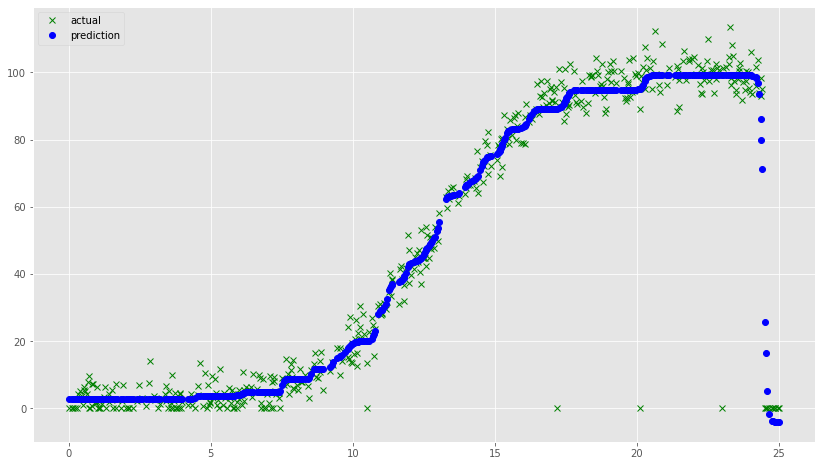

In [6]:
# Now let's see.
plt.plot(data['speed'], data['power'], 'gx', label='actual')
plt.plot(data['speed'], model.predict(data['speed']), 'bo',label='prediction')
plt.legend();